# LMS PARA PREDICCIÓN - (UNA SOLA NEURONA) - SIN FUNC ACTIVACIÓN

## Edison David González Blandón - Juan Esteban Velásquez

### Obteniendo y normalizando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos_xls = pd.ExcelFile('DatosPunto1.xlsx') #Obteniendo el archivo
sheet_names = datos_xls.sheet_names #Obteniendo un arreglo con los nombres de las hojas del libro de excel
hoja = datos_xls.parse(sheet_names[0]) #Nuestra hoja de trabajo es la primera pestaña
columnas = [] #Una lista vacia de columnas
columnas_norm = [] #Una lista vacia de las columnas normalizadas
for i in range(0,8):
    columnas.append(hoja.iloc[:,i]) #Se agrega a la lista el elemento = a un arreglo o columna 
    columnas_norm.append((columnas[i]-np.min(columnas[i],axis=0))/(np.max(columnas[i],axis=0)-np.min(columnas[i],axis=0))) ## Estandarizando con Min-Max (  En latex lo siguiente:   $$X_{norm} = \frac{X-\min(X)}{\max(X)-\min(X)}$$  )

etiquetas = hoja.iloc[:,8] #Obteniendo la columna de valores Y1

### Dividr la matriz de datos de entrada para entrenamiento

In [2]:
Numero_Filas_Datos = len(columnas_norm[0]) #Obteniendo la cantidad de elementos en una lista, es decir la cantidad de filas
#print(Numero_Filas_Datos)
#Se realiza la división para hacer bootstraping
N_datos_entrenamiento = int(Numero_Filas_Datos*0.7) #70% para entrenamiento 
N_datos_validacion = int(Numero_Filas_Datos*0.15) #15% para validación
N_datos_prueba = Numero_Filas_Datos - N_datos_validacion - N_datos_entrenamiento #15% para prueba
#print(N_datos_entrenamiento)
#print(N_datos_validacion)
#print(N_datos_prueba)

matrix_normalizado = np.array(columnas_norm).T #Ya quedo un vector de 768 filas y 8 columnas
matrix_salida = np.array(etiquetas) #Quedo como un vector fila
#print(matrix_salida, type(matrix_salida))

matrix_entrenamiento = matrix_normalizado[0:N_datos_entrenamiento,:] #Matriz[537,8]
#print(matrix_entrenamiento.shape)
matrix_salida_entrenamiento = matrix_salida[0:N_datos_entrenamiento] #Matriz[537,1]
#print(matrix_salida_entrenamiento.shape)
matrix_validacion = matrix_normalizado[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion),:] #Matriz[115,8]
#print(matrix_validacion.shape)
matrix_salida_validacion = matrix_salida[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion)] #Matriz[115,1]
#print(matrix_salida_validacion.shape)
matrix_prueba = matrix_normalizado[N_datos_validacion:(N_datos_validacion+N_datos_prueba),:] #Matriz[116,8]
#print(matrix_prueba.shape)
matrix_salida_prueba = matrix_salida[N_datos_validacion:(N_datos_validacion+N_datos_prueba)] #Matriz[116,1]
#print(matrix_salida_prueba.shape)

### Implementando LMS (Least Mean Squares - Mínimos Cuadrados Medios) y Función de Validación

In [3]:
#Generando la semilla de pesos
def LeastMeanSquares_Train(matrix_entrenamiento,max_iteraciones = 1000,alpha=0.1,error_min = 9): 
    flag_culm = True
    contador = 0
    vector_pesos = np.random.rand(matrix_entrenamiento.shape[1] + 1,) #Obteniendo un vector de numeros aleatorio entre 0 y 1, segun el tamaño de columnas en la matrix de entrenamiento (Shape devuelve las dimensiones de un arreglo) 
    result_valid = False
    #print(matrix_entrenamiento.shape[1])
    #print(type(matrix_pesos))
    #print(matrix_pesos)

    #salida_entrenamiento = np.dot(matrix_pesos,np.insert(matrix_entrenamiento[0,:],0,1)) #Producto punto entre dos matrices, entrenamiento y 
    #print(salida_entrenamiento, type(salida_entrenamiento))
    #print(len(matrix_entrenamiento))
    #print(N_datos_entrenamiento)
    #print(matrix_entrenamiento[536])

    while (flag_culm):
        contador = contador + 1;
        dato_escogido = np.random.randint(0,N_datos_entrenamiento)
        g  = np.dot(vector_pesos,np.insert(matrix_entrenamiento[dato_escogido,:],0,1).T) # y = w.xT donde Y = matriz de salida, wT = Matriz de pesos
        e  = g - matrix_salida_entrenamiento[dato_escogido] # error es la resta entre el valor predicho y la etiqueta
        derivada_error = e*np.insert(matrix_entrenamiento[dato_escogido,:],0,1) #Calcula de la derivada del error
        vector_pesos = vector_pesos - alpha*derivada_error #Actualizando los pesos
        result_valid = func_valid(vector_pesos,matrix_validacion, matrix_salida_validacion, error_min)
        if(contador==max_iteraciones):
            flag_culm = False #Dejar de iterar
            print("culminacion por iteraciones")
        if(result_valid):
            print("culminacion por validacion")
            flag_culm = False #Dejar de iterar
    return vector_pesos

def func_valid(vector_pesos,matrix_validacion, matrix_salida_validacion, error_min):
    matrix_validacion_bias = np.insert(matrix_validacion,0,1,axis=1)
    prediccion = np.dot(matrix_validacion_bias,vector_pesos)
    error = prediccion - matrix_salida_validacion
    error_total=0
    for i in range(0,len(error)):
        error_cuadrado = error[i]**2
        error_total = error_total+error_cuadrado
        #print("el error cuadrado es: ", error_cuadrado)
    error_total=error_total/len(error)
    print("el error total es: ", error_total)
    if (error_total <= error_min):
        flag_valid=True
    else: 
        flag_valid=False
    return flag_valid


### Obteniendo un Alpha Óptimo

In [5]:
alpha_variar = np.arange(10**-2,10**-1,10**-3)
print (alpha_variar)
for i in range(0,len(alpha_variar)):
    #0.064
    vector_pesos_final = LeastMeanSquares_Train(matrix_entrenamiento,max_iteraciones = 1000,alpha=0.064,error_min = 0.01)
    print ("El alpha es: ", alpha_variar[i])

[0.01  0.011 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021
 0.022 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033
 0.034 0.035 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045
 0.046 0.047 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057
 0.058 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069
 0.07  0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081
 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093
 0.094 0.095 0.096 0.097 0.098 0.099 0.1  ]
el error Total es:  617.7993813313138
el error Total es:  530.4838385692985
el error Total es:  504.58625640847595
el error Total es:  352.0627861538904
el error Total es:  200.7763440971198
el error Total es:  207.4741501124835
el error Total es:  219.82740014056816
el error Total es:  220.86868125233724
el error Total es:  226.98982359922343
el error Total es:  238.6357814162537
el error Total es:  249.8462278387537
el error Total es:  260

el error Total es:  12.153175770304195
el error Total es:  9.731765955186175
el error Total es:  9.68490850684464
el error Total es:  10.79995105282896
el error Total es:  14.398248351933834
el error Total es:  14.95780077047165
el error Total es:  14.819052035411554
el error Total es:  14.171070198501626
el error Total es:  16.048870204824556
el error Total es:  13.26143356698186
el error Total es:  12.39769722372003
el error Total es:  11.5498582761744
el error Total es:  12.270848958029154
el error Total es:  16.26216212684572
el error Total es:  18.7727555259139
el error Total es:  14.889397163021064
el error Total es:  14.036981704991401
el error Total es:  12.321847297811898
el error Total es:  10.591555442886492
el error Total es:  9.862498783053784
el error Total es:  9.962747335852049
el error Total es:  9.592786962650802
el error Total es:  9.662069225649683
el error Total es:  10.115427096177678
el error Total es:  10.149651628547376
el error Total es:  10.202106031720481
el

el error Total es:  31.817851363577518
el error Total es:  32.33747740854256
el error Total es:  31.399302921904845
el error Total es:  33.16216969781459
el error Total es:  35.40202311530687
el error Total es:  34.63085008358311
el error Total es:  32.81394561512928
el error Total es:  35.9741914651093
el error Total es:  28.726620905810073
el error Total es:  29.822566898934276
el error Total es:  35.07458301433848
el error Total es:  41.75258469043715
el error Total es:  47.83054695757054
el error Total es:  46.16069014375142
el error Total es:  46.19545886718249
el error Total es:  46.82437820547659
el error Total es:  48.36451710002941
el error Total es:  47.0041016646411
el error Total es:  49.02830333530573
el error Total es:  43.46181549876693
el error Total es:  42.087202032705704
el error Total es:  39.208894480565704
el error Total es:  42.34499276698478
el error Total es:  39.033684052756136
el error Total es:  34.46076525822069
el error Total es:  35.511631858899676
el err

el error Total es:  12.828266208560757
el error Total es:  12.572240102905823
el error Total es:  13.874948184439418
el error Total es:  11.93558557800025
el error Total es:  12.517281536994895
el error Total es:  9.840169668613742
el error Total es:  9.884828839784415
el error Total es:  9.769384213945282
el error Total es:  9.872212043147131
el error Total es:  10.104836449565092
el error Total es:  9.91429267261573
el error Total es:  9.929939068796298
el error Total es:  9.950844727397582
el error Total es:  9.953215289674016
el error Total es:  9.987124163944292
el error Total es:  9.984574702337113
el error Total es:  10.00616749442214
el error Total es:  12.627305466722582
el error Total es:  10.644144747757766
el error Total es:  9.974040677687713
el error Total es:  10.084761037942329
el error Total es:  9.973582040136685
el error Total es:  10.762497754249697
el error Total es:  10.298454031683878
el error Total es:  11.73828847262977
el error Total es:  11.425867144503627
el

el error Total es:  11.866290586998705
el error Total es:  11.651622448238198
el error Total es:  12.19061486382968
el error Total es:  12.388395877195267
el error Total es:  11.312621382790647
el error Total es:  10.686052740553185
el error Total es:  10.720315882508615
el error Total es:  10.596608580242744
el error Total es:  11.81092389444169
el error Total es:  11.307064126619556
el error Total es:  11.13122757227903
el error Total es:  11.026847368135657
el error Total es:  10.441319029825417
el error Total es:  10.239985541128167
el error Total es:  10.541643782341561
el error Total es:  10.361838706677643
el error Total es:  10.51952897344399
el error Total es:  10.542754468435016
el error Total es:  10.632349978444813
el error Total es:  11.254227604709929
el error Total es:  11.558872225868733
el error Total es:  12.708787326399676
el error Total es:  13.199982781068446
el error Total es:  13.256526338740224
el error Total es:  13.459349165548709
el error Total es:  14.705886

el error Total es:  12.63328321546626
el error Total es:  12.37972780789048
el error Total es:  12.992885875212462
el error Total es:  13.787843820964035
el error Total es:  13.51156557215868
el error Total es:  13.075024878569913
el error Total es:  12.694176052352333
el error Total es:  12.121233807031128
el error Total es:  16.209594901529645
el error Total es:  24.374416161852324
el error Total es:  25.15863162960026
el error Total es:  12.350715598682717
el error Total es:  11.071654900045516
el error Total es:  11.580680468627508
el error Total es:  14.064504627547542
el error Total es:  14.256467416346101
el error Total es:  14.299145281272038
el error Total es:  13.463089522439857
el error Total es:  9.943322810442679
el error Total es:  9.960845222470507
el error Total es:  9.959053369211237
el error Total es:  9.971854118738102
el error Total es:  9.968735982265835
el error Total es:  9.966133048751836
el error Total es:  9.95932950066367
el error Total es:  10.17775861519017

el error Total es:  10.46412801013754
el error Total es:  10.561228939218292
el error Total es:  10.508330424665527
el error Total es:  10.881188424137529
el error Total es:  11.040286889577356
el error Total es:  10.476246462999995
el error Total es:  10.195650757814558
el error Total es:  9.794734953712949
el error Total es:  11.804338141387978
el error Total es:  9.921132641177465
el error Total es:  9.95704808179306
el error Total es:  9.882347613058446
el error Total es:  10.194990330043622
el error Total es:  11.072266980027095
el error Total es:  11.352027538644482
el error Total es:  10.157062593838758
el error Total es:  9.85339379584929
el error Total es:  9.752159489225692
el error Total es:  9.7387990766822
el error Total es:  9.895919341198098
el error Total es:  10.80569334545122
el error Total es:  11.384540914781196
el error Total es:  10.754750632518657
el error Total es:  10.807900820579691
el error Total es:  10.879753945681209
el error Total es:  10.011052736213475


el error Total es:  52.37504575731797
el error Total es:  49.038897422310995
el error Total es:  41.069060617974614
el error Total es:  44.19484075738287
el error Total es:  44.24030918615408
el error Total es:  45.85240415435651
el error Total es:  21.92095381406514
el error Total es:  25.156059883825538
el error Total es:  19.011464502847943
el error Total es:  13.418736877202647
el error Total es:  14.358940203522497
el error Total es:  14.368027173342865
el error Total es:  15.802849701072635
el error Total es:  16.93871953888352
el error Total es:  17.78289345149896
el error Total es:  13.194207945826395
el error Total es:  12.718863480816522
el error Total es:  13.123934140580962
el error Total es:  13.193451347997133
el error Total es:  13.259279702307872
el error Total es:  14.529757156375338
el error Total es:  12.48373341381386
el error Total es:  12.791251104744218
el error Total es:  14.409446185740507
el error Total es:  18.709657911105154
el error Total es:  20.1311817508

el error Total es:  13.776593297619401
el error Total es:  13.6283298631396
el error Total es:  13.504988347282856
el error Total es:  13.838182170496273
el error Total es:  15.856274391077275
el error Total es:  14.778000134843674
el error Total es:  13.12357374016708
el error Total es:  12.479138887533725
el error Total es:  12.554734264201432
el error Total es:  12.156498458008464
el error Total es:  12.130226845761609
el error Total es:  12.037072274586034
el error Total es:  11.89363210534283
el error Total es:  11.817310578399292
el error Total es:  14.011258338892887
el error Total es:  11.886155614015212
el error Total es:  12.053105918148644
el error Total es:  11.464329950988137
el error Total es:  11.155227851067297
el error Total es:  11.157913209272783
el error Total es:  11.153627358431969
el error Total es:  13.472137822773274
el error Total es:  13.078212802673994
el error Total es:  13.193923830808039
el error Total es:  14.162281379095143
el error Total es:  13.004976

el error Total es:  11.832139389892848
el error Total es:  9.942701613568826
el error Total es:  9.926268991222337
el error Total es:  9.863038212136749
el error Total es:  12.559036582315004
el error Total es:  9.442017127629839
el error Total es:  9.924968005783384
el error Total es:  11.370941341161371
el error Total es:  10.029868839866142
el error Total es:  11.723997011073743
el error Total es:  11.828472543748722
el error Total es:  11.775435907600006
el error Total es:  10.897635905342202
el error Total es:  11.010683727527532
el error Total es:  10.989234638915226
el error Total es:  10.14036156238841
el error Total es:  10.049241011090983
el error Total es:  12.78976938013217
el error Total es:  13.380061075150023
el error Total es:  10.812855300515542
el error Total es:  11.60424884984015
el error Total es:  10.677715593780237
el error Total es:  9.37054483167684
el error Total es:  10.155324422735438
el error Total es:  9.56908121744798
el error Total es:  9.987800690880732

el error Total es:  31.649496421582516
el error Total es:  38.32104787872026
el error Total es:  36.69681569415139
el error Total es:  38.826217168743796
el error Total es:  26.363633691265523
el error Total es:  22.80328201017368
el error Total es:  23.267895422191565
el error Total es:  24.5199659880582
el error Total es:  20.798154758675263
el error Total es:  21.190836563472
el error Total es:  20.24870995180384
el error Total es:  23.669044209363467
el error Total es:  16.2439508347769
el error Total es:  16.937904808002774
el error Total es:  15.773537662391252
el error Total es:  15.541461587949128
el error Total es:  16.212576433971794
el error Total es:  16.026223737803743
el error Total es:  17.44675719525681
el error Total es:  18.386530506347984
el error Total es:  19.865595274057537
el error Total es:  18.96016472681118
el error Total es:  16.776187374147508
el error Total es:  17.439718896303926
el error Total es:  18.571487945683526
el error Total es:  17.63746740611636


el error Total es:  9.414680878427342
el error Total es:  9.295149583132263
el error Total es:  9.803464087002027
el error Total es:  9.83184901885062
el error Total es:  9.100842663916845
el error Total es:  9.163436152444554
el error Total es:  9.23180388467129
el error Total es:  9.417047180000289
el error Total es:  9.25928592544709
el error Total es:  8.975280706367023
el error Total es:  9.396842118240503
el error Total es:  9.058912970226272
el error Total es:  8.974520701464588
el error Total es:  9.02592361392746
el error Total es:  10.321400281300352
el error Total es:  10.178434652159199
el error Total es:  10.106335280747059
el error Total es:  9.427062317635714
el error Total es:  11.835783555736567
el error Total es:  11.11825293421699
el error Total es:  10.70366357170918
el error Total es:  9.583279931195188
el error Total es:  9.194118265268292
el error Total es:  9.137607998964523
el error Total es:  9.325688567884738
el error Total es:  9.105637501980098
el error Tot

el error Total es:  12.05068681792021
el error Total es:  12.100228580746144
el error Total es:  11.28090318064551
el error Total es:  12.257604898389193
el error Total es:  11.854479485828806
el error Total es:  11.028985307538747
el error Total es:  11.034309581576494
el error Total es:  12.036092879855246
el error Total es:  13.008504537603578
el error Total es:  11.202735765413516
el error Total es:  11.342999058590944
el error Total es:  14.589373508035415
el error Total es:  13.263090485004243
el error Total es:  11.344652871573984
el error Total es:  11.769155058196736
el error Total es:  11.452795712153645
el error Total es:  15.411888279614068
el error Total es:  13.713607045358646
el error Total es:  14.472271765205825
el error Total es:  15.743111151760578
el error Total es:  15.126746329369997
el error Total es:  12.28771096969456
el error Total es:  12.027429752725485
el error Total es:  12.117634831813467
el error Total es:  11.74310437802301
el error Total es:  12.058173

el error Total es:  12.004273929124864
el error Total es:  11.803439211738125
el error Total es:  11.32730393143825
el error Total es:  11.993280192956151
el error Total es:  11.62129975716805
el error Total es:  11.417431180762835
el error Total es:  11.512096987540033
el error Total es:  11.088475056190324
el error Total es:  14.231721354628014
el error Total es:  16.418327566376682
el error Total es:  17.410588209248
el error Total es:  15.581312109751952
el error Total es:  13.165919855271754
el error Total es:  11.914339533822655
el error Total es:  11.74990388742519
el error Total es:  12.463312304852211
el error Total es:  15.253860591482212
el error Total es:  15.948438436816748
el error Total es:  14.312462938450377
el error Total es:  14.140461354281744
el error Total es:  14.512924109219938
el error Total es:  14.648694978000666
el error Total es:  17.232130647225087
el error Total es:  15.484085718345481
el error Total es:  16.82693428650173
el error Total es:  17.535499637

el error Total es:  13.508617545026675
el error Total es:  12.575899974817133
el error Total es:  12.484682483384882
el error Total es:  9.929587190041541
el error Total es:  10.46151296139528
el error Total es:  10.477876311392674
el error Total es:  10.502583680704772
el error Total es:  9.41299581832399
el error Total es:  9.167224108374068
el error Total es:  12.504088167740822
el error Total es:  13.144326250234824
el error Total es:  13.392973148311805
el error Total es:  11.232142428585302
el error Total es:  10.041684210686297
el error Total es:  9.409673179315245
el error Total es:  9.952016004334874
el error Total es:  9.790999814809021
el error Total es:  9.280491681558884
el error Total es:  10.73708075460674
el error Total es:  9.63321314935159
el error Total es:  11.701018718020695
el error Total es:  9.926309369741931
el error Total es:  10.134371918082778
el error Total es:  9.887097601197445
el error Total es:  10.783966445022651
el error Total es:  9.949102152005882
e

el error Total es:  15.085642947111388
el error Total es:  15.054425270959081
el error Total es:  14.969927645517517
el error Total es:  15.492440792988248
el error Total es:  14.420673420153259
el error Total es:  16.55282723783553
el error Total es:  20.580057565177103
el error Total es:  18.515340290968947
el error Total es:  15.076940679731631
el error Total es:  15.052594107885062
el error Total es:  18.20376539704648
el error Total es:  18.324542036605386
el error Total es:  16.288604377800517
el error Total es:  15.659969510635761
el error Total es:  15.948096833791778
el error Total es:  16.440383683505356
el error Total es:  15.13664200328822
el error Total es:  15.355300316318285
el error Total es:  15.321455580575723
el error Total es:  15.273630595145613
el error Total es:  14.566509515599991
el error Total es:  14.61261585510317
el error Total es:  14.447412812876307
el error Total es:  14.510017369084023
el error Total es:  14.52974434100575
el error Total es:  14.6192872

el error Total es:  10.114569304670038
el error Total es:  10.075646936678652
el error Total es:  10.411987151012207
el error Total es:  10.360069959248307
el error Total es:  10.54563436917189
el error Total es:  9.787899362881388
el error Total es:  9.809292332836757
el error Total es:  9.779822368544504
el error Total es:  10.593956974750851
el error Total es:  10.360191454619326
el error Total es:  10.430203047617463
el error Total es:  10.17504018456505
el error Total es:  10.127878424594908
el error Total es:  10.663849647427387
el error Total es:  10.488866299651903
el error Total es:  10.173731882583239
el error Total es:  9.76173467007818
el error Total es:  9.869890324920778
el error Total es:  9.956579219794234
el error Total es:  9.777564214927207
el error Total es:  9.738639407364232
el error Total es:  9.581316148121722
el error Total es:  9.897712246065055
el error Total es:  9.83335168026162
el error Total es:  10.498177397007247
el error Total es:  10.404468456497119
e

el error Total es:  41.887439735836445
el error Total es:  42.25208360798086
el error Total es:  48.56652091981926
el error Total es:  46.416065373897325
el error Total es:  51.57144148260802
el error Total es:  31.572361498426233
el error Total es:  34.991950759447455
el error Total es:  35.74583296129706
el error Total es:  25.785596404448217
el error Total es:  28.633939204145573
el error Total es:  29.012683798067197
el error Total es:  32.71714873035552
el error Total es:  36.66661062840191
el error Total es:  29.09657165813116
el error Total es:  28.68821206058622
el error Total es:  38.9167302899542
el error Total es:  38.61473542652296
el error Total es:  44.36648098165759
el error Total es:  49.24068530662712
el error Total es:  39.40648430715228
el error Total es:  41.93323546945836
el error Total es:  47.580900049582695
el error Total es:  37.362925390284424
el error Total es:  39.46645107489895
el error Total es:  23.31784748083442
el error Total es:  27.314027495550658
el 

el error Total es:  10.997102326012266
el error Total es:  10.977393422757032
el error Total es:  11.129741227833096
el error Total es:  12.638037298566582
el error Total es:  14.21465336707286
el error Total es:  12.865478372652735
el error Total es:  12.5682610917111
el error Total es:  12.363251185676747
el error Total es:  11.918273739449043
el error Total es:  11.411679261492596
el error Total es:  11.239721933527013
el error Total es:  12.265440066030486
el error Total es:  12.121556861280471
el error Total es:  11.879236385160958
el error Total es:  12.504248990438638
el error Total es:  12.933745222309648
el error Total es:  15.786806145706544
el error Total es:  13.51383045435121
el error Total es:  12.703170003921644
el error Total es:  13.961785629469398
el error Total es:  15.277244061662506
el error Total es:  11.418352574354769
el error Total es:  11.17512747481281
el error Total es:  12.172449614066366
el error Total es:  12.863014764100798
el error Total es:  12.0616979

el error Total es:  11.884201847706906
el error Total es:  11.8890057560924
el error Total es:  11.899038794409108
el error Total es:  13.566605582487735
el error Total es:  12.613209952281522
el error Total es:  10.688807255879242
el error Total es:  11.09720633231267
el error Total es:  11.082017351373965
el error Total es:  10.974958231230815
el error Total es:  12.68696585080644
el error Total es:  11.943518545256262
el error Total es:  11.343180677770954
el error Total es:  11.368839653962302
el error Total es:  10.897215599632661
el error Total es:  10.751950747863479
el error Total es:  10.87034353590916
el error Total es:  11.313584400130273
el error Total es:  11.724172678903335
el error Total es:  11.739945801214803
el error Total es:  14.736532979832793
el error Total es:  13.557814483634079
el error Total es:  12.44716172946097
el error Total es:  12.399353815608967
el error Total es:  12.990314791757395
el error Total es:  12.223193666912973
el error Total es:  12.67373105

el error Total es:  11.529911775695602
el error Total es:  11.205177843183007
el error Total es:  11.29197259119647
el error Total es:  12.334833596428986
el error Total es:  11.360094621366104
el error Total es:  10.959679203218977
el error Total es:  11.076442035051915
el error Total es:  11.92402237156258
el error Total es:  11.738689287976019
el error Total es:  12.70204766591138
el error Total es:  14.672429638308365
el error Total es:  12.992660074007567
el error Total es:  12.337320238464395
el error Total es:  13.40186817143918
el error Total es:  14.341772903839544
el error Total es:  13.559983558189494
el error Total es:  16.40144564186388
el error Total es:  15.421453386408745
el error Total es:  14.290594783672482
el error Total es:  13.090856847130855
el error Total es:  12.09296355619245
el error Total es:  12.175951620904863
el error Total es:  10.25419168350466
el error Total es:  10.16658458961693
el error Total es:  10.103549693523123
el error Total es:  10.1002789063

el error Total es:  12.489666684501785
el error Total es:  18.561129121680025
el error Total es:  18.174951692033808
el error Total es:  16.993578959665374
el error Total es:  12.26862232020889
el error Total es:  11.082417472801902
el error Total es:  10.427260600584285
el error Total es:  10.276742264918276
el error Total es:  9.496901080828316
el error Total es:  13.996483482633
el error Total es:  13.244879195674288
el error Total es:  10.98118402512448
el error Total es:  10.449943982448042
el error Total es:  9.633439720629124
el error Total es:  10.068997973109726
el error Total es:  9.576282929126476
el error Total es:  9.707333164954955
el error Total es:  11.776776487754036
el error Total es:  10.705909103779193
el error Total es:  10.818082212689845
el error Total es:  9.30328538575953
el error Total es:  9.48749922485577
el error Total es:  9.527418236764978
el error Total es:  13.885208447882007
el error Total es:  12.274312308702626
el error Total es:  12.874711542811555


el error Total es:  16.651293049364472
el error Total es:  14.260229331120946
el error Total es:  13.507555885789175
el error Total es:  15.514721253569931
el error Total es:  13.299983616369518
el error Total es:  14.383433681791391
el error Total es:  15.562102998253131
el error Total es:  15.460321528376111
el error Total es:  15.729975937960718
el error Total es:  15.858836475966797
el error Total es:  13.003500991756535
el error Total es:  12.9763920330274
el error Total es:  13.630487382873413
el error Total es:  14.221910960032009
el error Total es:  14.178054115161823
el error Total es:  15.295920021966978
el error Total es:  15.89448527604776
el error Total es:  13.507187241110419
el error Total es:  12.18107476384968
el error Total es:  15.375370324465027
el error Total es:  12.412990871011358
el error Total es:  13.879994463405648
el error Total es:  13.259889469189492
el error Total es:  13.657788377251162
el error Total es:  14.373318485819768
el error Total es:  12.710184

el error Total es:  10.104375779146558
el error Total es:  10.278447291376393
el error Total es:  11.001060415128029
el error Total es:  10.57589520391588
el error Total es:  10.310331110029532
el error Total es:  10.379174242695168
el error Total es:  10.133561116848911
el error Total es:  10.498172807279364
el error Total es:  11.201988076244264
el error Total es:  10.918559699290267
el error Total es:  11.582069848212651
el error Total es:  11.236507422898704
el error Total es:  12.352904901111788
el error Total es:  12.077476605442577
el error Total es:  11.58465627490887
el error Total es:  11.492118116898034
el error Total es:  13.305906150544164
el error Total es:  12.724326151916573
el error Total es:  14.162019639180773
el error Total es:  13.441943126487809
el error Total es:  14.223262490241176
el error Total es:  11.526458012092299
el error Total es:  11.458641980964735
el error Total es:  11.848730119319423
el error Total es:  10.652987749951969
el error Total es:  11.2637

el error Total es:  10.013731004352902
el error Total es:  9.044974346685684
el error Total es:  9.036770154463563
el error Total es:  9.392580341262455
el error Total es:  9.335722626782742
el error Total es:  9.331714818791216
el error Total es:  9.439462952984448
el error Total es:  9.433387857553061
el error Total es:  11.82933274547299
el error Total es:  12.00567735399375
el error Total es:  10.622572974272993
el error Total es:  14.855825414397113
el error Total es:  10.52914476826873
el error Total es:  9.688294459232905
el error Total es:  9.616886582853011
el error Total es:  9.748614310665413
el error Total es:  12.80567942372494
el error Total es:  10.608224691196948
el error Total es:  11.891600907109177
el error Total es:  12.560994259053219
el error Total es:  13.98348398768139
el error Total es:  12.46385926384251
el error Total es:  13.28523580555462
el error Total es:  9.816380213757949
el error Total es:  9.565997900895843
el error Total es:  9.57267369604559
el erro

el error Total es:  15.24577176823953
el error Total es:  12.901913406119485
el error Total es:  10.85594636279757
el error Total es:  14.488782685012678
el error Total es:  12.118852727843015
el error Total es:  14.330925297715638
el error Total es:  15.234501740325571
el error Total es:  15.076234687511363
el error Total es:  19.61608690539345
el error Total es:  19.78387066552115
el error Total es:  15.224370596218227
el error Total es:  13.93520793113607
el error Total es:  11.810097676497469
el error Total es:  13.569636662129144
el error Total es:  15.332781140519362
el error Total es:  16.917647833128708
el error Total es:  18.674580170103543
el error Total es:  11.530886057484361
el error Total es:  11.689956648619443
el error Total es:  11.663411379160962
el error Total es:  11.446767076325054
el error Total es:  15.531492770778883
el error Total es:  20.12290905282007
el error Total es:  21.259443285171464
el error Total es:  20.362870119811674
el error Total es:  18.72481922

el error Total es:  10.1949655194198
el error Total es:  12.316676851497462
el error Total es:  12.060111857715775
el error Total es:  12.773013858470918
el error Total es:  11.532388768623974
el error Total es:  10.981133965547347
el error Total es:  10.30778145570114
el error Total es:  10.003464212479974
el error Total es:  9.98334859654012
el error Total es:  10.300184599817863
el error Total es:  9.714847474553489
el error Total es:  10.00649964344884
el error Total es:  9.773096405042043
el error Total es:  9.78414581917398
el error Total es:  9.98746712420755
el error Total es:  10.269407122245642
el error Total es:  10.132064240584
el error Total es:  9.709415301423162
el error Total es:  10.145171719132334
el error Total es:  10.144828068485593
el error Total es:  10.899219659487132
el error Total es:  10.3036928736161
el error Total es:  10.021887126649832
el error Total es:  12.83023362678675
el error Total es:  11.776730410292286
el error Total es:  17.609974105143724
el er

el error Total es:  19.348432631986967
el error Total es:  20.049393915010192
el error Total es:  22.183765930400632
el error Total es:  23.623349499634305
el error Total es:  21.821161445617925
el error Total es:  25.9935464225298
el error Total es:  32.22939024865901
el error Total es:  31.88128504427593
el error Total es:  31.068266774054717
el error Total es:  29.33762368870052
el error Total es:  45.48625187404772
el error Total es:  42.82347140870233
el error Total es:  31.755849430801053
el error Total es:  32.66950770547595
el error Total es:  31.616543624309987
el error Total es:  32.35451179259926
el error Total es:  30.96323878953314
el error Total es:  30.409405870671357
el error Total es:  16.972006552556728
el error Total es:  17.972693639479587
el error Total es:  17.283391583209703
el error Total es:  16.936783523148247
el error Total es:  17.527654501085244
el error Total es:  17.44433315677353
el error Total es:  14.14269187271526
el error Total es:  12.42074963256189

el error Total es:  11.097661689177412
el error Total es:  11.146578179169019
el error Total es:  10.625596733559485
el error Total es:  10.81755029702605
el error Total es:  11.368687991478769
el error Total es:  11.190618813164216
el error Total es:  10.965224012053065
el error Total es:  10.643610833156124
el error Total es:  11.71362278979037
el error Total es:  10.74177428837235
el error Total es:  10.26263360488951
el error Total es:  10.217073152036752
el error Total es:  10.888651061527998
el error Total es:  10.561543758335889
el error Total es:  9.661185849970321
el error Total es:  9.577388958342395
el error Total es:  9.904795205797676
el error Total es:  9.659858718248875
el error Total es:  9.826010477980358
el error Total es:  10.173036448117253
el error Total es:  9.61922208773803
el error Total es:  10.94018361283969
el error Total es:  10.650171006402944
el error Total es:  9.61030023674793
el error Total es:  9.611111627677172
el error Total es:  9.624728525118133
el

el error Total es:  9.944915877158008
el error Total es:  14.956020845818188
el error Total es:  15.639214385214169
el error Total es:  12.740500720909932
el error Total es:  12.538416665822828
el error Total es:  11.843319867438671
el error Total es:  15.581213313405812
el error Total es:  14.10524607347394
el error Total es:  10.632692908029005
el error Total es:  8.764322042743222
el error Total es:  8.644483051819167
el error Total es:  8.90233898834713
el error Total es:  8.757633909491217
el error Total es:  9.526626818135949
culminacion por iteraciones
El alpha es:  0.02099999999999999
el error Total es:  520.7022257832728
el error Total es:  355.5730946907199
el error Total es:  184.48895770826476
el error Total es:  117.53219968800374
el error Total es:  120.93681365263603
el error Total es:  123.93344819040253
el error Total es:  139.41772531074966
el error Total es:  102.88032315953802
el error Total es:  118.78937741281624
el error Total es:  120.51613438877412
el error Tot

el error Total es:  13.094100253538816
el error Total es:  12.414292576651034
el error Total es:  15.315038448271983
el error Total es:  19.850701164280615
el error Total es:  17.029274582658143
el error Total es:  20.476673404629057
el error Total es:  19.950860764950548
el error Total es:  18.36626994254367
el error Total es:  14.128452927893491
el error Total es:  16.689718219242245
el error Total es:  19.815955485816254
el error Total es:  16.602784249203108
el error Total es:  13.761447935949164
el error Total es:  12.739642115836027
el error Total es:  13.187947195593198
el error Total es:  13.205112024160039
el error Total es:  14.584197733530763
el error Total es:  12.427632943677942
el error Total es:  11.638605408976424
el error Total es:  12.115197562919104
el error Total es:  11.378947986177359
el error Total es:  11.707958253574644
el error Total es:  11.849649249597757
el error Total es:  11.19968397557005
el error Total es:  12.073824681785341
el error Total es:  11.6669

el error Total es:  10.515660694720493
el error Total es:  10.54065272398311
el error Total es:  10.583151452569508
el error Total es:  10.928321716756571
el error Total es:  11.206912478277548
el error Total es:  11.027609713973634
el error Total es:  10.716909817935969
el error Total es:  10.834447307266235
el error Total es:  11.299640259402219
el error Total es:  11.48224770671501
el error Total es:  10.847555741059972
el error Total es:  10.332404222510938
el error Total es:  10.40211734979174
el error Total es:  10.395064825518682
el error Total es:  10.44919796572587
el error Total es:  10.440908316454628
el error Total es:  10.475771413077641
el error Total es:  11.897225206312813
el error Total es:  9.824215466411507
el error Total es:  9.928453947640545
el error Total es:  10.20699471847016
el error Total es:  10.843317962608001
el error Total es:  10.093332949170954
el error Total es:  10.115289708502427
el error Total es:  10.319274697180651
el error Total es:  12.177520308

el error Total es:  13.529885704610649
el error Total es:  13.576326847288707
el error Total es:  13.926773938049266
el error Total es:  15.522842604435418
el error Total es:  11.071315220257688
el error Total es:  11.048974262044137
el error Total es:  14.2580529132413
el error Total es:  14.484194681055703
el error Total es:  14.171199859382574
el error Total es:  12.865624360823194
el error Total es:  12.722247903136084
el error Total es:  14.868441383859356
el error Total es:  15.271826771651776
el error Total es:  15.577454236124765
el error Total es:  11.67483246751285
el error Total es:  11.937105586850988
el error Total es:  15.14075778242265
el error Total es:  13.057032343792972
el error Total es:  13.168620647538921
el error Total es:  13.15122279122801
el error Total es:  17.594222517669458
el error Total es:  16.21048148558562
el error Total es:  20.488787590277852
el error Total es:  17.776416894774012
el error Total es:  16.712813773646317
el error Total es:  16.11012806

el error Total es:  9.329703404370122
el error Total es:  9.159343315270537
el error Total es:  9.170436180080532
el error Total es:  9.121386030011914
el error Total es:  9.186763223389974
el error Total es:  9.52829633537918
el error Total es:  9.846141648562769
el error Total es:  9.534796298749393
el error Total es:  9.642625991504032
el error Total es:  9.312718970526138
el error Total es:  11.904366725965629
el error Total es:  12.12422976122291
el error Total es:  10.611852088545362
el error Total es:  9.2738000281609
el error Total es:  8.94068228819468
el error Total es:  8.899760706591728
el error Total es:  8.912750654954905
el error Total es:  10.178092394936604
el error Total es:  10.296776533187918
el error Total es:  8.694662768564278
el error Total es:  8.717872774595138
el error Total es:  8.730582743146089
el error Total es:  9.03276736603061
el error Total es:  11.463856492571331
el error Total es:  9.658410793689267
el error Total es:  9.601452226136423
el error Tot

el error Total es:  31.66193026346001
el error Total es:  31.137726487754993
el error Total es:  33.86627540667096
el error Total es:  31.00413851958105
el error Total es:  29.43084753100719
el error Total es:  26.161944676505193
el error Total es:  26.498063706314706
el error Total es:  25.92895461097213
el error Total es:  26.021363936665775
el error Total es:  27.780093004874487
el error Total es:  27.386914778336216
el error Total es:  30.72397029170879
el error Total es:  30.89933595603858
el error Total es:  34.1835294855531
el error Total es:  33.874858457952286
el error Total es:  30.93921667893163
el error Total es:  28.476254833504868
el error Total es:  27.677856532551104
el error Total es:  27.29730479060472
el error Total es:  27.0263246601404
el error Total es:  29.728231666314315
el error Total es:  30.856564465574678
el error Total es:  31.74225827065139
el error Total es:  29.51664459398219
el error Total es:  29.436716041793236
el error Total es:  34.90390911941045
el

el error Total es:  9.701537028422921
el error Total es:  9.494285004840528
el error Total es:  10.49974541667015
el error Total es:  10.521914513549087
el error Total es:  12.777370284508436
el error Total es:  13.135598575231509
el error Total es:  11.782796800626073
el error Total es:  10.957221648180983
el error Total es:  11.669248311019798
el error Total es:  12.068836215273208
el error Total es:  10.825018297418298
el error Total es:  10.968281478085363
el error Total es:  10.958697106791796
el error Total es:  10.744837914338358
el error Total es:  10.311135752145939
el error Total es:  10.590413336230851
el error Total es:  13.862745716877166
el error Total es:  13.192530135128466
el error Total es:  11.961143244391671
el error Total es:  11.010928871959369
el error Total es:  10.259369816121904
el error Total es:  10.231443640027356
el error Total es:  13.457344569332777
el error Total es:  17.682268463708006
el error Total es:  15.278083990570488
el error Total es:  13.20249

el error Total es:  9.587449747317127
el error Total es:  9.400748914515743
el error Total es:  10.483922890016878
el error Total es:  10.792655663224934
el error Total es:  10.11731305415452
el error Total es:  9.968531758233828
el error Total es:  9.613046491941175
el error Total es:  9.52652213906595
el error Total es:  10.625274690283458
el error Total es:  10.005150340863105
el error Total es:  10.108237938188305
el error Total es:  10.132341701384066
el error Total es:  10.232980081311096
el error Total es:  10.711852328406748
el error Total es:  9.601271432018434
el error Total es:  9.880839944402918
el error Total es:  9.378937368837809
el error Total es:  9.402893608522763
el error Total es:  9.903579007192286
el error Total es:  10.123054475876396
el error Total es:  11.108025032433991
el error Total es:  10.82964886901132
el error Total es:  10.889953540627317
el error Total es:  10.340353837600063
el error Total es:  10.749331906266764
el error Total es:  9.79380574851799
e

el error Total es:  15.645580024951455
el error Total es:  14.49972312336987
el error Total es:  13.185530003410534
el error Total es:  13.897732297302587
el error Total es:  13.872257084198369
el error Total es:  13.315880150180849
el error Total es:  16.763628538763637
el error Total es:  16.719666667351877
el error Total es:  17.113312005692656
el error Total es:  10.772449051208254
el error Total es:  10.451338187536951
el error Total es:  10.47508590101949
el error Total es:  13.33775150093482
el error Total es:  12.774434782452346
el error Total es:  13.415968501311706
el error Total es:  16.404202799944724
el error Total es:  14.345117137900958
el error Total es:  10.582254488833957
el error Total es:  10.648832038319267
el error Total es:  10.636686372103416
el error Total es:  10.715164209847194
el error Total es:  10.574305631807407
el error Total es:  11.10499711724547
el error Total es:  10.834526302398801
el error Total es:  10.896665380203448
el error Total es:  11.119166

el error Total es:  9.671611066570414
el error Total es:  9.656620338803002
el error Total es:  9.956753570563603
el error Total es:  9.815369527139072
el error Total es:  10.011360665146547
el error Total es:  10.204697707040708
el error Total es:  9.922639310602863
el error Total es:  10.694742316234437
el error Total es:  10.339637916635361
el error Total es:  10.248207285965432
el error Total es:  9.928790595482246
el error Total es:  9.981221816790518
el error Total es:  9.987856343578594
el error Total es:  9.861199850792394
el error Total es:  10.317477918676577
el error Total es:  10.247735715717562
el error Total es:  10.354233743745715
el error Total es:  10.357809250087646
el error Total es:  10.314526905620781
el error Total es:  10.063336752787448
el error Total es:  10.402085068086297
el error Total es:  9.996003138887895
el error Total es:  11.831341844296608
el error Total es:  10.860597338390004
el error Total es:  10.69863538159469
el error Total es:  10.5369648618432

el error Total es:  19.331288711254494
el error Total es:  24.81031062243036
el error Total es:  27.933800352495606
el error Total es:  20.340915441700588
el error Total es:  16.052361766957006
el error Total es:  16.269265740226615
el error Total es:  15.083756685741914
el error Total es:  15.020245660643715
el error Total es:  16.19570063315553
el error Total es:  17.286737655930505
el error Total es:  21.087163554899817
el error Total es:  19.357890770008215
el error Total es:  21.118056492952213
el error Total es:  25.009845424082695
el error Total es:  19.90381657310993
el error Total es:  16.12352545641585
el error Total es:  24.961275005430853
el error Total es:  24.965490404230536
el error Total es:  28.004336684874485
el error Total es:  34.08490029532408
el error Total es:  31.005295411071597
el error Total es:  23.783264216971663
el error Total es:  20.598335870679694
el error Total es:  17.91584097285032
el error Total es:  21.382751292442755
el error Total es:  24.72720326

el error Total es:  11.182424153194443
el error Total es:  11.222939464023312
el error Total es:  11.599513168893662
el error Total es:  10.64076016939128
el error Total es:  10.571977112152931
el error Total es:  10.576091294206224
el error Total es:  10.890247209838433
el error Total es:  11.474861104126516
el error Total es:  10.794816295895876
el error Total es:  10.82757349055744
el error Total es:  10.620454723849743
el error Total es:  10.504135524191012
el error Total es:  10.377382806672038
el error Total es:  10.336476854352144
el error Total es:  12.701392814806892
el error Total es:  11.060399688239423
el error Total es:  10.85548252880938
el error Total es:  10.735414629885513
el error Total es:  10.47656435983296
el error Total es:  10.583969444853198
el error Total es:  10.250930986749335
el error Total es:  10.475151190618819
el error Total es:  10.165880100228467
el error Total es:  9.90985691122354
el error Total es:  9.872465648985829
el error Total es:  9.9075768122

el error Total es:  8.732598362738804
el error Total es:  11.366037531583567
el error Total es:  12.148164133012555
el error Total es:  10.075498503446937
el error Total es:  9.46256252455152
el error Total es:  13.228173938646343
el error Total es:  9.737924903453715
el error Total es:  8.767052531541163
el error Total es:  10.449332928202129
el error Total es:  9.686695922412932
el error Total es:  8.616446817046679
el error Total es:  8.792416523180451
el error Total es:  9.07928917935046
el error Total es:  8.665003563325282
el error Total es:  8.882569977453445
el error Total es:  8.961183814093639
el error Total es:  8.865434884783237
el error Total es:  9.18510322711238
el error Total es:  9.452542149321618
el error Total es:  8.827452794808366
el error Total es:  8.852304404626752
el error Total es:  8.872416982762223
el error Total es:  8.747948263993807
el error Total es:  8.778478779831653
el error Total es:  8.786600021991248
el error Total es:  8.870966770081855
el error T

el error Total es:  12.665834903814359
el error Total es:  11.631340689769887
el error Total es:  11.593927746289237
el error Total es:  14.563081668360052
el error Total es:  12.56497514345598
el error Total es:  11.67871400326133
el error Total es:  11.041273910155494
el error Total es:  12.541176516962022
el error Total es:  12.84608916646385
el error Total es:  12.074011616033891
el error Total es:  10.925511937340298
el error Total es:  11.542549337325976
el error Total es:  11.197519158382313
el error Total es:  10.408750605953117
el error Total es:  10.358443329419854
el error Total es:  10.119515562890824
el error Total es:  10.65315513725962
el error Total es:  12.772318180373652
el error Total es:  12.635130088247479
el error Total es:  11.570909791477822
el error Total es:  13.663785593984707
el error Total es:  12.700187686772866
el error Total es:  10.975381054429983
el error Total es:  11.248632180405771
el error Total es:  10.25291320635502
el error Total es:  11.1696156

el error Total es:  11.693950045327377
el error Total es:  10.73146014253998
el error Total es:  10.42944076855594
el error Total es:  9.852689170720797
el error Total es:  9.968982007819138
el error Total es:  9.830926914986764
el error Total es:  13.363363278855992
el error Total es:  10.241563165690145
el error Total es:  9.494676306009097
el error Total es:  9.671895068331038
el error Total es:  9.775144362300022
el error Total es:  9.944633102489037
el error Total es:  10.14136936597685
el error Total es:  10.47209082334275
el error Total es:  9.61276703680073
el error Total es:  9.3466515644008
el error Total es:  9.329842183060936
el error Total es:  9.332674980217437
el error Total es:  9.344916848266923
el error Total es:  9.359696923345737
el error Total es:  9.35751468422502
el error Total es:  9.62655647449281
el error Total es:  9.63778826297536
el error Total es:  9.649396000099678
el error Total es:  9.575235752209858
el error Total es:  9.732701083870284
el error Total 

el error Total es:  33.33635627500366
el error Total es:  38.16983115330988
el error Total es:  34.72392567302176
el error Total es:  35.999062684742974
el error Total es:  30.92355678217917
el error Total es:  32.22545625894574
el error Total es:  36.87504239232817
el error Total es:  35.25413776632696
el error Total es:  32.64136276215673
el error Total es:  17.482640874666444
el error Total es:  15.519966557908132
el error Total es:  15.720601979751132
el error Total es:  15.619035965014794
el error Total es:  15.183150587705402
el error Total es:  15.035757804606508
el error Total es:  15.782480508113878
el error Total es:  20.89130143966538
el error Total es:  26.138038405260335
el error Total es:  27.393611486499587
el error Total es:  29.799366987912723
el error Total es:  30.287840766837736
el error Total es:  29.268512261588018
el error Total es:  22.005965895980665
el error Total es:  21.954988400390103
el error Total es:  21.419118255431844
el error Total es:  18.77924635544

el error Total es:  11.165574257411924
el error Total es:  11.106248887782966
el error Total es:  11.713382624797937
el error Total es:  11.685896487030824
el error Total es:  11.535455458883154
el error Total es:  11.677076605591061
el error Total es:  11.84738688164846
el error Total es:  11.605198159152087
el error Total es:  11.599412686139857
el error Total es:  11.585754002288928
el error Total es:  11.63836858762467
el error Total es:  11.398142503479678
el error Total es:  11.143234364253196
el error Total es:  11.051453965736998
el error Total es:  11.153878798202209
el error Total es:  10.690945366225206
el error Total es:  10.797886774912856
el error Total es:  10.675914780088203
el error Total es:  10.727706168979916
el error Total es:  10.780227973759683
el error Total es:  11.149620969416038
el error Total es:  11.225258454634437
el error Total es:  11.370743902762236
el error Total es:  11.202730003478623
el error Total es:  11.157116541158194
el error Total es:  11.4294

el error Total es:  9.072883842164329
el error Total es:  11.266944731397974
el error Total es:  10.928360856387329
el error Total es:  11.266232660879998
el error Total es:  17.13758179599386
el error Total es:  15.896440972939766
el error Total es:  14.988094324547596
el error Total es:  12.954496561478361
el error Total es:  12.976763319236778
el error Total es:  11.659897951355452
el error Total es:  10.178681240697884
el error Total es:  8.990218565301353
el error Total es:  8.947088600281013
el error Total es:  9.209328257264897
el error Total es:  10.917359335577272
el error Total es:  9.875451406806203
el error Total es:  9.576451168120979
el error Total es:  9.090332719262902
el error Total es:  9.1509763358343
el error Total es:  9.106467629725996
el error Total es:  9.057327606903373
el error Total es:  11.835694236622762
el error Total es:  10.377829309563916
el error Total es:  9.168063229872443
el error Total es:  9.307180037522334
el error Total es:  9.077928959329935
el

el error Total es:  16.02730707814249
el error Total es:  15.70504528316255
el error Total es:  15.671814906309253
el error Total es:  14.975074408114562
el error Total es:  17.979710652806606
el error Total es:  17.65409201579811
el error Total es:  22.6355283434564
el error Total es:  25.830057274961497
el error Total es:  29.84477542274633
el error Total es:  27.78189228423846
el error Total es:  22.36961215222678
el error Total es:  21.89905810515368
el error Total es:  29.99482630835002
el error Total es:  25.562479662855335
el error Total es:  24.728062519268974
el error Total es:  12.55798890867954
el error Total es:  12.85905812604628
el error Total es:  12.897033241560871
el error Total es:  12.107980951438497
el error Total es:  11.701074374920788
el error Total es:  11.69849640172907
el error Total es:  11.62549770590013
el error Total es:  12.65240917913448
el error Total es:  16.9493513729791
el error Total es:  13.107389005865892
el error Total es:  15.913284856141942
el 

el error Total es:  15.525176052966623
el error Total es:  14.932167861476023
el error Total es:  16.84146602871945
el error Total es:  14.034286606389799
el error Total es:  13.668162236275549
el error Total es:  12.85523885106189
el error Total es:  12.8437689811276
el error Total es:  12.814352510087994
el error Total es:  12.396366497305523
el error Total es:  11.22150369767027
el error Total es:  11.202591676211679
el error Total es:  10.899636145033517
el error Total es:  11.623146349676412
el error Total es:  12.310284398209467
el error Total es:  11.046327567501232
el error Total es:  11.341716359953372
el error Total es:  11.686098652060977
el error Total es:  11.327158797889695
el error Total es:  11.589815932433153
el error Total es:  11.522901603165632
el error Total es:  12.108198775543144
el error Total es:  11.397687978342729
el error Total es:  11.433195492798793
el error Total es:  10.036992164481942
el error Total es:  10.23008394825455
el error Total es:  10.00243276

el error Total es:  24.166659468148822
el error Total es:  21.873800481523773
el error Total es:  26.06685200269701
el error Total es:  30.654459233770943
el error Total es:  35.34919253662766
el error Total es:  38.48116230999189
el error Total es:  42.730624706467964
el error Total es:  48.33342638739934
el error Total es:  47.67729800813597
el error Total es:  46.46999725250357
el error Total es:  42.725011417298
el error Total es:  46.34553431994432
el error Total es:  48.95047537246049
el error Total es:  45.847998584174185
el error Total es:  39.47017486291035
el error Total es:  36.189669352610274
el error Total es:  29.37993994889324
el error Total es:  24.62017045950121
el error Total es:  26.39357600329107
el error Total es:  26.09524475288768
el error Total es:  28.617096546464136
el error Total es:  16.65839926446468
el error Total es:  17.96946693404455
el error Total es:  19.83433559477608
el error Total es:  23.26036185629528
el error Total es:  21.592459435881974
el err

el error Total es:  14.574962432252972
el error Total es:  13.661951299694008
el error Total es:  12.774231681683998
el error Total es:  13.771532958891038
el error Total es:  18.68910641251669
el error Total es:  10.845869804064725
el error Total es:  10.670274682272664
el error Total es:  13.402553372713285
el error Total es:  10.156252274540618
el error Total es:  10.392322804970599
el error Total es:  10.271847959223171
el error Total es:  11.03146631267231
el error Total es:  10.834721416116215
el error Total es:  11.161442687134976
el error Total es:  15.247250255810979
el error Total es:  12.965959487369016
el error Total es:  12.539902758387612
el error Total es:  13.248270819827306
el error Total es:  12.71263958810615
el error Total es:  12.56919729357146
el error Total es:  9.764412078781772
el error Total es:  9.766590888096827
el error Total es:  10.890825725801179
el error Total es:  10.650311881615938
el error Total es:  10.512441517874201
el error Total es:  9.998189450

el error Total es:  11.214735154191347
el error Total es:  11.356065620446225
el error Total es:  11.51004523260487
el error Total es:  11.353670256295672
el error Total es:  11.347328217027304
el error Total es:  11.370840069114404
el error Total es:  11.364910499173163
el error Total es:  11.083816617878385
el error Total es:  11.08311934923603
el error Total es:  11.42398864947784
el error Total es:  12.272805444451992
el error Total es:  12.299154395361276
el error Total es:  12.94536506495503
el error Total es:  11.695405083909355
el error Total es:  11.808497410627023
el error Total es:  12.326037669839021
el error Total es:  11.844618014280464
el error Total es:  12.304496949780434
el error Total es:  11.792917132421195
el error Total es:  10.126657654640665
el error Total es:  10.108857566088124
el error Total es:  11.483310980150085
el error Total es:  10.770217425209804
el error Total es:  10.638823563944083
el error Total es:  10.607521317612594
el error Total es:  10.387855

el error Total es:  11.694150651058155
el error Total es:  10.762748453537078
el error Total es:  12.369116794243064
el error Total es:  10.818484284003281
el error Total es:  12.418644820432519
el error Total es:  11.273693592849359
el error Total es:  10.367163615659427
el error Total es:  10.50623192400023
el error Total es:  10.319574301040372
el error Total es:  10.46099916577939
el error Total es:  9.975925806047032
el error Total es:  12.59460713585207
el error Total es:  15.473111906489152
el error Total es:  13.941778013713924
el error Total es:  17.738131627252425
el error Total es:  19.774544656568025
el error Total es:  16.217862647017757
el error Total es:  16.80803021921417
el error Total es:  12.372451638330212
el error Total es:  15.859536650515725
el error Total es:  17.162998986094465
el error Total es:  17.975732147960034
el error Total es:  14.725051038214236
el error Total es:  13.039468055265237
el error Total es:  12.14978409341089
el error Total es:  12.06366946

el error Total es:  10.925208506364914
el error Total es:  11.444711417514394
el error Total es:  10.957392021462713
el error Total es:  11.11327197605994
el error Total es:  11.187202375855627
el error Total es:  11.405740855328201
el error Total es:  11.291387275267079
el error Total es:  11.6856718633507
el error Total es:  11.166949507598321
el error Total es:  11.14594783127086
el error Total es:  11.80144986026891
el error Total es:  11.804168037472984
el error Total es:  11.683355186337812
el error Total es:  11.841591169181635
el error Total es:  11.693230341166814
el error Total es:  11.261927144899156
el error Total es:  11.277280317459617
el error Total es:  11.252179630963415
el error Total es:  11.263379894171578
el error Total es:  11.373290514457802
el error Total es:  11.51772833863306
el error Total es:  11.789550571210595
el error Total es:  11.35907685100512
el error Total es:  11.776012827189469
el error Total es:  12.061653617283907
el error Total es:  12.167959527

el error Total es:  26.54932327826026
el error Total es:  28.447481688079456
el error Total es:  24.777881131396104
el error Total es:  24.8057728694829
el error Total es:  24.88128503322909
el error Total es:  26.980804542521028
el error Total es:  25.850947070880387
el error Total es:  25.705182429597322
el error Total es:  26.172357472921785
el error Total es:  29.24817810798699
el error Total es:  28.698930655952665
el error Total es:  30.836572708246536
el error Total es:  18.668701526420044
el error Total es:  18.012117807008295
el error Total es:  19.09414738980383
el error Total es:  29.47803063731303
el error Total es:  18.77062443890711
el error Total es:  18.99439915471311
el error Total es:  21.984253142430028
el error Total es:  22.068958220934302
el error Total es:  16.111287667109433
el error Total es:  19.213794004575686
el error Total es:  22.37548370760853
el error Total es:  18.221990499407674
el error Total es:  20.496663660455226
el error Total es:  32.034902465348

el error Total es:  9.783700196025423
el error Total es:  9.37860077392483
el error Total es:  11.072756092882518
el error Total es:  12.603589841679767
el error Total es:  11.392331998388956
el error Total es:  11.291679941939444
el error Total es:  11.419216700629134
el error Total es:  12.525759344048556
el error Total es:  15.46104380539409
el error Total es:  13.55667655712047
el error Total es:  14.159632518952758
el error Total es:  12.348549841583512
el error Total es:  11.880928493395155
el error Total es:  11.090164874443737
el error Total es:  10.95265135118998
el error Total es:  10.756794858302118
el error Total es:  10.754021550056427
el error Total es:  10.766987172589792
el error Total es:  10.795411990327874
el error Total es:  10.76209434097346
el error Total es:  10.745786429492185
el error Total es:  10.810983538871294
el error Total es:  10.807960365066394
el error Total es:  13.556556236051717
el error Total es:  10.402123081417484
el error Total es:  10.527560762

el error Total es:  11.568341940399984
el error Total es:  11.260249619914768
el error Total es:  11.194953830532214
el error Total es:  11.074084653885906
el error Total es:  11.381144550273772
el error Total es:  11.598723020664293
el error Total es:  10.88666803381994
el error Total es:  10.7052820559068
el error Total es:  10.787896198487237
el error Total es:  14.640199707514672
el error Total es:  13.00990867876614
el error Total es:  11.573632547497704
el error Total es:  11.498962546760309
el error Total es:  12.319127379568517
el error Total es:  10.49374303023765
el error Total es:  10.779641680763275
el error Total es:  10.593968755998766
el error Total es:  15.795432936119532
el error Total es:  14.844953017061213
el error Total es:  16.04529367457212
el error Total es:  16.086676878055652
el error Total es:  15.755125763334407
el error Total es:  14.972386045859597
el error Total es:  11.228286777346286
el error Total es:  9.793294247677519
el error Total es:  9.6669704897

el error Total es:  11.994967547598126
el error Total es:  11.98407023607226
el error Total es:  12.386111616452787
el error Total es:  12.306692055607863
el error Total es:  11.396714958638254
el error Total es:  11.394148193978879
el error Total es:  12.704989481126177
el error Total es:  14.486749565469626
el error Total es:  10.451236067102014
el error Total es:  10.38546187586436
el error Total es:  13.854618445439588
el error Total es:  15.162038764889816
el error Total es:  15.454990523337363
el error Total es:  15.079603342725557
el error Total es:  14.524215800713007
el error Total es:  14.21291151167667
el error Total es:  14.590526669600383
el error Total es:  15.632334599109088
el error Total es:  20.390763745075702
el error Total es:  18.32781448587494
el error Total es:  10.872403274376786
el error Total es:  13.615915019553666
el error Total es:  13.047611711924207
el error Total es:  19.804834476861124
el error Total es:  19.20853826130113
el error Total es:  19.5216865

el error Total es:  13.054576034906475
el error Total es:  10.622006566931175
el error Total es:  10.488842792997334
el error Total es:  16.349022965977806
el error Total es:  11.832916644029973
el error Total es:  9.884919207166956
el error Total es:  13.669015049337922
el error Total es:  11.153154548418167
el error Total es:  10.892979485029539
el error Total es:  10.27890909354436
el error Total es:  10.979625137572297
el error Total es:  11.55833290718584
el error Total es:  10.782504493920893
el error Total es:  10.598609820803892
el error Total es:  10.428150978432194
el error Total es:  13.209282590745296
el error Total es:  11.538302338686435
el error Total es:  12.234573152197138
el error Total es:  11.405384643578087
el error Total es:  11.139146234856701
el error Total es:  10.886414740257196
el error Total es:  11.55267469414724
el error Total es:  10.944028719825397
el error Total es:  11.587268817968525
el error Total es:  14.685908590361098
el error Total es:  13.764097

el error Total es:  35.384546212523624
el error Total es:  46.123704627530664
el error Total es:  54.63682774859999
el error Total es:  56.826988859026685
el error Total es:  33.014286218325715
el error Total es:  34.484148391521884
el error Total es:  41.481426420031454
el error Total es:  23.601689080024745
el error Total es:  25.152722946861783
el error Total es:  26.457493050825207
el error Total es:  31.218596556672374
el error Total es:  22.639017283991112
el error Total es:  23.85113955680045
el error Total es:  28.047403092420005
el error Total es:  34.154778263161084
el error Total es:  37.709232641843926
el error Total es:  27.66092965807921
el error Total es:  29.14239964021003
el error Total es:  27.191476845311495
el error Total es:  27.717714300117446
el error Total es:  29.874700105368582
el error Total es:  18.344553777211306
el error Total es:  19.026154373197922
el error Total es:  19.84335529502546
el error Total es:  22.497402519937022
el error Total es:  23.5407813

el error Total es:  11.664095474513626
el error Total es:  10.678550665918713
el error Total es:  10.11939180695865
el error Total es:  9.92227758059686
el error Total es:  9.8986983114733
el error Total es:  10.236800281723788
el error Total es:  10.871885799475152
el error Total es:  12.791127643300275
el error Total es:  9.444026458976447
el error Total es:  9.515881862175254
el error Total es:  9.680729041286067
el error Total es:  9.844510285130141
el error Total es:  9.881943649193866
el error Total es:  10.98437753795338
el error Total es:  10.789432859379666
el error Total es:  10.384892199603694
el error Total es:  10.267194187777314
el error Total es:  10.143969058909871
el error Total es:  10.25739665209575
el error Total es:  10.160254772891323
el error Total es:  10.137103178476398
el error Total es:  10.117749423628812
el error Total es:  10.12641561447618
el error Total es:  10.278001625228347
el error Total es:  10.95911442866387
el error Total es:  10.859751438640544
e

el error Total es:  25.106037723712966
el error Total es:  13.073365679681054
el error Total es:  15.054467391267927
el error Total es:  13.932897883431867
el error Total es:  12.072263987002927
el error Total es:  11.103473103882347
el error Total es:  11.254831204919865
el error Total es:  11.263528830848518
el error Total es:  10.87457477717705
el error Total es:  10.623194595533743
el error Total es:  10.117867592164899
el error Total es:  10.168641446045722
el error Total es:  10.318680498361552
el error Total es:  9.662529401088708
el error Total es:  9.709130692727095
el error Total es:  9.655406695544242
el error Total es:  9.840554147170131
el error Total es:  12.56013305905869
el error Total es:  9.242096836937595
el error Total es:  10.762649539882968
el error Total es:  10.964092709390068
el error Total es:  9.693821617247078
el error Total es:  9.4460234165891
el error Total es:  11.75420261260924
el error Total es:  10.800664356572256
el error Total es:  10.20513608132593

el error Total es:  19.502298932070296
el error Total es:  20.672182113795103
el error Total es:  23.094672490221882
el error Total es:  20.864901237067937
el error Total es:  20.8213866602862
el error Total es:  21.150503913494003
el error Total es:  17.974059577930507
el error Total es:  11.1609540174488
el error Total es:  11.126775028119104
el error Total es:  11.056167136857997
el error Total es:  10.90731812897005
el error Total es:  10.856117348292747
el error Total es:  13.58079528854815
el error Total es:  13.985507246426328
el error Total es:  13.838430981773376
el error Total es:  13.16304194268086
el error Total es:  13.404830518946442
el error Total es:  13.593530086296349
el error Total es:  16.134584258089433
el error Total es:  10.923125763118389
el error Total es:  12.025128544982122
el error Total es:  11.95569891732666
el error Total es:  12.423002364000013
el error Total es:  16.1478660575554
el error Total es:  16.430990882072486
el error Total es:  12.816819980621

el error Total es:  11.65218518613712
el error Total es:  11.636516696272711
el error Total es:  12.073477368597779
el error Total es:  12.218658836389963
el error Total es:  12.772750664428195
el error Total es:  12.464780884870477
el error Total es:  14.854280513379258
el error Total es:  16.90483995872173
el error Total es:  14.151090254963524
el error Total es:  12.711756118321738
el error Total es:  11.811910456111276
el error Total es:  11.506127711180063
el error Total es:  17.144694048495822
el error Total es:  13.847337861334578
el error Total es:  12.873615871395343
el error Total es:  20.46893023731989
el error Total es:  20.570787725975446
el error Total es:  19.89269321339741
el error Total es:  15.018825455946207
el error Total es:  12.619246945628603
el error Total es:  10.274779385429172
el error Total es:  9.638353595566352
el error Total es:  10.448504193225943
el error Total es:  9.895319520356638
el error Total es:  9.812783883076424
el error Total es:  9.6113713755

el error Total es:  20.360723842263788
el error Total es:  18.824048679350714
el error Total es:  16.0710513984292
el error Total es:  14.194392075658023
el error Total es:  12.958033965508358
el error Total es:  13.650924321330505
el error Total es:  11.91755408425996
el error Total es:  10.138510248439628
el error Total es:  9.402379437533039
el error Total es:  9.479758837386491
el error Total es:  12.374122329844175
el error Total es:  11.03182472376765
el error Total es:  10.780724889459814
el error Total es:  9.34845101152076
el error Total es:  10.016448046192163
el error Total es:  9.518318322964207
el error Total es:  9.063225889045055
el error Total es:  10.355264280719496
el error Total es:  13.743074011415407
el error Total es:  15.179146834853446
el error Total es:  12.152663901984903
el error Total es:  10.86043488862236
el error Total es:  11.19061578174538
el error Total es:  10.536313815441256
el error Total es:  11.742983701441675
el error Total es:  11.16372041238333

el error Total es:  13.366328791442397
el error Total es:  13.980401882227193
el error Total es:  15.345372017546753
el error Total es:  13.832412923740387
el error Total es:  14.076726383932964
el error Total es:  10.630819097501666
el error Total es:  10.764042514653822
el error Total es:  11.639474694715464
el error Total es:  10.554107287725435
el error Total es:  10.475744009888855
el error Total es:  10.205065473499333
el error Total es:  12.815856527153153
el error Total es:  13.539624050039215
el error Total es:  11.535668970640819
el error Total es:  10.61324375353504
el error Total es:  10.538436078655279
el error Total es:  10.291106626523861
el error Total es:  10.549428794092732
el error Total es:  10.428063924674047
el error Total es:  10.201452365587182
el error Total es:  9.878732028093552
el error Total es:  9.903772921038605
el error Total es:  9.928658851953184
el error Total es:  10.412888778427678
el error Total es:  10.047985083371865
el error Total es:  9.9063664

el error Total es:  10.53900331182388
el error Total es:  13.03847236872682
el error Total es:  11.140506548556061
el error Total es:  10.715433242871054
el error Total es:  11.81156630941323
el error Total es:  9.540911826053167
el error Total es:  9.784886652756024
el error Total es:  9.45824467970372
el error Total es:  9.464304727402325
el error Total es:  9.464359080676552
el error Total es:  9.812677447674828
el error Total es:  10.089813668391471
el error Total es:  10.131626320894783
el error Total es:  9.8230029194026
el error Total es:  9.799940563488363
el error Total es:  9.784836308897018
el error Total es:  10.349331986208377
el error Total es:  9.687273076166507
el error Total es:  9.59257889394245
el error Total es:  10.074245063399282
el error Total es:  10.97805457157497
el error Total es:  9.878139389778603
el error Total es:  9.604442294310852
el error Total es:  9.661202320331393
el error Total es:  9.768993887397661
el error Total es:  10.06808521301219
el error T

el error Total es:  24.091197806627044
el error Total es:  25.775292164004043
el error Total es:  22.55835864465554
el error Total es:  23.342947162715653
el error Total es:  29.22167533287124
el error Total es:  31.576239206002395
el error Total es:  31.60717316144843
el error Total es:  30.77069672142064
el error Total es:  26.12845218650599
el error Total es:  28.107177675976395
el error Total es:  28.217276887978244
el error Total es:  22.485995417619094
el error Total es:  23.92038428619548
el error Total es:  15.588151303237334
el error Total es:  15.525622430244551
el error Total es:  16.651268977872903
el error Total es:  16.513097167543
el error Total es:  20.077337028938548
el error Total es:  15.804491256972751
el error Total es:  15.934420209218493
el error Total es:  18.7520908350783
el error Total es:  15.818802584555074
el error Total es:  15.855323122958241
el error Total es:  18.83298771658163
el error Total es:  18.481738507779557
el error Total es:  20.88095016605882

el error Total es:  10.738818778175398
el error Total es:  10.884712893764219
el error Total es:  10.73701070210657
el error Total es:  10.885863611857111
el error Total es:  11.005573738815354
el error Total es:  11.220958786617809
el error Total es:  10.65158125874308
el error Total es:  10.84635007264926
el error Total es:  11.051312119122295
el error Total es:  9.724105327490689
el error Total es:  9.814106504993358
el error Total es:  13.42542131321507
el error Total es:  10.546870072923541
el error Total es:  10.027992183551198
el error Total es:  9.57252748857741
el error Total es:  9.378617467521806
el error Total es:  9.562819992089018
el error Total es:  10.195675827156954
el error Total es:  11.520098872757412
el error Total es:  11.142169850487091
el error Total es:  10.167688077837408
el error Total es:  9.649146118067405
el error Total es:  9.427395364722367
el error Total es:  9.430034753880971
el error Total es:  9.425378012274024
el error Total es:  10.335731410267913


el error Total es:  12.052367490663482
el error Total es:  11.450368880121443
el error Total es:  15.735707051575627
el error Total es:  23.35650026729171
el error Total es:  17.069838113036457
el error Total es:  14.565790783480125
el error Total es:  11.881573491599926
el error Total es:  10.79138253982142
el error Total es:  10.146796784359012
el error Total es:  15.651031341891558
el error Total es:  10.921512391883578
el error Total es:  11.161994209785153
el error Total es:  16.63999572486558
el error Total es:  14.262819656833464
el error Total es:  11.734960016561242
el error Total es:  9.658415871731384
el error Total es:  9.650802711036592
el error Total es:  9.869387481631364
el error Total es:  9.841612744911833
el error Total es:  9.567704845148983
el error Total es:  9.476835224049193
el error Total es:  9.538410752861102
el error Total es:  10.911368471068025
el error Total es:  11.325029505437977
el error Total es:  10.489309968718842
el error Total es:  10.817466363647

el error Total es:  19.3302595447925
el error Total es:  23.15058387265974
el error Total es:  23.053356133991468
el error Total es:  20.896343908546196
el error Total es:  20.86606104696866
el error Total es:  18.663751589744056
el error Total es:  18.712786800123677
el error Total es:  18.528278586927726
el error Total es:  11.402029791037117
el error Total es:  11.517034146877156
el error Total es:  12.54026247695642
el error Total es:  12.899427209840528
el error Total es:  13.055235233548295
el error Total es:  12.352066502689219
el error Total es:  12.977461269295725
el error Total es:  12.52686134145105
el error Total es:  14.519021456635409
el error Total es:  14.19911842122938
el error Total es:  17.05026491644332
el error Total es:  17.457551237603983
el error Total es:  15.758457713865601
el error Total es:  11.406308726728332
el error Total es:  12.92678578777963
el error Total es:  15.047628846782233
el error Total es:  17.526844204757996
el error Total es:  17.29562771702

el error Total es:  9.096303228387434
el error Total es:  9.266055184621303
el error Total es:  9.13802979525256
el error Total es:  9.089712178882444
el error Total es:  10.58218428169954
el error Total es:  10.521116950942666
el error Total es:  9.921357396766618
el error Total es:  9.572786703940196
el error Total es:  10.129741485048159
el error Total es:  9.042862772074908
el error Total es:  9.514383660841387
el error Total es:  9.143419367571651
el error Total es:  11.709066651655341
el error Total es:  9.941461335064911
el error Total es:  9.057625117576857
el error Total es:  9.117410870844799
el error Total es:  9.063819649722365
el error Total es:  9.267787256087045
el error Total es:  9.325268051155629
el error Total es:  9.357859731520346
el error Total es:  9.390120404073912
el error Total es:  9.708652398622858
el error Total es:  9.367944039658592
el error Total es:  11.670010560025542
el error Total es:  9.271763839278078
el error Total es:  9.319998609200779
el error 

el error Total es:  16.910931686204613
el error Total es:  16.60842545352131
el error Total es:  17.11392320682509
el error Total es:  16.755718180488625
el error Total es:  16.83925747538157
el error Total es:  18.30026992708044
el error Total es:  20.087779950214717
el error Total es:  20.741015926586268
el error Total es:  21.00991209764824
el error Total es:  16.47141163508252
el error Total es:  17.70427613899721
el error Total es:  15.899094610134453
el error Total es:  15.300701131382013
el error Total es:  15.025531369049483
el error Total es:  14.766006537518447
el error Total es:  14.709879283421783
el error Total es:  15.315863566267994
el error Total es:  16.25293315988202
el error Total es:  21.45528980573461
el error Total es:  20.446909394519484
el error Total es:  20.871697708733016
el error Total es:  14.624377676110736
el error Total es:  16.757601018979248
el error Total es:  16.523193646685115
el error Total es:  12.551692274023544
el error Total es:  14.10605620564

el error Total es:  9.80566261214584
el error Total es:  9.783284582127145
el error Total es:  9.71988475118239
el error Total es:  9.717143957313244
el error Total es:  9.740658592407943
el error Total es:  9.906512660708433
el error Total es:  10.189073256077561
el error Total es:  10.070309585754933
el error Total es:  10.065438489457643
el error Total es:  10.087229950256342
el error Total es:  10.095608677771649
el error Total es:  10.162842566652387
el error Total es:  10.170398798145383
el error Total es:  10.423285107777355
el error Total es:  10.939314433541865
el error Total es:  10.733121903425245
el error Total es:  10.887102173540518
el error Total es:  10.872989876794774
el error Total es:  11.090489523544063
el error Total es:  11.528468931301902
el error Total es:  11.44894131619083
el error Total es:  11.446260055043306
el error Total es:  12.929555543168522
el error Total es:  11.485479366072818
el error Total es:  11.198699474749864
el error Total es:  10.79294743808

el error Total es:  51.78840152826709
el error Total es:  57.55262858303917
el error Total es:  54.536284839026145
el error Total es:  56.38566346135753
el error Total es:  55.033093523054625
el error Total es:  56.265142845364686
el error Total es:  59.18763718290538
el error Total es:  60.84622599005184
el error Total es:  50.05652569579379
el error Total es:  55.91490000184464
el error Total es:  38.1889098933255
el error Total es:  34.97572291430535
el error Total es:  37.14388747892892
el error Total es:  29.798465887786524
el error Total es:  29.46954090813782
el error Total es:  23.914348192070058
el error Total es:  24.334507668086793
el error Total es:  23.876291408845795
el error Total es:  22.560415748994814
el error Total es:  22.839125366158612
el error Total es:  24.287188111634137
el error Total es:  20.66705413388268
el error Total es:  21.35471550567066
el error Total es:  22.43529467613566
el error Total es:  23.48850426878166
el error Total es:  27.3996104588915
el e

el error Total es:  12.391393069114676
el error Total es:  12.023430046081945
el error Total es:  11.904667009893071
el error Total es:  12.337528844248544
el error Total es:  14.584160284696226
el error Total es:  13.569556048385355
el error Total es:  21.69890055158566
el error Total es:  17.443907578016482
el error Total es:  15.437689219335816
el error Total es:  13.743258851004544
el error Total es:  12.991531227227226
el error Total es:  13.008422269622107
el error Total es:  11.834098542195695
el error Total es:  11.487619033890681
el error Total es:  10.911788780347145
el error Total es:  12.714182251045703
el error Total es:  12.942448980650289
el error Total es:  12.05079551650404
el error Total es:  13.683035042761569
el error Total es:  17.47495752225762
el error Total es:  16.117149872710808
el error Total es:  17.108078689394254
el error Total es:  19.914459021726184
el error Total es:  20.90878195456813
el error Total es:  19.6997627336227
el error Total es:  19.20849762

el error Total es:  11.498476144165407
el error Total es:  12.200686161829806
el error Total es:  11.600101891396491
el error Total es:  12.634739506894052
el error Total es:  12.463074962160464
el error Total es:  11.041359873824925
el error Total es:  11.346611542176891
el error Total es:  11.347181164390765
el error Total es:  12.6793722272368
el error Total es:  12.653525649161288
el error Total es:  13.47374771083847
el error Total es:  14.129502786252747
el error Total es:  13.684527376144853
el error Total es:  13.240535158848122
el error Total es:  13.696521684897519
el error Total es:  14.97498610459134
el error Total es:  15.548036274379818
el error Total es:  13.441360059746765
el error Total es:  11.868550068415988
el error Total es:  12.971975901904463
el error Total es:  12.116235424614906
el error Total es:  11.457021087746188
el error Total es:  11.637264795172472
el error Total es:  11.754156076078491
el error Total es:  12.106974828519707
el error Total es:  11.587266

el error Total es:  13.47695611854262
el error Total es:  14.569266638891127
el error Total es:  17.5164577841168
el error Total es:  14.51072612424126
el error Total es:  16.769301557111326
el error Total es:  16.383628795077833
el error Total es:  20.731130714158834
el error Total es:  18.569245073294788
el error Total es:  17.341135069277662
el error Total es:  15.9991029992884
el error Total es:  17.508646822112542
el error Total es:  15.308074383483168
el error Total es:  13.657551454662698
el error Total es:  12.239806853320948
el error Total es:  12.014653462973163
el error Total es:  13.257856464485435
el error Total es:  12.313656097585293
el error Total es:  12.227497670012616
el error Total es:  12.082526560944908
el error Total es:  11.93801660367791
el error Total es:  12.3124217656924
el error Total es:  11.571386582720743
el error Total es:  11.478764707025173
el error Total es:  11.615459107717275
el error Total es:  12.202628213418778
el error Total es:  14.33365378941

el error Total es:  16.091098645205626
el error Total es:  14.71765244036833
el error Total es:  15.027052452786965
el error Total es:  12.082305999801434
el error Total es:  17.636270422098814
el error Total es:  16.286139854375083
el error Total es:  15.257371144372575
el error Total es:  13.610323114922217
el error Total es:  12.986249480314914
el error Total es:  13.555638358367448
el error Total es:  20.114753345179384
el error Total es:  15.629027732670433
el error Total es:  20.968688033830556
el error Total es:  17.772098341888434
el error Total es:  15.21726330869374
el error Total es:  15.717738641751364
el error Total es:  13.407321622599373
el error Total es:  13.594143561139047
el error Total es:  10.83814345542002
el error Total es:  10.984806630588048
el error Total es:  10.694794869996509
el error Total es:  10.89352658696134
el error Total es:  10.871749969673266
el error Total es:  10.896156697823105
el error Total es:  10.907080957907521
el error Total es:  11.382308

el error Total es:  22.53592221778005
el error Total es:  24.688065974038505
el error Total es:  21.135572997586554
el error Total es:  17.578200482099806
el error Total es:  18.134924569550947
el error Total es:  20.049937402466803
el error Total es:  18.9669563746828
el error Total es:  11.608563081144997
el error Total es:  11.88366670760684
el error Total es:  13.603501235042534
el error Total es:  14.221967091227599
el error Total es:  18.826564859519667
el error Total es:  22.216940979021217
el error Total es:  18.783193038697533
el error Total es:  22.14574371381035
el error Total es:  11.146244441856872
el error Total es:  14.58341996684303
el error Total es:  15.648193092274635
el error Total es:  19.622504962444044
el error Total es:  18.97074375843635
el error Total es:  16.189415914121827
el error Total es:  18.97769513193296
el error Total es:  18.636510224111497
el error Total es:  17.309470454194024
el error Total es:  16.006803406961204
el error Total es:  20.4270913223

el error Total es:  10.158909913687737
el error Total es:  10.131254929784589
el error Total es:  9.805457265043936
el error Total es:  9.824456908655813
el error Total es:  10.092500613877075
el error Total es:  12.75254672696886
el error Total es:  11.39136511745495
el error Total es:  11.09778080777309
el error Total es:  10.922006213802328
el error Total es:  10.42869418670764
el error Total es:  10.308515462874679
el error Total es:  9.84239304174821
el error Total es:  10.02661434394071
el error Total es:  9.8492944894951
el error Total es:  10.66326604292132
el error Total es:  10.440797645470022
el error Total es:  10.38980738389967
el error Total es:  10.399987466654245
el error Total es:  10.915669407674418
el error Total es:  10.711814529085181
el error Total es:  10.984927332726246
el error Total es:  10.381644096673405
el error Total es:  9.56783779430155
el error Total es:  9.79125885487355
el error Total es:  9.751257893833218
el error Total es:  9.66585086943047
el erro

el error Total es:  97.91283448844109
el error Total es:  91.76440838073074
el error Total es:  62.172799628233015
el error Total es:  70.03053125574468
el error Total es:  70.4299060473973
el error Total es:  49.376152048307
el error Total es:  60.367480015080595
el error Total es:  40.62556284491705
el error Total es:  44.18415753796328
el error Total es:  34.60694392703488
el error Total es:  37.483802400045526
el error Total es:  38.208608224486824
el error Total es:  29.76568257024041
el error Total es:  30.705410884276013
el error Total es:  30.53554802340775
el error Total es:  33.222491908215304
el error Total es:  35.31325263757017
el error Total es:  33.01119858118387
el error Total es:  33.19834483171998
el error Total es:  36.10643535598409
el error Total es:  43.00076291821306
el error Total es:  41.72719177384668
el error Total es:  39.60771973033757
el error Total es:  48.3493976910276
el error Total es:  47.4063930710337
el error Total es:  26.521481232086735
el error T

el error Total es:  11.618516428357049
el error Total es:  11.134853732761185
el error Total es:  11.578098894496032
el error Total es:  11.94408141610908
el error Total es:  11.876690526296331
el error Total es:  11.289465312099523
el error Total es:  14.506724571139173
el error Total es:  13.379812158528546
el error Total es:  12.525629171076394
el error Total es:  11.40343994520691
el error Total es:  10.39590913568951
el error Total es:  10.656484759734031
el error Total es:  12.767284785193382
el error Total es:  13.34354720606402
el error Total es:  12.555684810677933
el error Total es:  16.615183019104855
el error Total es:  11.294916988057825
el error Total es:  10.98641915150321
el error Total es:  10.023665473671773
el error Total es:  9.960915938236191
el error Total es:  10.133023427377534
el error Total es:  9.979094638450595
el error Total es:  9.958794837261205
el error Total es:  10.802301362695436
el error Total es:  13.918161319032853
el error Total es:  10.0026997494

el error Total es:  13.694313509528735
el error Total es:  12.884239919853545
el error Total es:  11.208286561413324
el error Total es:  10.889393030474421
el error Total es:  10.330904028219356
el error Total es:  9.14642903580217
el error Total es:  9.423742974450782
el error Total es:  9.350439647167459
el error Total es:  13.030808692335162
el error Total es:  10.678838620035616
el error Total es:  9.537542311080381
el error Total es:  9.115190329200829
el error Total es:  9.235330011216837
el error Total es:  9.195565970893504
el error Total es:  9.73063619372514
el error Total es:  9.714987411945378
el error Total es:  9.551574348525929
el error Total es:  9.621627870874915
el error Total es:  9.305247839430645
el error Total es:  9.297975225379735
el error Total es:  10.24233441549959
el error Total es:  10.3959637162232
el error Total es:  9.837255250302665
el error Total es:  9.337395652408722
el error Total es:  9.254784148158489
el error Total es:  9.265554389962055
el error

el error Total es:  10.093455526379781
el error Total es:  10.188416194050781
el error Total es:  10.172900022682995
el error Total es:  12.450376035992623
el error Total es:  10.941184026179195
el error Total es:  9.903649162346136
el error Total es:  10.102826688980116
el error Total es:  9.832668584782661
el error Total es:  10.073811342226975
el error Total es:  10.115841392023448
el error Total es:  10.411288958060299
el error Total es:  11.487125681514485
el error Total es:  11.989389565330416
el error Total es:  12.058967533587527
el error Total es:  9.616328686080049
el error Total es:  9.763005888123908
el error Total es:  9.52598529054113
el error Total es:  11.991376909056067
el error Total es:  12.245998102121353
el error Total es:  9.436227216643587
el error Total es:  9.479040200039709
el error Total es:  9.609392667398216
el error Total es:  9.433703766022905
el error Total es:  9.642692415977512
el error Total es:  9.76557986228793
el error Total es:  9.500092782115988


el error Total es:  10.877309071447158
el error Total es:  10.84766591801059
el error Total es:  10.76443130362838
el error Total es:  10.563704826398816
el error Total es:  10.546878300743472
el error Total es:  10.569326197955311
el error Total es:  10.585687036527506
el error Total es:  14.71368581653256
el error Total es:  15.938060987681233
el error Total es:  14.123060154227414
el error Total es:  12.95237817532316
el error Total es:  11.52691864292445
el error Total es:  11.562651396702925
el error Total es:  12.580999743841277
el error Total es:  12.925301204161178
el error Total es:  10.93611488488105
el error Total es:  11.203825275513472
el error Total es:  12.190678894649045
el error Total es:  11.96831026886152
el error Total es:  12.277236804235866
el error Total es:  11.052675065297738
el error Total es:  10.719830579646473
el error Total es:  10.613100861420481
el error Total es:  10.149931532264612
el error Total es:  10.088185345540124
el error Total es:  10.591368411

el error Total es:  93.2041703092601
el error Total es:  85.0194493002064
el error Total es:  83.11274600909287
el error Total es:  69.46726757066466
el error Total es:  67.44031506491773
el error Total es:  78.29380530058233
el error Total es:  73.04809218241873
el error Total es:  77.4477729653983
el error Total es:  64.098593456448
el error Total es:  71.91628378571589
el error Total es:  74.16259662424459
el error Total es:  76.13372758507735
el error Total es:  88.48027381343753
el error Total es:  67.32452966819397
el error Total es:  80.04168467188961
el error Total es:  85.84621698555775
el error Total es:  86.13038580889538
el error Total es:  52.80814517839302
el error Total es:  65.74870656583234
el error Total es:  71.18797072197906
el error Total es:  75.61457996647796
el error Total es:  51.66652031416342
el error Total es:  56.97005203411122
el error Total es:  60.037379458201286
el error Total es:  38.29251507632743
el error Total es:  33.407634079353485
el error Total 

el error Total es:  9.535224387886478
el error Total es:  9.909547595391533
el error Total es:  10.168308548943225
el error Total es:  9.85841847754282
el error Total es:  9.883036991009943
el error Total es:  9.735711718618372
el error Total es:  11.523964208792442
el error Total es:  10.013932314741743
el error Total es:  9.55282919135778
el error Total es:  11.631103945542334
el error Total es:  9.90496194466177
el error Total es:  12.24740364600298
el error Total es:  9.467553187302778
el error Total es:  10.642143271679817
el error Total es:  9.537436225029493
el error Total es:  9.31302233961744
el error Total es:  9.272901435451303
el error Total es:  10.75214134285574
el error Total es:  10.844423585928793
el error Total es:  16.504876112030228
el error Total es:  19.843160166346276
el error Total es:  13.741992262165846
el error Total es:  12.235904907505294
el error Total es:  11.798646402220122
el error Total es:  9.490317917082995
el error Total es:  9.717758879668883
el er

el error Total es:  10.422370920603756
el error Total es:  12.07650181464534
el error Total es:  12.177151353858875
el error Total es:  11.146024275135229
el error Total es:  10.669647229516519
el error Total es:  10.839190553489841
el error Total es:  10.319486852361262
el error Total es:  10.359804450384377
el error Total es:  10.343796572901969
el error Total es:  10.408742748442922
el error Total es:  10.952339458787304
el error Total es:  12.008494680076625
el error Total es:  12.18664385283042
el error Total es:  12.29532892837279
el error Total es:  11.17151919822632
el error Total es:  10.400136450121517
el error Total es:  10.608755765837412
el error Total es:  10.661279238626934
el error Total es:  10.952857578894061
el error Total es:  12.234740272509146
el error Total es:  12.615215143557716
el error Total es:  11.434099468202403
el error Total es:  10.876470689263954
el error Total es:  12.237468561599801
el error Total es:  11.901866565728099
el error Total es:  12.342114

el error Total es:  20.703133720669157
el error Total es:  20.87452554949043
el error Total es:  23.60082439892752
el error Total es:  21.165473537965497
el error Total es:  19.66717795388427
el error Total es:  20.04346415176363
el error Total es:  21.149263117817092
el error Total es:  22.641550742926277
el error Total es:  13.537397406473113
el error Total es:  14.416377130953263
el error Total es:  15.199821812424716
el error Total es:  26.713177452848992
el error Total es:  24.04551583949846
el error Total es:  23.854582301052627
el error Total es:  12.244615704666856
el error Total es:  12.574634703614402
el error Total es:  11.814286237534972
el error Total es:  12.197919109747152
el error Total es:  14.262128865882476
el error Total es:  13.833082427284433
el error Total es:  13.12747407248515
el error Total es:  19.049922404869548
el error Total es:  12.984741002222648
el error Total es:  12.065743386854919
el error Total es:  10.367658522602966
el error Total es:  10.90151136

el error Total es:  10.322762976515238
el error Total es:  10.081204258045027
el error Total es:  9.890685365962865
el error Total es:  10.42701208718204
el error Total es:  10.635723360960815
el error Total es:  10.335611889878557
el error Total es:  10.316862608745865
el error Total es:  10.193695388503409
el error Total es:  10.19776201911853
el error Total es:  12.218869878152082
el error Total es:  11.934045032358354
el error Total es:  11.469785771684593
el error Total es:  11.206791792027714
el error Total es:  11.125390231942173
el error Total es:  11.062832172242754
el error Total es:  10.974561060788153
el error Total es:  10.991000262665091
el error Total es:  11.421994682710256
el error Total es:  11.254470153930226
el error Total es:  11.610556344853684
el error Total es:  11.545621490435003
el error Total es:  11.203961043841357
el error Total es:  11.080590389535175
el error Total es:  14.415145984242082
el error Total es:  12.64209525944638
el error Total es:  11.624707

el error Total es:  100.32554178582723
el error Total es:  110.14229282238726
el error Total es:  75.04247265896116
el error Total es:  62.4746791379289
el error Total es:  45.28189122732232
el error Total es:  51.91783150449294
el error Total es:  54.97403660963538
el error Total es:  40.21354914853948
el error Total es:  42.76227878381487
el error Total es:  36.696119195572365
el error Total es:  40.51340575183005
el error Total es:  37.42185046440123
el error Total es:  40.68556623501135
el error Total es:  34.01279699701845
el error Total es:  41.90360177426177
el error Total es:  47.141346060575124
el error Total es:  45.87191726755233
el error Total es:  52.60642800423762
el error Total es:  52.60872399029736
el error Total es:  48.07263660848043
el error Total es:  37.92121635026319
el error Total es:  43.628862573906865
el error Total es:  41.09659133990464
el error Total es:  43.197336979194155
el error Total es:  45.985533000132165
el error Total es:  23.303162428095742
el er

el error Total es:  10.025410889299499
el error Total es:  10.01492556398884
el error Total es:  11.338600863183167
el error Total es:  15.749600009301295
el error Total es:  13.91009360731551
el error Total es:  9.511855098017515
el error Total es:  9.227403463521346
el error Total es:  9.246639289858994
el error Total es:  9.126621756400482
el error Total es:  9.17281837806603
el error Total es:  9.121293338090817
el error Total es:  10.533181242113704
el error Total es:  9.16503812476336
el error Total es:  9.883030726529146
el error Total es:  10.99385445812969
el error Total es:  10.174573275303743
el error Total es:  10.635844351602413
el error Total es:  9.979259296179478
el error Total es:  9.232925787454143
el error Total es:  9.126884643470314
el error Total es:  9.085567213557542
el error Total es:  9.266619988358311
el error Total es:  9.603769236878753
el error Total es:  9.85840612587371
el error Total es:  9.218544924874852
el error Total es:  9.722958369661503
el error 

el error Total es:  10.074098386250904
el error Total es:  9.854216519631594
el error Total es:  10.038429524197328
el error Total es:  10.540527206457522
el error Total es:  10.122476664028671
el error Total es:  10.261346111774348
el error Total es:  10.245316316205624
el error Total es:  10.499580811647439
el error Total es:  11.123455590907882
el error Total es:  10.642675195647302
el error Total es:  11.2606756701766
el error Total es:  11.266085068996237
el error Total es:  11.871344424581018
el error Total es:  12.13140599672512
el error Total es:  12.116059496311808
el error Total es:  12.23621924547034
el error Total es:  12.120512813687204
el error Total es:  11.358018719032643
el error Total es:  10.924687050163358
el error Total es:  10.868482479441672
el error Total es:  11.162619773566263
el error Total es:  10.796930082424595
el error Total es:  10.75329386044684
el error Total es:  11.391668181215834
el error Total es:  11.489657918246667
el error Total es:  11.52340829

el error Total es:  10.997195435489868
el error Total es:  10.506424883370281
el error Total es:  9.882541275186673
el error Total es:  9.961415435267305
el error Total es:  10.118736469942155
el error Total es:  14.863096417846075
el error Total es:  12.530310956690535
el error Total es:  15.089995274164396
el error Total es:  13.199702463512459
el error Total es:  13.024890107648506
el error Total es:  13.116951478127357
el error Total es:  12.677189587548003
el error Total es:  12.298174820438811
el error Total es:  13.853919424720177
el error Total es:  13.623930447403943
el error Total es:  13.482089248764273
el error Total es:  12.876011287330641
el error Total es:  12.761737037070231
el error Total es:  13.05668478420093
el error Total es:  12.523031184399615
el error Total es:  11.544817910479455
el error Total es:  11.485563760987924
el error Total es:  13.16480965074815
el error Total es:  12.761225764171678
el error Total es:  11.56178750472716
el error Total es:  12.7028867

el error Total es:  9.861516709456357
el error Total es:  9.941741986936085
el error Total es:  10.420124752203154
el error Total es:  11.268800656680963
el error Total es:  11.137973275496197
el error Total es:  10.163171484584721
el error Total es:  10.060779205445305
el error Total es:  10.065629429113015
el error Total es:  10.124288790543774
el error Total es:  13.386244218152978
el error Total es:  12.332978966383939
el error Total es:  12.476203611019983
el error Total es:  12.309343151806871
el error Total es:  12.233136870829055
el error Total es:  11.508838125685555
el error Total es:  10.009999594384404
el error Total es:  12.100095455248548
el error Total es:  11.66324594227819
el error Total es:  10.60929185801655
el error Total es:  10.482135284220691
el error Total es:  11.34465452299583
el error Total es:  11.94653355983478
el error Total es:  12.752403835067579
el error Total es:  10.14836711754178
el error Total es:  10.23555374335999
el error Total es:  10.6861533654

el error Total es:  20.560834009003365
el error Total es:  21.51218508047187
el error Total es:  23.989467642777836
el error Total es:  23.237761878830273
el error Total es:  24.97618435247792
el error Total es:  24.291880597343305
el error Total es:  28.22062909658519
el error Total es:  28.741274721862123
el error Total es:  26.593429840028566
el error Total es:  26.325800308799113
el error Total es:  29.091702318908716
el error Total es:  25.555583166636517
el error Total es:  26.13387402032373
el error Total es:  26.592302068368664
el error Total es:  24.718684519081773
el error Total es:  29.179697726016922
el error Total es:  25.933991461519632
el error Total es:  22.353504535036297
el error Total es:  23.016600343308532
el error Total es:  27.17285038046179
el error Total es:  26.458267751251093
el error Total es:  16.762400133813017
el error Total es:  18.019224421474696
el error Total es:  15.930217564949922
el error Total es:  16.678197128782447
el error Total es:  14.6029566

el error Total es:  11.705544526768378
el error Total es:  11.649879189246441
el error Total es:  11.335874527863027
el error Total es:  11.359595143768304
el error Total es:  11.514707833227988
el error Total es:  10.425391592672716
el error Total es:  10.434579320709892
el error Total es:  10.223615840021964
el error Total es:  10.136087583047429
el error Total es:  10.144954432375926
el error Total es:  10.174651544939552
el error Total es:  9.979284196444617
el error Total es:  10.270231950778316
el error Total es:  10.196421474514146
el error Total es:  10.234658943101024
el error Total es:  10.512439257220322
el error Total es:  10.765235331098369
el error Total es:  10.29954876824343
el error Total es:  10.39566418979897
el error Total es:  12.734152382981039
el error Total es:  11.907235423433702
el error Total es:  11.924239027510835
el error Total es:  17.58795372113098
el error Total es:  14.71908051279772
el error Total es:  14.368893182430488
el error Total es:  13.3303299

el error Total es:  11.589099166967994
el error Total es:  10.568084377412804
el error Total es:  10.822529241493896
el error Total es:  10.678604488312326
el error Total es:  10.694865724695529
el error Total es:  11.082965423305106
el error Total es:  10.596470761506362
el error Total es:  10.67633212731863
el error Total es:  10.78555699997659
el error Total es:  11.210772213547253
el error Total es:  11.08704765154233
el error Total es:  10.977696446061675
el error Total es:  11.042134792414288
el error Total es:  12.646591173360596
el error Total es:  11.821951060843883
el error Total es:  16.02471137325182
el error Total es:  14.74652836720445
el error Total es:  14.001773952898942
el error Total es:  12.896770927113819
el error Total es:  11.960610333395158
el error Total es:  11.491096078466345
el error Total es:  10.776633224585899
el error Total es:  13.093228768737065
el error Total es:  12.411283296153268
el error Total es:  12.680381867600268
el error Total es:  12.8415061

el error Total es:  15.660132564138417
el error Total es:  11.276169587333051
el error Total es:  12.98844715409888
el error Total es:  10.649197853249259
el error Total es:  11.042004390260031
el error Total es:  10.294819413939988
el error Total es:  12.684171643278463
el error Total es:  11.44282457361062
el error Total es:  11.24822960181116
el error Total es:  10.001617980747216
el error Total es:  10.076935811489873
el error Total es:  12.57476307181774
el error Total es:  10.160255412924503
el error Total es:  10.499341306770807
el error Total es:  10.26147903136985
el error Total es:  9.930086974008141
el error Total es:  11.368980865611517
el error Total es:  15.597591495938559
el error Total es:  23.75813197964723
el error Total es:  21.159865729163318
el error Total es:  14.116638701999326
el error Total es:  15.657862669012088
el error Total es:  15.462518666223204
el error Total es:  15.978428681276121
el error Total es:  22.478076910334206
el error Total es:  16.848247673

el error Total es:  13.378179973643478
el error Total es:  14.929539565203658
el error Total es:  15.99028042475964
el error Total es:  15.86343463247344
el error Total es:  13.865215380654432
el error Total es:  12.22282196655106
el error Total es:  11.349753531748613
el error Total es:  11.466695749723502
el error Total es:  11.145912211017535
el error Total es:  10.989643144990762
el error Total es:  10.634121403435529
el error Total es:  14.91641614946065
el error Total es:  10.799211728221504
el error Total es:  10.182884720080287
el error Total es:  9.891149524565483
el error Total es:  9.307675191374452
el error Total es:  9.27758738116764
el error Total es:  9.275455990569064
el error Total es:  9.25469723235937
el error Total es:  9.374100648931243
el error Total es:  9.367179402207704
el error Total es:  9.327861720398737
el error Total es:  9.564216775307466
el error Total es:  9.557171687552641
el error Total es:  9.552386690878194
el error Total es:  11.98496469950352
el e

el error Total es:  11.766862636113748
el error Total es:  14.416965849379984
el error Total es:  12.34512878711138
culminacion por iteraciones
El alpha es:  0.04999999999999997
el error Total es:  620.3263463777929
el error Total es:  424.23614495186587
el error Total es:  302.40150140329564
el error Total es:  158.20823701719655
el error Total es:  90.37496217992846
el error Total es:  97.19390943546765
el error Total es:  109.24477823932556
el error Total es:  75.50566731084317
el error Total es:  69.29096782595414
el error Total es:  65.30473141899311
el error Total es:  58.21923257960957
el error Total es:  62.302530561387634
el error Total es:  67.59801611229408
el error Total es:  78.65877165889114
el error Total es:  60.15033085237747
el error Total es:  65.45624269495882
el error Total es:  44.92492326382211
el error Total es:  48.60857396550882
el error Total es:  41.49376529498948
el error Total es:  44.56480689142616
el error Total es:  35.0029638605217
el error Total es:  

el error Total es:  10.351608266897541
el error Total es:  10.841384169177443
el error Total es:  10.470461560341114
el error Total es:  10.481977807471049
el error Total es:  10.607547780469424
el error Total es:  10.621426173531168
el error Total es:  10.88894447105876
el error Total es:  10.640438438127763
el error Total es:  10.83578905295198
el error Total es:  12.13018544759513
el error Total es:  10.490655252973408
el error Total es:  10.074276428121994
el error Total es:  12.406426871846886
el error Total es:  12.811391716976166
el error Total es:  12.448765516566615
el error Total es:  12.15982043860686
el error Total es:  13.226330035339913
el error Total es:  10.101881990182672
el error Total es:  10.183080059642295
el error Total es:  10.61555001302433
el error Total es:  10.233189813304545
el error Total es:  11.925167660508013
el error Total es:  10.250007436403083
el error Total es:  10.250102914238646
el error Total es:  10.687625338025377
el error Total es:  9.74286405

el error Total es:  10.628627605959407
el error Total es:  10.707008912621612
el error Total es:  10.795525478755664
el error Total es:  10.757116528776283
el error Total es:  10.599904691808248
el error Total es:  10.459037137281221
el error Total es:  10.670856880808222
el error Total es:  10.717484946469904
el error Total es:  10.255329945304727
el error Total es:  10.526840537309438
el error Total es:  10.378587771588235
el error Total es:  10.579383957888203
el error Total es:  10.713680728210235
el error Total es:  10.722298617774495
el error Total es:  11.820457700162937
el error Total es:  10.349140091788886
el error Total es:  10.972255669256912
el error Total es:  13.182838131286212
el error Total es:  11.663342140587504
el error Total es:  11.284231041391756
el error Total es:  11.914176917320043
el error Total es:  11.694310177468584
el error Total es:  11.91342581374666
el error Total es:  13.094780306454089
el error Total es:  12.796564124083547
el error Total es:  10.088

el error Total es:  11.092373321173504
el error Total es:  13.627004729574093
el error Total es:  21.187626811957376
el error Total es:  16.998153708159016
el error Total es:  10.035834571002505
el error Total es:  13.494911196057437
el error Total es:  18.748529216302487
el error Total es:  18.057665396137242
el error Total es:  18.99488286491416
el error Total es:  23.999753300889566
el error Total es:  12.696040170550306
el error Total es:  17.016693628436947
el error Total es:  15.068105857629364
el error Total es:  16.453495207640415
el error Total es:  14.924129207046148
el error Total es:  15.754698075137695
el error Total es:  22.294352001632898
el error Total es:  28.76457069866794
el error Total es:  21.493176597587734
el error Total es:  18.52684594084353
el error Total es:  15.473054652445187
el error Total es:  15.453622399512595
el error Total es:  15.867220434405162
el error Total es:  20.300079966882635
el error Total es:  20.701741186352873
el error Total es:  21.63931

el error Total es:  11.585628139377112
el error Total es:  11.54331925775024
el error Total es:  13.972992305245624
el error Total es:  16.872508001888264
el error Total es:  19.675871873989628
el error Total es:  14.94181132204471
el error Total es:  13.44614326120755
el error Total es:  11.619007475464352
el error Total es:  11.471158026926354
el error Total es:  12.934014518179055
el error Total es:  12.019709813482619
el error Total es:  11.674483509041268
el error Total es:  11.705773142423519
el error Total es:  13.898849716089442
el error Total es:  13.305735087423713
el error Total es:  13.559629318381058
el error Total es:  11.569397212149832
el error Total es:  10.378093557304148
el error Total es:  10.289502028541904
el error Total es:  12.773819323396628
el error Total es:  12.639586456270655
el error Total es:  11.664149983166062
el error Total es:  11.202373300041046
el error Total es:  11.020191224009475
el error Total es:  11.396720179932087
el error Total es:  10.87910

el error Total es:  20.26617933860223
el error Total es:  21.387924499799574
el error Total es:  12.346116000371802
el error Total es:  12.732826187837457
el error Total es:  13.994149425972207
el error Total es:  19.291401105500942
el error Total es:  17.334510099870016
el error Total es:  11.436854140154061
el error Total es:  11.615531267960112
el error Total es:  12.019650280118604
el error Total es:  14.654466536136821
el error Total es:  14.057954813656808
el error Total es:  11.723153414477471
el error Total es:  16.443613681802695
el error Total es:  14.23620687076423
el error Total es:  14.443594286623908
el error Total es:  14.418033427560824
el error Total es:  17.742293297249613
el error Total es:  18.327487791026154
el error Total es:  23.526489738945873
el error Total es:  25.96428221914704
el error Total es:  27.14551982006749
el error Total es:  28.436016149890403
el error Total es:  22.67745723662361
el error Total es:  21.87200098898665
el error Total es:  17.39535299

el error Total es:  8.90237707966276
el error Total es:  8.950260369413106
el error Total es:  9.177571006703788
el error Total es:  8.924260256800043
el error Total es:  8.92861545845192
el error Total es:  9.704476880361065
el error Total es:  13.062383273893705
el error Total es:  17.8918242346227
el error Total es:  18.464369391212397
el error Total es:  15.76512064670863
el error Total es:  12.470906881709128
el error Total es:  11.605918235040434
el error Total es:  9.959603094698126
el error Total es:  9.52351899443772
el error Total es:  9.761499687791154
el error Total es:  9.28169765139527
el error Total es:  11.568425987162719
el error Total es:  9.65309604303028
el error Total es:  8.890734602153382
el error Total es:  8.921481811323982
el error Total es:  10.842777065620192
el error Total es:  11.348921813839153
el error Total es:  11.845390778772721
el error Total es:  12.355110368136808
el error Total es:  10.6428434055545
el error Total es:  9.18469328551197
el error To

el error Total es:  10.848072641145087
el error Total es:  10.292822530662457
el error Total es:  9.637636235495181
el error Total es:  10.32266370158006
el error Total es:  10.427191943434034
el error Total es:  9.520465241914678
el error Total es:  10.206814733875403
el error Total es:  11.409843140891269
el error Total es:  18.04288896937805
culminacion por iteraciones
El alpha es:  0.052999999999999964
el error Total es:  597.704031358205
el error Total es:  287.31689289653724
el error Total es:  143.37310690541796
el error Total es:  157.50901246526254
el error Total es:  161.46765240748437
el error Total es:  160.99930340340893
el error Total es:  135.65933069125484
el error Total es:  145.345258869638
el error Total es:  148.2279784738085
el error Total es:  138.26949988280978
el error Total es:  131.3411211337788
el error Total es:  106.43082967376336
el error Total es:  118.79982129397243
el error Total es:  135.8171435201112
el error Total es:  109.68155089160165
el error Tot

el error Total es:  12.45717114949097
el error Total es:  14.639065908058257
el error Total es:  12.248332705571308
el error Total es:  13.987680663619127
el error Total es:  13.17379505746735
el error Total es:  11.24594718763133
el error Total es:  11.071160508662198
el error Total es:  12.008757445786108
el error Total es:  11.174103930715464
el error Total es:  10.965916784915848
el error Total es:  10.548620470018946
el error Total es:  10.566859525436124
el error Total es:  10.646377059597627
el error Total es:  10.995890885848402
el error Total es:  10.946701339574856
el error Total es:  10.946757545420734
el error Total es:  11.157591716290357
el error Total es:  10.726890993415088
el error Total es:  10.694026184527093
el error Total es:  9.985436328575227
el error Total es:  10.935529826624522
el error Total es:  10.201110683713784
el error Total es:  9.598623369730202
el error Total es:  13.690106989123619
el error Total es:  11.161300834370296
el error Total es:  10.9975888

el error Total es:  12.731892695103324
el error Total es:  12.0194091106655
el error Total es:  11.19218712132531
el error Total es:  11.030059413792435
el error Total es:  11.176950050123883
el error Total es:  11.088660234476977
el error Total es:  10.392360627183965
el error Total es:  10.21641846180339
el error Total es:  10.129604365780288
el error Total es:  10.091718095826383
el error Total es:  10.763125002849954
el error Total es:  10.681557101393691
el error Total es:  10.715623058070769
el error Total es:  11.198944036247767
el error Total es:  10.357110296975105
el error Total es:  11.484266789430874
el error Total es:  10.569788053352045
el error Total es:  9.361583001588427
el error Total es:  9.429102126686551
el error Total es:  10.282765885356309
el error Total es:  12.12657026754446
el error Total es:  13.392072460535731
el error Total es:  12.053735893738036
el error Total es:  11.561184241110189
el error Total es:  10.870766279453361
el error Total es:  10.073700828

el error Total es:  15.697873542672353
el error Total es:  11.060078737482677
el error Total es:  14.073908086888917
el error Total es:  16.31911279703834
el error Total es:  10.170004900447136
el error Total es:  10.19734342217225
el error Total es:  10.425343876153804
el error Total es:  10.362367681684582
el error Total es:  11.156691158021761
el error Total es:  12.852141619598727
el error Total es:  13.901799255688946
el error Total es:  9.891212457926505
el error Total es:  10.951698870256761
el error Total es:  9.745031847451045
el error Total es:  10.087414829647338
el error Total es:  10.440674041590071
el error Total es:  17.803823634360473
el error Total es:  11.678482702233062
el error Total es:  9.989166495727783
el error Total es:  11.763493613874703
el error Total es:  11.121384045290963
el error Total es:  10.93097601000607
el error Total es:  11.134502350370354
el error Total es:  10.782303083844608
el error Total es:  10.781967790146197
el error Total es:  12.21141124

el error Total es:  11.694576924151583
el error Total es:  12.85168286868422
el error Total es:  12.358487129787322
el error Total es:  11.231674571980292
el error Total es:  10.481683670361637
el error Total es:  10.991051585568748
el error Total es:  13.930299374207735
el error Total es:  18.185580590905925
el error Total es:  15.699804472858576
el error Total es:  14.914545931066035
el error Total es:  14.081660453630228
el error Total es:  13.604665029891496
el error Total es:  13.171735996349275
el error Total es:  12.804755878535966
el error Total es:  12.518274865745047
el error Total es:  11.676036239705267
el error Total es:  10.983380848352178
el error Total es:  10.73346034457131
el error Total es:  12.455903000398477
el error Total es:  12.446688602758318
el error Total es:  11.881256040829554
el error Total es:  11.313643539396093
el error Total es:  11.556210864858501
el error Total es:  11.295664064766104
el error Total es:  12.775199130326188
el error Total es:  12.7206

el error Total es:  23.727191258945915
el error Total es:  19.985070433644594
el error Total es:  19.60901110302462
el error Total es:  20.42212444436369
el error Total es:  19.569664664138095
el error Total es:  19.330355190895474
el error Total es:  19.152093613535907
el error Total es:  22.194969528637618
el error Total es:  21.85374198381002
el error Total es:  19.804583001301822
el error Total es:  20.47159542344544
el error Total es:  19.36357001435377
el error Total es:  19.682716256979074
el error Total es:  22.190928037274222
el error Total es:  21.49378486771274
el error Total es:  21.106223482503808
el error Total es:  21.116600874658616
el error Total es:  19.04486354757813
el error Total es:  18.970398084374196
el error Total es:  17.93228405764329
el error Total es:  18.45627072530686
el error Total es:  19.83452784422844
el error Total es:  20.984771576688072
el error Total es:  24.80540352120301
el error Total es:  26.05646831706411
el error Total es:  27.81230360361803

el error Total es:  9.918987362735542
el error Total es:  11.241555471422917
el error Total es:  10.940208148456728
el error Total es:  10.966197686294677
el error Total es:  9.831383356390926
el error Total es:  9.836459844257663
el error Total es:  12.858083091199251
el error Total es:  11.47232117147668
el error Total es:  11.030147478846155
el error Total es:  10.04898019392774
el error Total es:  10.148076808432913
el error Total es:  10.129008131966396
el error Total es:  9.519008496448317
el error Total es:  12.300531577178702
el error Total es:  13.389961958923593
el error Total es:  9.950999440405004
el error Total es:  10.758008993842308
el error Total es:  10.707484442071957
el error Total es:  10.025284266181034
el error Total es:  9.36487673082402
el error Total es:  9.577008739333245
el error Total es:  9.588799883623059
el error Total es:  10.282237556677732
el error Total es:  9.872064651554036
el error Total es:  9.488021221691179
el error Total es:  10.031776457638477

el error Total es:  9.55169596261361
el error Total es:  8.983864583121191
el error Total es:  9.98596471057551
el error Total es:  8.856157407382423
el error Total es:  8.917041791838582
el error Total es:  11.004210376771404
el error Total es:  9.559164391249295
el error Total es:  10.869413220917005
el error Total es:  12.927004559192259
el error Total es:  8.970922618410716
el error Total es:  11.225968540173794
el error Total es:  9.615421163438496
el error Total es:  10.302316094267793
el error Total es:  11.018209146064306
el error Total es:  9.923908799953303
el error Total es:  9.353573169806968
el error Total es:  9.280412499200075
el error Total es:  9.199849840704392
el error Total es:  9.519582345275653
el error Total es:  9.263261335075484
el error Total es:  9.153418137950233
el error Total es:  9.175227992891724
el error Total es:  9.20128302584224
el error Total es:  9.158774561741382
el error Total es:  9.269532730793483
el error Total es:  9.203900033676065
el error 

el error Total es:  18.566100536432028
el error Total es:  17.000646469937664
el error Total es:  20.188836464739627
el error Total es:  26.67873274219373
el error Total es:  26.70660302599272
el error Total es:  14.893118908030537
el error Total es:  15.166577659410745
el error Total es:  14.545548621741693
el error Total es:  18.7492879869312
el error Total es:  19.988190586047043
el error Total es:  20.714106498754568
el error Total es:  20.049959322629597
el error Total es:  26.365583469041358
el error Total es:  36.260608526904306
el error Total es:  34.67455730362765
el error Total es:  37.29091385731502
el error Total es:  37.328571560079865
el error Total es:  34.383057335246235
el error Total es:  31.78618676282832
el error Total es:  34.18337750933834
el error Total es:  30.844831679216743
el error Total es:  28.7755617081299
el error Total es:  28.636269600292888
el error Total es:  14.792479083038554
el error Total es:  14.348286050052629
el error Total es:  14.679958944956

el error Total es:  14.126161351068394
el error Total es:  12.546928737674055
el error Total es:  12.03953538063874
el error Total es:  11.558333760675588
el error Total es:  11.26763907951721
el error Total es:  11.490393318060045
el error Total es:  11.501075520246967
el error Total es:  11.471750248516535
el error Total es:  11.256469235182177
el error Total es:  11.014889535579673
el error Total es:  10.975742144301023
el error Total es:  12.080383138603828
el error Total es:  10.771768204838592
el error Total es:  10.271319658793093
el error Total es:  10.609626411275807
el error Total es:  11.73740164445649
el error Total es:  12.05214000301586
el error Total es:  10.138559569184135
el error Total es:  9.932234849774854
el error Total es:  14.566984108901444
el error Total es:  10.715074725120392
el error Total es:  11.050864199303385
el error Total es:  11.544971894997998
el error Total es:  9.630877067161814
el error Total es:  10.884691993282063
el error Total es:  9.421549467

el error Total es:  40.96578658759225
el error Total es:  47.0887864090386
el error Total es:  30.97777405519134
el error Total es:  27.92248328624939
el error Total es:  27.453030036870828
el error Total es:  27.710919858337455
el error Total es:  27.477603630672366
el error Total es:  29.867552846842578
el error Total es:  30.556204885245652
el error Total es:  28.44492178364076
el error Total es:  28.26275839141987
el error Total es:  26.674890718925347
el error Total es:  24.559779430299955
el error Total es:  25.22941859051505
el error Total es:  25.77756047522182
el error Total es:  28.03466381706278
el error Total es:  23.7139629705584
el error Total es:  24.9709153761758
el error Total es:  25.68640285298841
el error Total es:  31.759130199574038
el error Total es:  32.95902460591265
el error Total es:  37.89845650085342
el error Total es:  41.19833261541819
el error Total es:  40.30125341722802
el error Total es:  26.398450840882163
el error Total es:  28.90706967960279
el err

el error Total es:  12.423252986327523
el error Total es:  10.40451939257334
el error Total es:  10.475555609426126
el error Total es:  10.490790667299239
el error Total es:  10.452608348599494
el error Total es:  10.772083747414934
el error Total es:  10.753665534014836
el error Total es:  12.028796462480171
el error Total es:  10.997276566812271
el error Total es:  11.561492110299499
el error Total es:  11.045829481356462
el error Total es:  10.921356897310421
el error Total es:  10.539073592972896
el error Total es:  11.051261950234922
el error Total es:  11.340407554793316
el error Total es:  11.307636052218692
el error Total es:  12.803948660973358
el error Total es:  11.21638092440194
el error Total es:  12.789921270732313
el error Total es:  12.35635575169285
el error Total es:  12.115342584058132
el error Total es:  11.899132764098102
el error Total es:  12.573907470431378
el error Total es:  12.145359558103719
el error Total es:  11.124171263461852
el error Total es:  11.14584

el error Total es:  12.801244693001612
el error Total es:  11.308581304980061
el error Total es:  10.557449993630586
el error Total es:  9.592182585375769
el error Total es:  12.463741931598294
el error Total es:  14.510346101869688
el error Total es:  10.957639222132915
el error Total es:  11.321451719515412
el error Total es:  10.714973427596378
el error Total es:  11.288534658543417
el error Total es:  10.187187411903047
el error Total es:  14.274020634291771
el error Total es:  15.605404159539278
el error Total es:  16.447637164286395
el error Total es:  14.70465799452249
el error Total es:  12.322695936253847
el error Total es:  10.934879979317289
el error Total es:  10.082060434430685
el error Total es:  10.386655545208496
el error Total es:  10.09341529063959
el error Total es:  10.806972580471806
el error Total es:  10.711973866287952
el error Total es:  10.665593478294669
el error Total es:  10.645501052937691
el error Total es:  12.201754221104235
el error Total es:  12.34084

el error Total es:  11.767988154178932
el error Total es:  10.763587352076403
el error Total es:  10.84307918196381
el error Total es:  10.661684919065538
el error Total es:  10.315054767828947
el error Total es:  10.308847192511392
el error Total es:  10.287155295430919
el error Total es:  11.029096133295898
el error Total es:  10.90580475855443
el error Total es:  11.212191261077642
el error Total es:  11.05071075012044
el error Total es:  11.172654179066832
el error Total es:  11.562223273260335
el error Total es:  10.92553769540906
el error Total es:  12.529177049862815
el error Total es:  11.776335329872923
el error Total es:  11.586614415282586
el error Total es:  12.845048369807646
el error Total es:  14.942768091237378
el error Total es:  15.493020644047366
el error Total es:  13.446547499459797
el error Total es:  13.056932708153001
el error Total es:  12.142576166493157
el error Total es:  12.492140368273851
el error Total es:  13.439681318782016
el error Total es:  12.520485

el error Total es:  9.779103086877619
el error Total es:  9.500183430373973
el error Total es:  13.407671217092792
el error Total es:  11.69176887145381
el error Total es:  16.65569870873862
el error Total es:  13.282419040438393
el error Total es:  19.824654644319942
el error Total es:  15.792210260004191
el error Total es:  12.558372357764128
el error Total es:  10.733423569647272
el error Total es:  10.426429642742058
el error Total es:  9.754327108916515
el error Total es:  9.245265229333905
el error Total es:  9.33349183874755
el error Total es:  9.455660210669212
el error Total es:  10.046043702762645
el error Total es:  9.270271522607786
el error Total es:  9.250578369910807
el error Total es:  9.45672782566215
el error Total es:  9.45662541373651
el error Total es:  9.982635824788979
el error Total es:  12.438771427099585
el error Total es:  12.516500166711365
el error Total es:  12.582472610770694
el error Total es:  11.903599877732729
el error Total es:  15.205203011904684
el

el error Total es:  15.620177920970944
el error Total es:  15.568254263528098
el error Total es:  15.595658180249657
el error Total es:  17.173071789323203
el error Total es:  10.838690447329654
el error Total es:  11.619796623974457
el error Total es:  11.611562610327448
el error Total es:  10.882475355152861
el error Total es:  10.229535648011318
el error Total es:  11.524625658571754
el error Total es:  12.134937217861813
el error Total es:  13.129603114213575
el error Total es:  12.434761261648106
el error Total es:  13.213362852193915
el error Total es:  12.61786355903392
el error Total es:  12.660489780710408
el error Total es:  12.01196979399948
el error Total es:  12.046120242188374
el error Total es:  11.708757127193248
el error Total es:  12.752311422875511
el error Total es:  12.441487707876792
el error Total es:  12.062313332764548
el error Total es:  10.935187152302426
el error Total es:  11.2755651945805
el error Total es:  10.549612625484729
el error Total es:  10.696657

el error Total es:  10.751911573837475
el error Total es:  10.439849323413899
el error Total es:  10.061517782111558
el error Total es:  9.884344120479636
el error Total es:  9.674685697208227
el error Total es:  9.826605095428178
el error Total es:  9.830029655759864
el error Total es:  9.903648264463888
el error Total es:  9.550222841496641
el error Total es:  9.83484699156782
el error Total es:  12.161155224533758
el error Total es:  11.1685841342772
el error Total es:  9.624437142315204
el error Total es:  10.675600377916927
el error Total es:  12.370560406480951
el error Total es:  13.193977236950577
el error Total es:  12.016336015932525
el error Total es:  11.459966750722797
el error Total es:  10.267481997186959
el error Total es:  10.121396737736843
el error Total es:  10.97958820075814
el error Total es:  10.435820833612102
el error Total es:  10.069025106665556
el error Total es:  9.932766498807116
el error Total es:  9.502723844065928
el error Total es:  9.431372523874964
e

el error Total es:  11.499463158690528
el error Total es:  11.195735209379343
el error Total es:  11.543630833969456
el error Total es:  12.030714492718422
el error Total es:  11.941177250237494
el error Total es:  12.168927317718936
el error Total es:  12.223127243592334
el error Total es:  16.89585009642964
el error Total es:  11.531418010085568
el error Total es:  13.512018294515777
el error Total es:  13.282450779134852
el error Total es:  17.195541670925763
el error Total es:  18.6778226562557
el error Total es:  21.78488055943151
el error Total es:  21.17917514610909
el error Total es:  26.12146079957501
el error Total es:  21.96733814167782
el error Total es:  21.946191069601696
el error Total es:  26.852593859693847
el error Total es:  24.108956960893856
el error Total es:  29.088224122076504
el error Total es:  27.46346377158029
el error Total es:  29.51201255514257
el error Total es:  29.719577183762237
el error Total es:  29.126938009576694
el error Total es:  26.73927861811

el error Total es:  10.347585646338391
el error Total es:  10.109731999534205
el error Total es:  13.060718744131764
el error Total es:  14.03969660775622
el error Total es:  12.448541764219407
el error Total es:  13.637861690617136
el error Total es:  18.499051079825346
el error Total es:  14.186459015051572
el error Total es:  9.849217082779903
el error Total es:  10.031662950075216
el error Total es:  9.924550226152553
el error Total es:  12.791495136382864
el error Total es:  11.909427658043285
el error Total es:  11.79830413411253
el error Total es:  10.496445492897912
el error Total es:  10.473619107711905
el error Total es:  10.32582289030579
el error Total es:  10.482681468936102
el error Total es:  9.56982553639802
el error Total es:  9.808590686756027
el error Total es:  9.579788345523223
el error Total es:  9.667400764582785
el error Total es:  10.004459107968694
el error Total es:  10.136876727914801
el error Total es:  12.78001346481848
el error Total es:  10.3494416839819

el error Total es:  42.26019683673536
el error Total es:  43.83057588346268
el error Total es:  40.73918866512493
el error Total es:  44.626907914197986
el error Total es:  30.7462750416217
el error Total es:  34.09257180228062
el error Total es:  37.88660795744817
el error Total es:  43.26984505241044
el error Total es:  42.49928269105054
el error Total es:  45.695190235304054
el error Total es:  43.724077331138716
el error Total es:  46.107714701201246
el error Total es:  28.603604208706948
el error Total es:  28.909029542812455
el error Total es:  27.758942785285594
el error Total es:  28.53061108015485
el error Total es:  26.68165927032222
el error Total es:  27.657723645090925
el error Total es:  26.59871298951099
el error Total es:  21.180947351477144
el error Total es:  21.776369738974047
el error Total es:  19.161515246717407
el error Total es:  21.771179653025857
el error Total es:  25.574067700133558
el error Total es:  27.40930724524257
el error Total es:  25.385782894248358

el error Total es:  18.958752787844475
el error Total es:  15.898493465337156
el error Total es:  14.980741808587442
el error Total es:  13.488084186855213
el error Total es:  13.094683360550409
el error Total es:  19.25210756619202
el error Total es:  15.148390949110762
el error Total es:  13.59592209314259
el error Total es:  13.98795084532842
el error Total es:  10.32560433831979
el error Total es:  8.95521436677491
el error Total es:  8.952966627683619
el error Total es:  8.960248838557357
el error Total es:  11.528405396666823
el error Total es:  10.477713336207044
el error Total es:  9.839818689513143
el error Total es:  9.34713249821859
el error Total es:  12.896105740744208
el error Total es:  11.185255671318542
el error Total es:  11.538938253947807
el error Total es:  9.182738058803391
el error Total es:  9.032874755204896
el error Total es:  9.122469416850645
el error Total es:  9.14082692312977
el error Total es:  9.914784167783784
el error Total es:  9.611519680310622
el e

el error Total es:  9.699755589534925
el error Total es:  10.931121798728274
el error Total es:  9.644878960292818
el error Total es:  9.450971221470597
el error Total es:  9.526940311256679
el error Total es:  9.75439842324261
el error Total es:  10.036596849620727
el error Total es:  9.257316285355325
el error Total es:  10.226767613436609
el error Total es:  10.07274101078061
el error Total es:  9.461180595621844
el error Total es:  9.437546084262799
el error Total es:  9.578015973003174
el error Total es:  10.595379552263498
el error Total es:  10.193097047539625
el error Total es:  10.343299201646902
el error Total es:  10.58962803139135
el error Total es:  10.760820247320343
el error Total es:  11.321540818601761
el error Total es:  11.549933109792567
el error Total es:  11.804416735595288
el error Total es:  12.433080253837337
el error Total es:  18.78045916936829
el error Total es:  16.038654921744303
el error Total es:  12.876435537262052
el error Total es:  11.170322089913368

el error Total es:  10.112803874571007
el error Total es:  10.558655989312276
el error Total es:  10.964361318163744
el error Total es:  10.124481848743615
el error Total es:  10.585652838637428
el error Total es:  10.192288590885042
el error Total es:  9.838173221258483
el error Total es:  10.075190889449278
el error Total es:  9.869272029931219
el error Total es:  10.10977802108494
el error Total es:  9.408449073713857
el error Total es:  9.40331940557926
el error Total es:  9.340697728974346
el error Total es:  9.440703174178148
el error Total es:  9.418071829127106
el error Total es:  9.819009620295265
el error Total es:  10.370679250524272
el error Total es:  9.804867018632615
el error Total es:  9.71547243991806
el error Total es:  9.691099136151559
el error Total es:  10.085057372851038
el error Total es:  10.122312657272692
el error Total es:  9.78615443594804
el error Total es:  10.42479364474981
el error Total es:  15.07537352698919
el error Total es:  13.344052559224016
el e

el error Total es:  11.415267720888814
el error Total es:  14.653145981289843
el error Total es:  13.700100380059585
el error Total es:  13.05186675094959
el error Total es:  11.345772152615888
el error Total es:  11.366830824065273
el error Total es:  10.668699666524418
el error Total es:  10.76923183459006
el error Total es:  11.158748525936277
el error Total es:  11.105650805318634
el error Total es:  10.608509362189755
el error Total es:  11.90992185119644
el error Total es:  11.286658884332695
el error Total es:  10.434318207118487
el error Total es:  10.413992364263741
el error Total es:  10.531528032266985
el error Total es:  10.774995555421864
el error Total es:  13.266551771823833
el error Total es:  13.815499732506956
el error Total es:  12.812561515955464
el error Total es:  13.48313162668382
el error Total es:  13.355359126691802
el error Total es:  13.102738505082153
el error Total es:  11.892017619963752
el error Total es:  12.521607570689495
el error Total es:  12.004891

el error Total es:  12.63117479907876
el error Total es:  12.740011927344703
el error Total es:  11.704362634173073
el error Total es:  13.244868349968513
el error Total es:  12.19914143850021
el error Total es:  13.656323578808268
el error Total es:  10.267689608961518
el error Total es:  10.335855761451139
el error Total es:  13.170122779625109
el error Total es:  9.817493512103313
el error Total es:  9.75823973644025
el error Total es:  9.767989628142907
el error Total es:  9.853889316070932
el error Total es:  9.793646575702997
el error Total es:  9.812491362668247
el error Total es:  9.81478865353625
el error Total es:  9.937164724913927
el error Total es:  10.575719904859008
el error Total es:  9.883640586337593
el error Total es:  12.439626682122894
el error Total es:  11.92550286120937
el error Total es:  11.460588726536654
el error Total es:  11.154066719632183
el error Total es:  10.860876780999067
el error Total es:  10.820221864842551
el error Total es:  10.835574044095438


el error Total es:  10.279567983163025
el error Total es:  10.240158039018366
el error Total es:  10.052936081111591
el error Total es:  10.479011141359493
el error Total es:  10.392770319761958
el error Total es:  10.404366726447831
el error Total es:  10.349423174545793
el error Total es:  10.587398671448765
el error Total es:  10.998187053942372
el error Total es:  10.837524039260078
el error Total es:  11.036484836984336
el error Total es:  10.542011955395644
el error Total es:  10.448443487580455
el error Total es:  10.61902760284846
el error Total es:  10.751985305320561
el error Total es:  10.673176052925221
el error Total es:  11.100094968329639
el error Total es:  11.123831242019472
el error Total es:  11.25617852987142
el error Total es:  10.409250501484568
el error Total es:  10.360396723651776
el error Total es:  10.543589249941656
el error Total es:  10.684024129743252
el error Total es:  10.36039375890012
el error Total es:  10.485252713734695
el error Total es:  10.48374

el error Total es:  12.544207410442066
el error Total es:  12.107472225439373
el error Total es:  12.480315569941682
el error Total es:  14.616513757885219
el error Total es:  15.291691442361598
el error Total es:  19.811473852566
el error Total es:  18.753571163506177
el error Total es:  15.50310023907439
el error Total es:  15.963936766620888
el error Total es:  10.605535367103842
el error Total es:  11.038008293070783
el error Total es:  12.673657145606095
el error Total es:  10.57444203788429
el error Total es:  10.561158332789896
el error Total es:  10.68815269097167
el error Total es:  10.751799950049131
el error Total es:  10.945658408801918
el error Total es:  10.651084600679399
el error Total es:  10.78858809391846
el error Total es:  11.284627068862363
el error Total es:  13.00749144626903
el error Total es:  13.729393625044983
el error Total es:  9.997680369721868
el error Total es:  9.972017972642323
el error Total es:  11.613353710441952
el error Total es:  14.096911169575

el error Total es:  11.379860659877464
el error Total es:  12.490535761035815
el error Total es:  11.509019677692539
el error Total es:  13.382005067080875
el error Total es:  12.947947865519879
el error Total es:  12.343001012067239
el error Total es:  17.9161755519558
el error Total es:  22.651920953756633
el error Total es:  20.858593029631884
el error Total es:  28.881252755151614
el error Total es:  16.940836579492
el error Total es:  16.34393822937199
el error Total es:  14.835384419496803
el error Total es:  13.6728568689726
el error Total es:  12.697929368261168
el error Total es:  12.044176752509662
el error Total es:  11.966138299603182
el error Total es:  11.967612807056083
el error Total es:  15.284999635226468
el error Total es:  12.544683160450663
el error Total es:  11.34665920470678
el error Total es:  11.34476434248996
el error Total es:  11.051572126071159
el error Total es:  10.61997824014965
el error Total es:  11.006219323257497
el error Total es:  10.9836781340559

el error Total es:  10.35545569928239
el error Total es:  10.655814867276504
el error Total es:  11.37866097830184
el error Total es:  10.272556630707546
el error Total es:  10.669870545229335
el error Total es:  11.400275896605594
el error Total es:  12.746456775956108
el error Total es:  12.37711158691218
el error Total es:  12.301674586135167
el error Total es:  11.739004523672639
el error Total es:  11.081656588618586
el error Total es:  11.181409521460607
el error Total es:  10.497205819093026
el error Total es:  13.643086156548296
el error Total es:  10.453573358860583
el error Total es:  10.786257094815502
el error Total es:  15.342264168716229
el error Total es:  14.90366499090092
el error Total es:  12.934384004129248
el error Total es:  12.515002107693585
el error Total es:  12.766325325527514
el error Total es:  13.56844003586948
el error Total es:  12.040690723884346
el error Total es:  10.926140019281094
el error Total es:  12.11020591009562
el error Total es:  16.50497348

el error Total es:  11.660706712819081
el error Total es:  11.112799752981056
el error Total es:  15.305157274119889
el error Total es:  19.953992049169333
el error Total es:  19.977329765623672
el error Total es:  13.986415601834496
el error Total es:  10.873122506677298
el error Total es:  9.607047876837973
el error Total es:  9.805776623498724
el error Total es:  10.55770695399991
el error Total es:  9.794304520596153
el error Total es:  9.807841163937395
el error Total es:  9.679534287235604
el error Total es:  9.657197542846864
el error Total es:  9.626867213892991
el error Total es:  9.660516557575837
el error Total es:  9.990286981929854
el error Total es:  9.930375884718098
el error Total es:  9.945691803982976
el error Total es:  9.926850982774084
el error Total es:  9.906156187039723
el error Total es:  10.001313258182437
el error Total es:  10.205881862413746
el error Total es:  10.202585155078259
el error Total es:  11.040956189111261
el error Total es:  10.303888972121097


el error Total es:  30.62173901356116
el error Total es:  26.08283487958384
el error Total es:  22.48479053800453
el error Total es:  25.946368882656486
el error Total es:  32.771519278189444
el error Total es:  35.69587137530999
el error Total es:  29.367134920810678
el error Total es:  32.18505434513828
el error Total es:  22.755129589626893
el error Total es:  19.858720265563758
el error Total es:  25.704714855100924
el error Total es:  23.083870734625712
el error Total es:  22.29277085378624
el error Total es:  20.559635243514474
el error Total es:  32.46559462530713
el error Total es:  30.597374895021108
el error Total es:  37.42459310930034
el error Total es:  20.96846215985711
el error Total es:  24.72192125406419
el error Total es:  25.444783161068024
el error Total es:  27.54979940447361
el error Total es:  25.414718989087845
el error Total es:  24.905316870083798
el error Total es:  28.873262676099774
el error Total es:  27.746831978684558
el error Total es:  18.0412805150677

el error Total es:  14.610510644108759
el error Total es:  13.826310528734743
el error Total es:  12.475051024443685
el error Total es:  11.118716452762715
el error Total es:  11.614632559182482
el error Total es:  11.714622558846235
el error Total es:  10.82803820328434
el error Total es:  10.876312551510729
el error Total es:  13.138053240451049
el error Total es:  12.241004371406863
el error Total es:  10.335195219120402
el error Total es:  10.540485876557478
el error Total es:  12.761568908973167
el error Total es:  12.322568920746487
el error Total es:  11.69770861321607
el error Total es:  12.68370719007098
el error Total es:  11.760055906968304
el error Total es:  10.712292690465166
el error Total es:  12.239815402428597
el error Total es:  10.829015586732131
el error Total es:  10.761445480415857
el error Total es:  10.221593141103877
el error Total es:  11.867888614464128
el error Total es:  11.43252919323799
el error Total es:  10.550675519457625
el error Total es:  10.853628

el error Total es:  9.531957212597892
el error Total es:  9.728191663875226
el error Total es:  9.76602105667661
el error Total es:  10.10894655461617
el error Total es:  10.55067773548971
el error Total es:  11.744399927429146
el error Total es:  11.06231071906724
el error Total es:  10.42450059375919
el error Total es:  11.065238420177536
el error Total es:  10.468449407851883
el error Total es:  10.914208670065031
el error Total es:  9.532450144620025
el error Total es:  12.447577188477116
el error Total es:  9.68966341219486
el error Total es:  9.628727620904579
el error Total es:  9.55030858064604
el error Total es:  9.503923148908163
el error Total es:  9.369893556488986
el error Total es:  12.019091088557593
el error Total es:  9.438095946952464
el error Total es:  9.239326881592747
el error Total es:  9.812128768265454
el error Total es:  10.094465939408312
el error Total es:  10.117843384457068
el error Total es:  10.156033159729782
el error Total es:  10.085698217377635
el er

el error Total es:  18.785989377103736
el error Total es:  19.104612256275672
el error Total es:  23.760313854385217
el error Total es:  16.25464889429468
el error Total es:  22.332113512880706
el error Total es:  24.09170544917172
el error Total es:  26.39066930884233
el error Total es:  21.173039508768902
el error Total es:  18.615347105286485
el error Total es:  19.407919912572524
el error Total es:  19.065384894168073
el error Total es:  20.131398412390716
el error Total es:  17.935625374781253
el error Total es:  18.73818036535436
el error Total es:  10.26075192649345
el error Total es:  10.980973635446686
el error Total es:  11.051509962823678
el error Total es:  10.039160280308774
el error Total es:  9.828276616429031
el error Total es:  9.799274766496398
el error Total es:  10.156879211320593
el error Total es:  10.326379845151964
el error Total es:  10.123452003573883
el error Total es:  10.629310076354614
el error Total es:  11.623105493711227
el error Total es:  10.789628132

el error Total es:  11.57790758824843
el error Total es:  11.534644163932313
el error Total es:  11.57225119534639
el error Total es:  11.554594298941813
el error Total es:  13.838750963503216
el error Total es:  13.41569940224829
el error Total es:  12.18939121087247
el error Total es:  11.439049116322398
el error Total es:  10.833567931897186
el error Total es:  10.841319771870722
el error Total es:  11.363597058698502
el error Total es:  11.379543623614424
el error Total es:  11.030151128191495
el error Total es:  11.75897262556684
el error Total es:  12.122686628429774
el error Total es:  11.471571940221338
el error Total es:  12.884692632499936
el error Total es:  11.75548518794146
el error Total es:  11.87686308352647
el error Total es:  12.107030090889179
el error Total es:  16.228726416680107
el error Total es:  14.122512428737855
el error Total es:  11.088812213958839
el error Total es:  10.358430796221139
el error Total es:  10.595395496288315
el error Total es:  11.293734479

el error Total es:  17.469899314924582
el error Total es:  16.15753451840787
el error Total es:  16.595789057232775
el error Total es:  19.18633388599323
el error Total es:  25.918533842210977
el error Total es:  22.939862960015116
el error Total es:  12.4623962545671
el error Total es:  14.893641858853105
el error Total es:  13.45372322192586
el error Total es:  9.679170399144615
el error Total es:  11.99781360084575
el error Total es:  10.588175130701606
el error Total es:  9.628642266976344
el error Total es:  9.56737615804355
el error Total es:  10.428848831079225
el error Total es:  9.822843221235434
el error Total es:  9.701138013647286
el error Total es:  14.755626011023889
el error Total es:  14.238916641865393
el error Total es:  14.075879982859844
el error Total es:  19.52136304875286
el error Total es:  23.953457275802595
el error Total es:  26.75129503327672
el error Total es:  24.253597539497616
el error Total es:  19.72538322105744
el error Total es:  15.342614896871117
e

el error Total es:  10.4506646191551
el error Total es:  10.460508617582189
el error Total es:  10.483254261956407
el error Total es:  10.469706608964326
el error Total es:  10.280548977463052
el error Total es:  10.306603795947865
el error Total es:  10.196667419187316
el error Total es:  10.297176598959457
el error Total es:  11.23604655665375
el error Total es:  12.187833699416231
el error Total es:  13.001613395686414
el error Total es:  14.64630581389703
el error Total es:  13.371215888157465
el error Total es:  11.842789267513217
el error Total es:  11.335671694767287
el error Total es:  11.59137995660938
el error Total es:  11.964978256141919
el error Total es:  11.131919594767902
el error Total es:  12.012332198695052
el error Total es:  14.47239767236341
el error Total es:  10.067109217460109
el error Total es:  10.098297549163924
el error Total es:  9.839953349525272
el error Total es:  11.440706052117152
el error Total es:  12.390524639179764
el error Total es:  12.829676735

el error Total es:  10.908531819504189
el error Total es:  9.971626254970202
el error Total es:  9.75139351507147
el error Total es:  9.886953915739129
el error Total es:  9.867791467940949
el error Total es:  9.918642041261151
el error Total es:  11.462326511049742
el error Total es:  10.123330901030634
el error Total es:  10.632540122203677
el error Total es:  10.365938779038405
el error Total es:  10.576267017704792
el error Total es:  9.927848419130997
el error Total es:  9.549080544337004
el error Total es:  9.62075940567477
el error Total es:  9.785928919736946
el error Total es:  9.87942633246611
el error Total es:  10.169988105765281
el error Total es:  10.098676961001866
el error Total es:  14.390965932383077
el error Total es:  13.087981962821424
el error Total es:  13.020018892737484
el error Total es:  12.068634245008395
el error Total es:  11.435382705167699
el error Total es:  15.575176863284462
el error Total es:  10.812891699638575
el error Total es:  12.055877554211216

el error Total es:  19.493821162128192
el error Total es:  19.979113809374997
el error Total es:  17.15722516791989
el error Total es:  15.489417491943605
el error Total es:  17.65022201025049
el error Total es:  17.241046920052963
el error Total es:  16.262135983970566
el error Total es:  16.32508804185265
el error Total es:  14.691332408353727
el error Total es:  12.958584477475682
el error Total es:  13.202409547078178
el error Total es:  12.929633589088384
el error Total es:  12.109898553886838
el error Total es:  10.900358933384961
el error Total es:  10.920311587980299
el error Total es:  10.763885778559283
el error Total es:  10.621522048207396
el error Total es:  10.565909701379317
el error Total es:  11.183131264249175
el error Total es:  10.643439093460586
el error Total es:  11.000347639347067
el error Total es:  11.587031945783341
el error Total es:  11.09121573544904
el error Total es:  14.283557560332051
el error Total es:  14.636280488740352
el error Total es:  14.788650

el error Total es:  11.110137970244581
el error Total es:  9.990823738975763
el error Total es:  10.625977137127949
el error Total es:  9.924136383798883
el error Total es:  9.844093328742952
el error Total es:  11.416531719868335
el error Total es:  11.098374045716342
el error Total es:  12.590004305691592
el error Total es:  14.737942980862213
el error Total es:  15.824310650304705
el error Total es:  13.87345481759696
el error Total es:  15.069013375178026
el error Total es:  9.913380824605213
el error Total es:  10.168073817199863
el error Total es:  10.49127229187095
el error Total es:  10.122873753915421
el error Total es:  11.225347151228275
el error Total es:  11.480123338554298
el error Total es:  12.929914306607921
el error Total es:  12.585466612332667
el error Total es:  12.365981878682158
el error Total es:  11.573917440974908
el error Total es:  10.644458372463879
el error Total es:  10.350754702977369
el error Total es:  11.700135434434689
el error Total es:  11.10614211

el error Total es:  10.35971942589039
el error Total es:  9.2919506695562
el error Total es:  9.48258935122856
el error Total es:  9.387585182155444
el error Total es:  9.659602204399919
el error Total es:  9.58578788212554
el error Total es:  13.047487275464773
el error Total es:  13.637640719941059
el error Total es:  21.162883229519846
el error Total es:  19.503081185741614
el error Total es:  15.6647037590274
el error Total es:  14.139251601626556
el error Total es:  12.68233233672003
el error Total es:  9.368710840097172
el error Total es:  10.021617994731022
el error Total es:  9.66697586539049
el error Total es:  10.064858407315782
el error Total es:  15.199288463917895
el error Total es:  13.603267317808506
el error Total es:  11.350056550185528
el error Total es:  11.138017348693975
el error Total es:  12.236269471933198
el error Total es:  12.570251040218253
el error Total es:  13.548443961422006
el error Total es:  13.376536257067988
el error Total es:  13.041579130350621
el

el error Total es:  10.866298398785094
el error Total es:  10.810940075084629
el error Total es:  12.358844288579453
el error Total es:  12.602673060312364
el error Total es:  12.026934185404345
el error Total es:  11.889847220776954
el error Total es:  11.4756957060337
el error Total es:  13.071056965051802
el error Total es:  11.460125885281183
el error Total es:  10.932344610158587
el error Total es:  11.187215157231481
el error Total es:  10.89070332006646
el error Total es:  10.932277100254211
el error Total es:  10.815378869091399
el error Total es:  10.810887384577182
el error Total es:  11.023938832955693
el error Total es:  11.704542916598113
el error Total es:  11.473312616787696
el error Total es:  11.951162817169093
el error Total es:  14.444608728605372
el error Total es:  15.083550972724732
el error Total es:  10.759349285107145
el error Total es:  10.928542361635838
el error Total es:  10.870102800365691
el error Total es:  10.747496962667217
el error Total es:  10.95493

el error Total es:  11.597064219273275
el error Total es:  11.155042912162166
el error Total es:  10.774978189048387
el error Total es:  13.170059929103703
el error Total es:  11.444075325981537
el error Total es:  10.624678530186078
el error Total es:  10.853182553020059
el error Total es:  10.966183641019951
el error Total es:  10.883384790587325
el error Total es:  13.991991261001456
el error Total es:  21.17968556281539
el error Total es:  29.97125944021708
el error Total es:  23.969525955631198
el error Total es:  18.04633356766964
el error Total es:  14.68950584120034
el error Total es:  12.033943160880419
el error Total es:  11.191914769964672
el error Total es:  10.451421095585
el error Total es:  11.314505043598404
el error Total es:  15.526964775202464
el error Total es:  15.366867085470576
el error Total es:  16.124783001127216
el error Total es:  13.358719333334582
el error Total es:  12.756706353964553
el error Total es:  12.043787366635408
el error Total es:  11.953006712

el error Total es:  16.436930627122322
el error Total es:  16.082044779462997
el error Total es:  16.881477971040763
el error Total es:  18.337876730952967
el error Total es:  15.284296233322982
el error Total es:  15.506486650579484
el error Total es:  15.852578626382929
el error Total es:  17.57301159498286
el error Total es:  18.06145249686403
el error Total es:  28.452779835269048
el error Total es:  26.901555978814823
el error Total es:  30.355406537467417
el error Total es:  28.846928618759954
el error Total es:  28.695144859237956
el error Total es:  28.54357197605639
el error Total es:  22.581710288165585
el error Total es:  23.8077616107021
el error Total es:  28.748542987184976
el error Total es:  25.82058841059558
el error Total es:  26.51976161377503
el error Total es:  29.18082626468267
el error Total es:  29.379388689229394
el error Total es:  27.039126999177334
el error Total es:  26.73170363537213
el error Total es:  26.66384121972742
el error Total es:  25.535297541322

el error Total es:  10.244099718621312
el error Total es:  10.050355844136336
el error Total es:  10.060394881362653
el error Total es:  12.113961320335841
el error Total es:  12.077261778930888
el error Total es:  11.231401947078702
el error Total es:  10.92920500811933
el error Total es:  13.942012673588108
el error Total es:  16.624450435310457
el error Total es:  14.91019991605031
el error Total es:  10.928391269218574
el error Total es:  11.087125388070282
el error Total es:  10.635819388899455
el error Total es:  10.675406942734949
el error Total es:  11.1296461084882
el error Total es:  10.716596358635357
el error Total es:  12.653567176574574
el error Total es:  11.54519966366131
el error Total es:  13.26707494808083
el error Total es:  14.337037628448805
el error Total es:  15.183142250537102
el error Total es:  12.719578901378023
el error Total es:  15.295267225662531
el error Total es:  13.949889080676241
el error Total es:  11.198850763542499
el error Total es:  13.88172575

el error Total es:  11.06012103418889
el error Total es:  11.418172486978376
el error Total es:  12.14626821697916
el error Total es:  10.41244548897097
el error Total es:  10.52187862789847
el error Total es:  10.455319038915746
el error Total es:  10.800067831327937
el error Total es:  12.112037670619259
el error Total es:  11.980953642293006
el error Total es:  10.067204788114392
el error Total es:  9.295557094157862
el error Total es:  9.625821721075763
el error Total es:  9.54301197394029
el error Total es:  12.9138478561798
el error Total es:  12.49066853690254
el error Total es:  14.117599528048812
el error Total es:  14.796493381512716
el error Total es:  12.859605660839406
el error Total es:  13.030845218618017
el error Total es:  10.846344684904805
el error Total es:  9.922682106117827
el error Total es:  9.56060404011843
el error Total es:  9.153206527220618
el error Total es:  9.35094056972325
el error Total es:  9.639249780748859
el error Total es:  9.418589956029507
el er

el error Total es:  19.844292902188336
el error Total es:  19.327674732582068
el error Total es:  16.36888944033633
el error Total es:  13.495614083491056
el error Total es:  13.858649438208698
el error Total es:  13.823622549689007
el error Total es:  18.854167217127266
el error Total es:  17.38451666154545
el error Total es:  15.492830371487962
el error Total es:  16.91296439359401
el error Total es:  17.188947565475477
el error Total es:  16.669295146009482
el error Total es:  15.657012315514159
el error Total es:  13.370031382102281
el error Total es:  13.531283554964093
el error Total es:  14.321826010623415
el error Total es:  20.092721345119397
el error Total es:  16.72883587816138
el error Total es:  12.57883592139821
el error Total es:  12.747975049368248
el error Total es:  13.203024120851977
el error Total es:  14.230624102953968
el error Total es:  17.398869169468167
el error Total es:  11.801299860419357
el error Total es:  14.730609594180788
el error Total es:  11.1312816

el error Total es:  12.566786089433725
el error Total es:  12.270177728994145
el error Total es:  11.196490941170198
el error Total es:  11.124537545267708
el error Total es:  14.900122361290281
el error Total es:  11.18738644941258
el error Total es:  10.966975570659345
el error Total es:  9.599828998565048
el error Total es:  10.0119239352225
el error Total es:  9.829600620646595
el error Total es:  9.814923247333939
el error Total es:  10.043749933495446
el error Total es:  10.366997724035285
el error Total es:  9.740460591956293
el error Total es:  9.829273247566665
el error Total es:  9.766509576943346
el error Total es:  9.855172265821114
el error Total es:  10.439820275806708
el error Total es:  10.295838167392706
el error Total es:  9.637893892155448
el error Total es:  9.793505372631708
el error Total es:  9.734073478164314
el error Total es:  9.76218644039311
el error Total es:  9.757993316310566
el error Total es:  9.731884133955388
el error Total es:  10.122880927342328
el 

el error Total es:  12.31249511985869
el error Total es:  12.348283796024896
el error Total es:  11.683715629174124
el error Total es:  11.800058875202149
el error Total es:  11.878332455803337
el error Total es:  12.292992547417658
el error Total es:  12.375380104833784
el error Total es:  12.315989711854742
el error Total es:  12.293126342001777
el error Total es:  12.158745084724911
el error Total es:  12.195768973011045
el error Total es:  11.913167209148336
el error Total es:  11.486948551017239
el error Total es:  11.500978858521643
el error Total es:  11.48233571119464
el error Total es:  11.42023869078414
el error Total es:  11.519150757076163
el error Total es:  11.730069248025682
el error Total es:  11.3857010904441
el error Total es:  11.865061896070207
el error Total es:  11.486024312325426
el error Total es:  14.098239265238917
el error Total es:  12.270489629346576
el error Total es:  12.921263864102775
el error Total es:  12.422033448709422
el error Total es:  12.4321717

el error Total es:  11.265901694814124
el error Total es:  11.573821692148314
el error Total es:  11.638179828540345
el error Total es:  11.520662373273236
el error Total es:  11.515169934548041
el error Total es:  13.6692854601102
el error Total es:  12.205975524876308
el error Total es:  11.701207166714541
el error Total es:  11.516881688659662
el error Total es:  14.003032691547592
el error Total es:  10.426326700443639
el error Total es:  10.517842922985896
el error Total es:  10.370159853043512
el error Total es:  10.694856727620403
el error Total es:  10.663548732941445
el error Total es:  12.281726566070867
el error Total es:  11.77874303261151
el error Total es:  11.828244848789598
el error Total es:  16.06658275355953
el error Total es:  14.042592085901223
el error Total es:  12.633976120637016
el error Total es:  10.68799208974474
el error Total es:  10.503234210516103
el error Total es:  10.40816170136324
el error Total es:  10.022967501776765
el error Total es:  10.01358740

el error Total es:  10.693129839421552
el error Total es:  10.486869341175412
el error Total es:  10.349137987935352
el error Total es:  10.38072146356708
el error Total es:  9.96631791047758
el error Total es:  10.256937718018225
el error Total es:  10.356369255711522
el error Total es:  10.245314817474915
el error Total es:  11.040260342115754
el error Total es:  10.4679058296816
el error Total es:  10.266801966544367
el error Total es:  10.08363085533506
el error Total es:  11.529641839736948
el error Total es:  10.686838411148567
el error Total es:  14.42051525745379
el error Total es:  13.594441388765066
el error Total es:  15.529919379657832
el error Total es:  11.756854266718536
el error Total es:  10.689809305142145
el error Total es:  10.713374479182312
el error Total es:  9.604376859682661
el error Total es:  9.774257455550519
el error Total es:  9.540940889971166
el error Total es:  9.446800939257056
el error Total es:  9.258517874283193
el error Total es:  9.938028696597732

el error Total es:  30.932752405463916
el error Total es:  33.72705422659845
el error Total es:  39.94849218692031
el error Total es:  41.41323015669775
el error Total es:  37.701958880423376
el error Total es:  35.50914819189959
el error Total es:  36.642686072953914
el error Total es:  39.1124671615334
el error Total es:  32.321846445074506
el error Total es:  21.92151486840538
el error Total es:  24.466741646701326
el error Total es:  24.24712813365768
el error Total es:  39.29172941946777
el error Total es:  30.848908060070677
el error Total es:  30.0283621279364
el error Total es:  28.43029890552676
el error Total es:  17.286834426068417
el error Total es:  16.422071307330924
el error Total es:  13.71744961157822
el error Total es:  13.810310358040654
el error Total es:  14.488371337651868
el error Total es:  16.079033825030358
el error Total es:  21.377966528502906
el error Total es:  19.640192846334816
el error Total es:  20.305558456694587
el error Total es:  22.33714783438562


el error Total es:  10.80970855303891
el error Total es:  13.445955911937542
el error Total es:  15.00504762420536
el error Total es:  19.54643398318081
el error Total es:  19.166477419841712
el error Total es:  18.864027478925205
el error Total es:  15.463242632315989
el error Total es:  14.43628734893035
el error Total es:  13.476740546493202
el error Total es:  12.947586796201366
el error Total es:  14.306154556156793
el error Total es:  13.0862457540947
el error Total es:  14.539237165541
el error Total es:  14.193816266348907
el error Total es:  13.891160397806408
el error Total es:  14.03769282801688
el error Total es:  13.437050859521523
el error Total es:  13.472518054277694
el error Total es:  14.04117424272258
el error Total es:  15.70565882753702
el error Total es:  16.497084925489595
el error Total es:  15.850920059977033
el error Total es:  14.083447736857218
el error Total es:  13.214118428879502
el error Total es:  12.697829301987662
el error Total es:  12.89666237889086

el error Total es:  10.301872837491349
el error Total es:  12.959525717095733
el error Total es:  11.572635937086643
el error Total es:  11.223340545026813
el error Total es:  14.548897377646863
el error Total es:  12.728926467751075
el error Total es:  10.634811954252534
el error Total es:  10.039584196058396
el error Total es:  11.182826652007053
el error Total es:  10.373025386405915
el error Total es:  10.216314088601393
el error Total es:  9.94963112863786
el error Total es:  10.249274859727693
el error Total es:  10.306487026899813
el error Total es:  11.663869485476612
el error Total es:  10.612984197604138
el error Total es:  10.299173056313563
el error Total es:  10.92641697067125
el error Total es:  10.372302463573396
el error Total es:  9.45262982141541
el error Total es:  10.380585811477049
el error Total es:  10.205175229143563
el error Total es:  10.736052278405248
el error Total es:  9.390195527328197
el error Total es:  9.272719357637522
el error Total es:  9.6886496712

el error Total es:  25.37963257064993
el error Total es:  22.71286910527588
el error Total es:  22.50751852857375
el error Total es:  23.259198087224135
el error Total es:  19.777683407979545
el error Total es:  19.22188465707028
el error Total es:  18.888842328756787
el error Total es:  19.122375329829392
el error Total es:  19.846162614339054
el error Total es:  24.946449258584472
el error Total es:  23.264207509214486
el error Total es:  27.713685715820574
el error Total es:  18.510242118444683
el error Total es:  20.436889727040978
el error Total es:  24.84054557352253
el error Total es:  27.15409467146892
el error Total es:  28.46505558929419
el error Total es:  27.001430492628316
el error Total es:  22.7492863367602
el error Total es:  23.811144842882854
el error Total es:  29.20767170106567
el error Total es:  27.725147561286132
el error Total es:  27.31594565760077
el error Total es:  15.66876001308857
el error Total es:  15.09030966624962
el error Total es:  17.371530122953228

el error Total es:  9.814449527998061
el error Total es:  9.814730798795386
el error Total es:  9.921515700453574
el error Total es:  11.016954998397328
el error Total es:  11.070209820424925
el error Total es:  11.269848401580765
el error Total es:  10.549876366506096
el error Total es:  11.039401006178858
el error Total es:  10.601324884806033
el error Total es:  10.855503407648127
el error Total es:  10.648334363364803
el error Total es:  10.318177340655632
el error Total es:  12.943987097879285
el error Total es:  11.410714222403419
el error Total es:  10.669583191980605
el error Total es:  9.489786514665214
el error Total es:  9.518275080590616
el error Total es:  9.71009983900157
el error Total es:  9.585293439151545
el error Total es:  9.94223906770234
el error Total es:  9.880975573309295
el error Total es:  9.5383570390626
el error Total es:  9.319388406341547
el error Total es:  9.269515327589517
el error Total es:  9.511910048147994
el error Total es:  9.778131886780848
el e

el error Total es:  9.942327945455508
el error Total es:  9.868743285726095
el error Total es:  9.377298145814205
el error Total es:  9.28970936490105
el error Total es:  11.790460816564456
el error Total es:  10.05710722294633
el error Total es:  10.070536800829565
el error Total es:  9.492758631880701
el error Total es:  9.321609523986737
el error Total es:  9.530313558003467
el error Total es:  9.216194082806021
el error Total es:  9.384226492082023
el error Total es:  9.74583913678745
el error Total es:  10.391393175514235
el error Total es:  10.129714617525025
el error Total es:  9.210843916530965
el error Total es:  9.978977030906428
el error Total es:  10.719563833216675
el error Total es:  10.142181598065267
el error Total es:  9.766219949473781
el error Total es:  10.43375852783188
el error Total es:  10.881291233909293
el error Total es:  11.123022460224027
el error Total es:  9.391104098694546
el error Total es:  9.378436113499921
el error Total es:  9.576725580435058
el err

el error Total es:  12.560843980275079
el error Total es:  18.82897676212844
el error Total es:  18.173556057010995
el error Total es:  13.813728862856939
el error Total es:  10.845726483670335
el error Total es:  9.149161357658862
el error Total es:  9.652070104092312
el error Total es:  9.205723639753852
el error Total es:  9.216394820471981
el error Total es:  9.087028972745248
el error Total es:  11.66313940107522
el error Total es:  12.31599604553476
el error Total es:  12.458792638572724
el error Total es:  10.692739255419204
el error Total es:  10.783251640423876
el error Total es:  9.393490313752455
el error Total es:  9.457287899214386
el error Total es:  9.54567426252709
el error Total es:  8.77083453289859
el error Total es:  8.725092734762315
el error Total es:  8.78003351389415
el error Total es:  8.72416945462489
el error Total es:  8.73942286017393
el error Total es:  9.220162769228462
el error Total es:  9.914754827853002
el error Total es:  10.426348292029882
el error 

el error Total es:  18.195861600174425
el error Total es:  19.46323881072242
el error Total es:  20.991955790915522
el error Total es:  20.53609074725203
el error Total es:  24.895117537312036
el error Total es:  26.896583751918374
el error Total es:  26.137097402740284
el error Total es:  18.98961501810041
el error Total es:  17.583402641373453
el error Total es:  16.698986454617877
el error Total es:  15.74761538883273
el error Total es:  16.284153548504225
el error Total es:  14.64415780455542
el error Total es:  12.200562586310973
el error Total es:  15.37111840703225
el error Total es:  17.254830778051723
el error Total es:  10.757959744913533
el error Total es:  10.938530405185913
el error Total es:  11.197816695135488
el error Total es:  11.451580825744694
el error Total es:  11.693127463224494
el error Total es:  12.16653529782926
el error Total es:  15.18090166368329
el error Total es:  17.689867549771325
el error Total es:  19.44684647988456
el error Total es:  19.25491459847

el error Total es:  10.546768798270188
el error Total es:  10.482273278581312
el error Total es:  10.481820898935505
el error Total es:  10.560514316407808
el error Total es:  13.106874808218802
el error Total es:  11.78263710476265
el error Total es:  17.8565049444872
el error Total es:  13.124345544256263
el error Total es:  12.555684662369876
el error Total es:  10.929750332979852
el error Total es:  11.003994394820344
el error Total es:  10.429526227549728
el error Total es:  10.435450934956256
el error Total es:  12.782999337402828
el error Total es:  11.16362306876665
el error Total es:  11.163447090389989
el error Total es:  10.673059951147946
el error Total es:  15.205676015386853
el error Total es:  13.346275409828705
el error Total es:  14.069725868706088
el error Total es:  14.286505629477162
el error Total es:  10.604314936088118
el error Total es:  9.585987842991267
el error Total es:  9.839262413049259
el error Total es:  9.550277935557533
el error Total es:  9.7668766810

el error Total es:  10.08304775738603
el error Total es:  9.986316834666303
el error Total es:  9.94764618725283
el error Total es:  10.145777489152328
el error Total es:  9.612734071659293
el error Total es:  9.516051577355944
el error Total es:  9.358698214807994
el error Total es:  10.119841363963044
el error Total es:  10.039780212950738
el error Total es:  10.000977397441725
el error Total es:  10.903683793985584
el error Total es:  11.583049831436274
el error Total es:  10.36344653739139
el error Total es:  9.958444679526886
el error Total es:  9.887145111169312
el error Total es:  9.756606417504143
el error Total es:  9.759007626641786
el error Total es:  10.31850687816448
el error Total es:  11.061290752475303
el error Total es:  11.166168581847034
el error Total es:  11.816407180655274
el error Total es:  10.403831513709674
el error Total es:  10.410508769626073
el error Total es:  10.292797753183649
el error Total es:  11.37037647302071
el error Total es:  12.289370260512776


el error Total es:  12.165367076300305
el error Total es:  16.498070307608945
el error Total es:  17.856020467326086
el error Total es:  18.724480057523113
el error Total es:  17.329325390795276
el error Total es:  16.541669028103605
el error Total es:  15.55959819081791
el error Total es:  12.570243225480157
el error Total es:  9.99296402711748
el error Total es:  9.635165665765772
el error Total es:  9.743555501744684
el error Total es:  9.666273359290248
el error Total es:  9.980129378459493
el error Total es:  9.985624528497901
el error Total es:  10.194493029220393
el error Total es:  10.297440568475933
el error Total es:  10.279605462386622
el error Total es:  12.447127133951222
el error Total es:  13.342179180269177
el error Total es:  13.395351430669134
el error Total es:  15.12854252819021
el error Total es:  16.578059831931785
el error Total es:  15.491682424722017
el error Total es:  14.227828936570663
el error Total es:  12.327333265148663
el error Total es:  14.68921118328

el error Total es:  11.991543288452387
el error Total es:  11.817023995762744
el error Total es:  11.982709090466034
el error Total es:  12.058313126684123
el error Total es:  11.77810983322327
el error Total es:  12.552714127117705
el error Total es:  11.313879177087374
el error Total es:  10.283266187151618
el error Total es:  10.279989890503826
el error Total es:  10.682898104047155
el error Total es:  11.04162194858671
el error Total es:  11.269168802698085
el error Total es:  16.48263224187586
el error Total es:  13.643514835463076
el error Total es:  12.745494419729141
el error Total es:  13.803743670379447
el error Total es:  11.9357537593472
el error Total es:  11.094979324299103
el error Total es:  16.238292096775446
el error Total es:  14.483584279295508
el error Total es:  13.854209172533066
el error Total es:  12.613060210775762
el error Total es:  13.29605443653476
el error Total es:  11.019985893618374
el error Total es:  11.098232073222528
el error Total es:  11.63039938

el error Total es:  24.34482409831771
el error Total es:  22.273233790332352
el error Total es:  26.556026132534207
el error Total es:  16.46537596613421
el error Total es:  18.642341274804878
el error Total es:  19.046888693734417
el error Total es:  19.445784357240502
el error Total es:  14.639336472794177
el error Total es:  15.267626287113782
el error Total es:  15.930848100931193
el error Total es:  13.079161539930547
el error Total es:  13.72953312366752
el error Total es:  14.52172670629658
el error Total es:  14.772957579831449
el error Total es:  15.029640100522977
el error Total es:  14.964398849301974
el error Total es:  15.50125930928782
el error Total es:  15.462747967469197
el error Total es:  15.145809231493141
el error Total es:  18.448326049822683
el error Total es:  20.007191406528946
el error Total es:  17.03743455581431
el error Total es:  17.872102424588984
el error Total es:  21.193957502794344
el error Total es:  22.870227459640102
el error Total es:  21.94052810

el error Total es:  13.893629607121174
el error Total es:  14.050575697550954
el error Total es:  14.10979599179034
el error Total es:  10.379857286874197
el error Total es:  9.24985041611581
el error Total es:  9.251789822703643
el error Total es:  9.267364584086932
el error Total es:  9.229810917931328
el error Total es:  10.243252663538243
el error Total es:  9.979870302791651
el error Total es:  9.865828982553364
el error Total es:  9.761409168828159
el error Total es:  10.925043863929057
el error Total es:  10.019451083288407
el error Total es:  9.846097744919902
el error Total es:  10.7778142855313
el error Total es:  10.812886916281348
el error Total es:  11.428406882875404
el error Total es:  16.71572394544754
el error Total es:  14.630699419524863
el error Total es:  10.430884247028768
el error Total es:  10.463711342649013
el error Total es:  11.414285272256533
el error Total es:  11.561605819671463
el error Total es:  11.747725112563483
el error Total es:  11.781117563270897

el error Total es:  11.102396139851194
el error Total es:  11.422579981312447
el error Total es:  10.815330240882082
el error Total es:  10.513625196749597
el error Total es:  9.44465952736265
el error Total es:  9.648656834545239
el error Total es:  9.686968628432458
el error Total es:  9.644739899652166
el error Total es:  10.104827934203415
el error Total es:  10.133719648584652
el error Total es:  9.673003173474724
el error Total es:  9.681007055454511
el error Total es:  11.659662876487525
el error Total es:  11.467974614987373
el error Total es:  10.600998245188256
el error Total es:  10.648609281274744
el error Total es:  10.255456419442883
el error Total es:  10.145839947908037
el error Total es:  10.142614367324727
el error Total es:  10.386047708089505
el error Total es:  11.006142874100373
el error Total es:  10.693538355555331
el error Total es:  10.475887075773144
el error Total es:  10.240481225165752
el error Total es:  10.171364310833704
el error Total es:  11.427204739

el error Total es:  12.01380725580062
el error Total es:  12.025612457208942
el error Total es:  14.820346513597526
el error Total es:  14.594799274657632
el error Total es:  13.256153336121823
el error Total es:  13.318890340254393
el error Total es:  14.347937912477898
el error Total es:  17.87088076473457
el error Total es:  21.296403819381382
el error Total es:  19.00697131953023
el error Total es:  23.110134848638026
el error Total es:  27.709432095298695
el error Total es:  26.162379211487167
el error Total es:  12.601923209457835
el error Total es:  12.621340786476164
el error Total es:  15.827057530064273
el error Total es:  17.203285428039944
el error Total es:  16.907800601652173
el error Total es:  21.193261918246822
el error Total es:  11.243156220254479
el error Total es:  11.299545377274642
el error Total es:  10.236362601398643
el error Total es:  10.495622475810832
el error Total es:  10.208264479398204
el error Total es:  10.227568707022444
el error Total es:  10.25754

el error Total es:  10.272938247501987
el error Total es:  10.074016487950175
el error Total es:  10.067924533749512
el error Total es:  10.140855933482959
el error Total es:  10.301562411256244
el error Total es:  10.229726785581244
el error Total es:  10.366567898222751
el error Total es:  9.86995982213021
el error Total es:  13.169326798470076
el error Total es:  13.55521962169021
el error Total es:  11.834724241368264
el error Total es:  10.212820949403035
el error Total es:  10.060249209300675
el error Total es:  9.647291069691729
el error Total es:  9.651080970567746
el error Total es:  9.821168374227465
el error Total es:  9.785063976038792
el error Total es:  11.45407264633082
el error Total es:  11.01725428943592
el error Total es:  10.379709255538168
el error Total es:  9.943008979400217
el error Total es:  11.97611246120603
el error Total es:  12.64297751755783
el error Total es:  9.850967395329048
el error Total es:  9.779286766046317
el error Total es:  10.278789395661015


el error Total es:  9.479358146150085
el error Total es:  9.307437954723492
el error Total es:  8.930390571276844
el error Total es:  8.932847268968278
el error Total es:  9.431868728614504
el error Total es:  9.241122867864636
el error Total es:  9.125413271204764
el error Total es:  11.577401957942495
el error Total es:  10.68416244264323
el error Total es:  11.588209075709175
el error Total es:  13.554412498256749
el error Total es:  13.514746495273545
el error Total es:  15.362903267433031
el error Total es:  9.848159037446877
el error Total es:  9.605388217075545
el error Total es:  10.034742395080773
el error Total es:  13.826539321025937
el error Total es:  10.004242790730286
el error Total es:  9.6766298871151
el error Total es:  10.841973712794289
el error Total es:  11.669581690089547
el error Total es:  9.326850433152963
el error Total es:  9.324777142492291
el error Total es:  9.379406646456731
el error Total es:  9.25540196370139
el error Total es:  9.30694541862656
el err

el error Total es:  11.481879878166113
el error Total es:  11.175574592252003
el error Total es:  14.336093451848297
el error Total es:  15.684971342030257
el error Total es:  14.069640708387857
el error Total es:  15.6855362608836
el error Total es:  9.592591751779082
el error Total es:  9.581761182043635
el error Total es:  9.778375811567068
el error Total es:  12.55328731984669
el error Total es:  13.394042381241896
el error Total es:  9.784161199923894
el error Total es:  10.29419990405198
el error Total es:  9.553078787915817
el error Total es:  9.660954782204126
el error Total es:  9.585066896753823
el error Total es:  9.56548334568723
el error Total es:  10.440355657692132
el error Total es:  10.243396066265088
el error Total es:  11.969896218524015
el error Total es:  11.557239710902897
el error Total es:  12.662914080813817
el error Total es:  12.227198051967962
el error Total es:  11.454951898956677
el error Total es:  12.272615247115192
el error Total es:  10.88484276354673


el error Total es:  10.216806753310989
el error Total es:  10.880368908381588
el error Total es:  9.663189570472829
el error Total es:  11.93023881076216
el error Total es:  10.55533784338905
el error Total es:  9.737780726296473
el error Total es:  9.419577417718367
el error Total es:  9.284229641610725
el error Total es:  9.270845388081945
el error Total es:  9.953395449045322
el error Total es:  9.39883784355705
el error Total es:  9.385885809810476
el error Total es:  10.576249513314604
el error Total es:  10.06683788506496
el error Total es:  9.554189093126723
el error Total es:  9.536367589242708
el error Total es:  9.004541775852942
el error Total es:  9.750955228173778
el error Total es:  10.46780819074938
el error Total es:  9.699800302310868
el error Total es:  11.733177853408478
el error Total es:  16.436846238633606
el error Total es:  14.730894147938095
el error Total es:  14.38535314211292
el error Total es:  13.255598141191467
el error Total es:  11.492941192875122
el er

el error Total es:  16.215223962199346
el error Total es:  16.40582540834888
el error Total es:  17.12860857164682
el error Total es:  17.512317413178078
el error Total es:  15.489148048115739
el error Total es:  13.73324154470483
el error Total es:  13.526781071826868
el error Total es:  14.665378467078238
el error Total es:  16.398047536846803
el error Total es:  17.770513841040625
el error Total es:  16.023545682898863
el error Total es:  15.406538235621184
el error Total es:  15.929014317784416
el error Total es:  15.123358343896935
el error Total es:  15.484896790836032
el error Total es:  15.27586556977783
el error Total es:  15.609363725581716
el error Total es:  17.02868837605223
el error Total es:  17.242344677649463
el error Total es:  17.400772047938155
el error Total es:  11.358999996021504
el error Total es:  11.304228275647725
el error Total es:  12.896078952254165
el error Total es:  13.250319136768502
el error Total es:  14.154744120948791
el error Total es:  13.3378063

el error Total es:  13.987422784233608
el error Total es:  9.9179878000713
el error Total es:  10.492276089263536
el error Total es:  10.329033861272125
el error Total es:  10.362205748526083
el error Total es:  10.369278326954092
el error Total es:  10.781653914903265
el error Total es:  10.748469760797724
el error Total es:  10.719498765447828
el error Total es:  10.712733192421286
el error Total es:  10.732446160526564
el error Total es:  12.017904411654937
el error Total es:  12.256027944224517
el error Total es:  11.339141825577908
el error Total es:  11.13184607421613
el error Total es:  12.369689572615505
el error Total es:  12.592817085602194
el error Total es:  12.575490072984646
el error Total es:  13.440208140059609
el error Total es:  12.989314256172594
el error Total es:  15.736245153708625
el error Total es:  11.073450903107759
el error Total es:  13.401183138476178
el error Total es:  10.346881694418048
el error Total es:  10.284709230747724
el error Total es:  10.289248

el error Total es:  13.00015987263035
el error Total es:  11.736951759887125
el error Total es:  12.486327059060685
el error Total es:  10.339610445411571
el error Total es:  10.487625054513732
el error Total es:  9.952210155969075
el error Total es:  9.868879197238359
el error Total es:  10.036775261833883
el error Total es:  10.055227918147882
el error Total es:  9.968255295400557
el error Total es:  9.628616821849699
el error Total es:  12.3821567305772
el error Total es:  10.638247054638017
el error Total es:  11.053905985542501
el error Total es:  9.650630665247453
el error Total es:  9.512164136802589
el error Total es:  9.47564324267446
el error Total es:  9.592168352855534
el error Total es:  9.80678510280196
el error Total es:  9.706666364636728
el error Total es:  9.713170939576282
el error Total es:  10.113217936925261
el error Total es:  11.292492267874335
el error Total es:  10.800876031852948
el error Total es:  10.6542195537415
el error Total es:  10.663282337530623
el e

el error Total es:  17.74281119827866
el error Total es:  16.96409181014133
el error Total es:  19.256422351753617
el error Total es:  20.249560758441444
el error Total es:  19.89252074404925
el error Total es:  16.926446711151524
el error Total es:  16.62445244843777
el error Total es:  19.557138801994537
el error Total es:  20.141604191276926
el error Total es:  19.23064040208466
el error Total es:  17.970843276826603
el error Total es:  28.54305901754412
el error Total es:  29.17282379875039
el error Total es:  21.272461871989588
el error Total es:  24.08641899884926
el error Total es:  20.84101713755145
el error Total es:  23.30654614408786
el error Total es:  20.87483468507466
el error Total es:  19.696440852905265
el error Total es:  13.480543726670561
el error Total es:  14.092326721854635
el error Total es:  14.44977566237638
el error Total es:  17.38465613729324
el error Total es:  15.89391243088102
el error Total es:  12.236542346363382
el error Total es:  13.27267130005972
e

el error Total es:  10.861768331232486
el error Total es:  11.753588214984996
el error Total es:  11.143876390596152
el error Total es:  11.491348788830301
el error Total es:  11.458556751340689
el error Total es:  12.739323402077103
el error Total es:  13.542326847161307
el error Total es:  14.774039853310645
el error Total es:  14.649177711951495
el error Total es:  13.56363326810635
el error Total es:  14.897501678710947
el error Total es:  12.109061648583413
el error Total es:  11.026456915776004
el error Total es:  10.546911066598478
el error Total es:  10.318831162601061
el error Total es:  10.269238265760723
el error Total es:  10.258183655992843
el error Total es:  10.607280681662077
el error Total es:  10.427415767137058
el error Total es:  10.657875794367555
el error Total es:  13.381401340088212
el error Total es:  10.93672870078025
el error Total es:  10.675285801172507
el error Total es:  12.04156243331954
el error Total es:  11.915575989685067
el error Total es:  11.39577

el error Total es:  13.853762008491355
el error Total es:  14.225386609090178
el error Total es:  13.33049157636681
el error Total es:  15.467597638669927
el error Total es:  15.54519077824689
el error Total es:  14.595132830070067
el error Total es:  15.22194674326359
el error Total es:  17.193411050007327
el error Total es:  21.106109880805885
el error Total es:  22.87292370069353
el error Total es:  20.464977604649818
el error Total es:  23.196486488186597
el error Total es:  25.934223079020704
el error Total es:  26.24806279990725
el error Total es:  23.208481022005294
el error Total es:  23.628720041425712
el error Total es:  27.925168652997304
el error Total es:  28.906902579504866
el error Total es:  25.76676690038092
el error Total es:  31.618204305884003
el error Total es:  40.54257673519812
el error Total es:  37.43002790986137
el error Total es:  40.788791488588814
el error Total es:  43.671198163694065
el error Total es:  61.37813626335718
el error Total es:  60.66160311790

el error Total es:  11.749388502159038
el error Total es:  11.729967171101142
el error Total es:  9.922398924161481
el error Total es:  9.922513780077894
el error Total es:  10.098595386344604
el error Total es:  9.940942348906896
el error Total es:  9.93492461336328
el error Total es:  9.998043932622592
el error Total es:  11.686112827357684
el error Total es:  11.939925331111398
el error Total es:  14.205663694088734
el error Total es:  12.305250053574131
el error Total es:  13.21549676052171
el error Total es:  12.452623414744146
el error Total es:  11.457614129189711
el error Total es:  11.418950933343737
el error Total es:  17.725970441494823
el error Total es:  16.296710256992753
el error Total es:  12.26684012602168
el error Total es:  13.031648808651857
el error Total es:  11.67207649640067
el error Total es:  11.202546421818454
el error Total es:  11.097233968942524
el error Total es:  11.976502700002257
el error Total es:  12.610333264567164
el error Total es:  17.95454639546

el error Total es:  10.41884990231622
el error Total es:  10.185021563527926
el error Total es:  10.191221117637065
el error Total es:  10.383238821915072
el error Total es:  10.405091166168784
el error Total es:  10.3555006369287
el error Total es:  10.746180230017465
el error Total es:  10.767953806758195
el error Total es:  10.637048866344994
el error Total es:  12.884130308325016
el error Total es:  12.456119958700059
el error Total es:  11.730349573621794
el error Total es:  11.70067472866813
el error Total es:  11.850765240642566
el error Total es:  11.725494714768777
el error Total es:  12.871834715776856
el error Total es:  13.150883225055773
el error Total es:  11.698393252465495
el error Total es:  11.296647744919179
el error Total es:  11.68790992413871
el error Total es:  11.603827432640498
el error Total es:  11.480095135643548
el error Total es:  11.70145957092148
el error Total es:  11.914113119631143
el error Total es:  12.59479487259109
el error Total es:  11.902690113

el error Total es:  15.326870880879122
el error Total es:  14.896253998772757
el error Total es:  14.284257141479005
el error Total es:  15.068867071738262
el error Total es:  16.130107271951697
el error Total es:  16.31370347632892
el error Total es:  20.151927647690503
el error Total es:  26.519681665290534
el error Total es:  24.052736847851275
el error Total es:  13.523440999225196
el error Total es:  13.468779515465378
el error Total es:  13.902519307809323
el error Total es:  13.294545096371289
el error Total es:  14.379087751465667
el error Total es:  14.45819020255476
el error Total es:  14.760370023074053
el error Total es:  20.074905252219093
el error Total es:  16.729211920835823
el error Total es:  19.8310421586533
el error Total es:  20.904773295080794
el error Total es:  21.31007776416806
el error Total es:  20.195919789507556
el error Total es:  19.398139028052274
el error Total es:  20.34396814108679
el error Total es:  18.654967804719337
el error Total es:  17.46687762

el error Total es:  11.032679922926164
el error Total es:  11.106698925389384
el error Total es:  11.928921947448261
el error Total es:  11.081994977666165
el error Total es:  11.168823277603035
el error Total es:  11.691190855815575
el error Total es:  11.659170340502593
el error Total es:  13.370984596332324
el error Total es:  14.473625886382852
el error Total es:  14.603519257440015
el error Total es:  17.30213174087943
el error Total es:  14.905589713167984
el error Total es:  13.457435573377614
el error Total es:  13.9722927791229
el error Total es:  12.899861978979432
el error Total es:  12.498934695294862
el error Total es:  12.736393500214684
el error Total es:  12.54714826511442
el error Total es:  12.451160547706813
el error Total es:  11.139337534285243
el error Total es:  12.638104053265222
el error Total es:  11.775137792805422
el error Total es:  11.575807534446144
el error Total es:  12.648811480323985
el error Total es:  13.202503900085619
el error Total es:  11.696026

el error Total es:  9.180869452146624
el error Total es:  9.147270101077003
el error Total es:  9.15494015562097
el error Total es:  9.554334173786302
el error Total es:  10.110955571544832
el error Total es:  9.742812111234576
el error Total es:  9.76486601641062
el error Total es:  12.98310602875385
el error Total es:  12.922518176112854
el error Total es:  10.977685391594239
el error Total es:  10.1139185298
el error Total es:  10.339660922931708
el error Total es:  10.204035291810134
el error Total es:  10.106535006495115
el error Total es:  9.542357945878845
el error Total es:  9.557110935457677
el error Total es:  9.597430371493653
el error Total es:  9.746975018825037
el error Total es:  10.494506248805576
el error Total es:  10.162281483242333
el error Total es:  12.429987922535677
el error Total es:  10.862022493701717
el error Total es:  9.645421255795497
el error Total es:  9.521539195928343
el error Total es:  9.38331726871119
el error Total es:  9.781292830196623
el error 

el error Total es:  12.788625900863153
el error Total es:  12.074357594170248
el error Total es:  14.139627666244204
el error Total es:  14.674565562253806
el error Total es:  13.131980248970729
el error Total es:  13.082285945640807
el error Total es:  12.236130728930444
el error Total es:  12.243092835894926
el error Total es:  13.903378941078865
el error Total es:  13.958639826536329
el error Total es:  13.454632582358961
el error Total es:  10.310976553559872
el error Total es:  10.237135699162451
el error Total es:  10.274599787620758
el error Total es:  10.21021349468076
el error Total es:  10.420933888001015
el error Total es:  10.38976745552371
el error Total es:  10.271730889469882
el error Total es:  10.263030478945865
el error Total es:  10.198980238279557
el error Total es:  10.26390468777055
el error Total es:  10.240519612668933
el error Total es:  10.321638890358402
el error Total es:  10.43404944895167
el error Total es:  10.399763643068628
el error Total es:  9.8808629

el error Total es:  10.086042809804725
el error Total es:  13.066240897341169
el error Total es:  12.889833391524819
el error Total es:  11.154280481733306
el error Total es:  12.034505606284219
el error Total es:  11.418377886618178
el error Total es:  10.408685038846222
el error Total es:  10.400978138810025
el error Total es:  10.347514331588814
el error Total es:  10.368176220983718
el error Total es:  11.339092266161796
el error Total es:  11.04994744998296
el error Total es:  11.230525148218067
el error Total es:  13.059639014156037
el error Total es:  11.939626629214494
el error Total es:  11.095073614863367
el error Total es:  13.99984351045109
el error Total es:  16.792040250326114
el error Total es:  16.52764232114283
el error Total es:  17.15253736382468
el error Total es:  16.711288393065477
el error Total es:  13.789825261231702
el error Total es:  10.865957503672314
el error Total es:  10.4558938649887
el error Total es:  10.929938479803306
el error Total es:  10.41337861

el error Total es:  14.721801151658275
el error Total es:  16.34549804922052
el error Total es:  17.29910656547224
el error Total es:  16.887356034462332
el error Total es:  15.970375727436233
el error Total es:  18.159671651580503
el error Total es:  17.48537169411857
el error Total es:  13.217821641799953
el error Total es:  14.238466059549744
el error Total es:  19.538536732539477
el error Total es:  21.21770209837544
el error Total es:  20.324204968534566
el error Total es:  30.35394494863211
el error Total es:  28.566135235337114
el error Total es:  24.232937470360472
el error Total es:  27.673596179346713
el error Total es:  27.5681452353263
el error Total es:  27.680401603286928
el error Total es:  24.922920221174802
el error Total es:  25.520470483258617
el error Total es:  24.14390123546618
el error Total es:  17.809221154401865
el error Total es:  25.326602640744177
el error Total es:  24.80884392069658
el error Total es:  28.87800578667456
el error Total es:  28.423842514744

el error Total es:  11.174591151631196
el error Total es:  10.922933319545422
el error Total es:  9.883033029218822
el error Total es:  9.922465786111307
el error Total es:  10.409831884970854
el error Total es:  11.028720603985866
el error Total es:  11.129178571213577
el error Total es:  10.091481821676394
el error Total es:  11.301560561843628
el error Total es:  12.10135447075521
el error Total es:  10.406238230685478
el error Total es:  10.015335993645614
el error Total es:  10.014807649699014
el error Total es:  10.091573893393248
el error Total es:  10.09817574344894
el error Total es:  10.097871559148103
el error Total es:  10.009535422506266
el error Total es:  10.287287620802228
el error Total es:  10.030910314051807
el error Total es:  10.047871267307862
el error Total es:  10.206406437533692
el error Total es:  10.59373384185337
el error Total es:  12.27812313097518
el error Total es:  11.309434636554299
el error Total es:  11.440934376135
el error Total es:  11.48395969085

el error Total es:  10.010646578091222
el error Total es:  10.403648569972463
el error Total es:  9.598504741909327
el error Total es:  9.45283042020914
el error Total es:  9.307524199517847
el error Total es:  9.523024642305238
el error Total es:  10.638537021816921
el error Total es:  10.128035120235744
el error Total es:  9.955559823839161
el error Total es:  9.490119386204745
el error Total es:  9.568225392055497
el error Total es:  9.606534312445412
el error Total es:  9.409099281387238
el error Total es:  9.40195502519243
el error Total es:  10.541906774668526
el error Total es:  9.988670550376149
el error Total es:  10.268151638989265
el error Total es:  10.316854027999842
el error Total es:  10.356020813109678
el error Total es:  9.057986800705507
el error Total es:  10.393055146590656
el error Total es:  10.224994030892606
el error Total es:  9.785163655633678
el error Total es:  10.46020956254232
el error Total es:  10.03707708460289
el error Total es:  11.722785522546584
el 

el error Total es:  20.336149191116107
el error Total es:  21.29819504401368
el error Total es:  18.69490879953729
el error Total es:  17.653164603174993
el error Total es:  16.813485470854488
el error Total es:  20.25472789788857
el error Total es:  13.218605196537041
el error Total es:  11.114923574668685
el error Total es:  11.26996436330822
el error Total es:  11.734295733362181
el error Total es:  12.626922300024155
el error Total es:  12.71488567576169
el error Total es:  14.739911558338749
el error Total es:  15.682720325085942
el error Total es:  10.757033798214756
el error Total es:  12.720720759161955
el error Total es:  17.813026217179544
el error Total es:  14.142495400063774
el error Total es:  15.715165158353928
el error Total es:  15.652898761989713
el error Total es:  18.47218350369489
el error Total es:  18.859061646114004
el error Total es:  14.986361044343742
el error Total es:  13.303652933367912
el error Total es:  13.088043381441091
el error Total es:  15.50775870

el error Total es:  10.32860114356777
el error Total es:  10.66677112277715
el error Total es:  9.850431393940408
el error Total es:  12.540742827839015
el error Total es:  10.597728161166426
el error Total es:  12.770805698609268
el error Total es:  12.24221793850266
el error Total es:  12.446620925112692
el error Total es:  11.169128572447498
el error Total es:  11.411162753359346
el error Total es:  10.408218554224302
el error Total es:  10.535678341610932
el error Total es:  9.860264471964252
el error Total es:  9.86343290758518
el error Total es:  10.51495784366678
el error Total es:  9.844897532048835
el error Total es:  11.367817117642305
el error Total es:  9.819055274322466
el error Total es:  9.590353805210414
el error Total es:  9.589966034799806
el error Total es:  9.531055705792474
el error Total es:  9.540594070899878
el error Total es:  11.441917296372276
el error Total es:  10.331259526605624
el error Total es:  10.26708807045948
el error Total es:  14.312837847780107
e

el error Total es:  9.360947914286823
el error Total es:  9.858896620362747
el error Total es:  9.89434829142515
el error Total es:  9.602816854183338
el error Total es:  11.690630739442796
el error Total es:  13.754566604244573
el error Total es:  12.283928691329061
el error Total es:  11.19032213684256
el error Total es:  14.72045896515863
el error Total es:  10.005779372216397
el error Total es:  10.285356616139468
el error Total es:  10.099321987404675
el error Total es:  10.042604823609434
el error Total es:  9.858085704275547
el error Total es:  12.361774258371097
el error Total es:  10.446921318772219
el error Total es:  10.322442574301583
el error Total es:  9.384909375532304
el error Total es:  9.498227887830053
el error Total es:  9.838012240409183
el error Total es:  9.356412165996574
el error Total es:  9.196057767201765
el error Total es:  9.193258839138013
el error Total es:  9.073446927868796
el error Total es:  9.02865465391077
el error Total es:  9.0496034223944
el err

el error Total es:  10.965733815972502
el error Total es:  11.032358180469211
el error Total es:  11.39910198775967
el error Total es:  11.587676543425843
el error Total es:  11.066140396228828
el error Total es:  12.04147675457632
el error Total es:  12.908278835478294
el error Total es:  17.81112943077623
el error Total es:  17.270904075497423
el error Total es:  10.424318026025356
el error Total es:  10.473086734979798
el error Total es:  14.507072496606705
el error Total es:  19.430305207554802
el error Total es:  18.824666331243545
el error Total es:  15.678885246439268
el error Total es:  13.395398735618421
el error Total es:  11.559706200983527
el error Total es:  11.818701874815899
el error Total es:  11.773575164437961
el error Total es:  12.359769881064816
el error Total es:  11.317364258983332
el error Total es:  10.647041841679936
el error Total es:  10.295130698553905
el error Total es:  10.28192053704731
el error Total es:  9.90347866739445
el error Total es:  10.00467553

el error Total es:  18.787273830344063
el error Total es:  13.209944581819826
el error Total es:  10.448281591372481
el error Total es:  10.187055441892536
el error Total es:  10.20882501760659
el error Total es:  10.218094994209011
el error Total es:  10.915022754334027
el error Total es:  11.090528430586943
el error Total es:  10.225474343661068
el error Total es:  11.67518167641344
el error Total es:  10.788021165397785
el error Total es:  14.004009576394095
el error Total es:  13.261827388665363
el error Total es:  11.798237691161985
el error Total es:  11.613799067123193
el error Total es:  11.444971527891212
el error Total es:  11.340368004809443
el error Total es:  11.535037944269687
el error Total es:  11.544188492542691
el error Total es:  11.43945185277319
el error Total es:  11.805279135565012
el error Total es:  11.789291981016238
el error Total es:  11.87786113303212
el error Total es:  11.822267197367339
el error Total es:  12.799792829821207
el error Total es:  11.915953

el error Total es:  12.240298003239616
el error Total es:  12.978600701944472
el error Total es:  15.756741897065066
el error Total es:  17.294447205420557
el error Total es:  18.099055975143607
el error Total es:  20.761125960181786
el error Total es:  24.047523456886307
el error Total es:  18.459314315669253
el error Total es:  14.07494515961983
el error Total es:  13.173640225577225
el error Total es:  13.51929111032039
el error Total es:  14.517021387798996
el error Total es:  14.948443508673124
el error Total es:  16.99872815977834
el error Total es:  13.800793950700974
el error Total es:  12.855833181907586
el error Total es:  13.25144232337769
el error Total es:  12.180423592502894
el error Total es:  15.116545038299655
el error Total es:  15.004516911123341
el error Total es:  15.378903135601151
el error Total es:  15.817322647190347
el error Total es:  22.89874883583039
el error Total es:  15.857146929723978
el error Total es:  15.430441483511121
el error Total es:  12.0339357

el error Total es:  11.540712329135557
el error Total es:  11.084846811796194
el error Total es:  10.193646886183645
el error Total es:  10.636040396020077
el error Total es:  10.005558282173885
el error Total es:  9.986671080317016
el error Total es:  13.777458428314176
el error Total es:  12.122388150621804
el error Total es:  11.268569842280312
el error Total es:  11.507774172895608
el error Total es:  11.043255778100928
el error Total es:  10.34514771598551
el error Total es:  9.78246282604769
el error Total es:  9.987794273616462
el error Total es:  10.586679956708448
el error Total es:  9.968141436836659
el error Total es:  9.999834972584454
el error Total es:  10.176519239384428
el error Total es:  10.029287457913282
el error Total es:  10.225517964664522
el error Total es:  10.420464122997116
el error Total es:  10.426389357461767
el error Total es:  10.265648477522955
el error Total es:  12.942887375199696
el error Total es:  13.648985860025018
el error Total es:  19.342630002

el error Total es:  9.723638693179385
el error Total es:  9.808566479437193
el error Total es:  9.935169019144997
el error Total es:  9.613634891591616
el error Total es:  9.629275356860518
el error Total es:  9.49323581525638
el error Total es:  9.768410608252696
el error Total es:  9.820134838450084
el error Total es:  9.825922843554336
el error Total es:  9.693324625985788
el error Total es:  10.131245813016903
el error Total es:  10.599441769722954
el error Total es:  10.246519454754369
el error Total es:  13.452003156341048
el error Total es:  13.87764774259808
el error Total es:  12.489406859968115
el error Total es:  12.971772393263638
el error Total es:  13.142244282962546
el error Total es:  20.579551912389782
el error Total es:  19.178340141198035
el error Total es:  11.828183902220132
el error Total es:  11.76404336323762
el error Total es:  16.759475559500707
el error Total es:  14.410748578493452
el error Total es:  21.38758340290157
el error Total es:  15.66375952599873
e

el error Total es:  11.702552250336375
el error Total es:  11.901835758525634
el error Total es:  11.00121209174474
el error Total es:  10.61496148377773
el error Total es:  10.426527737776752
el error Total es:  10.425976715248423
el error Total es:  10.509138587618304
el error Total es:  10.444125969472278
el error Total es:  10.530613401046319
el error Total es:  11.749458632904169
el error Total es:  10.547652884022968
el error Total es:  10.640453614230395
el error Total es:  9.957499984333987
el error Total es:  10.692621306562957
el error Total es:  11.93520834747031
el error Total es:  10.798909791593331
el error Total es:  16.14369652915585
el error Total es:  23.17804927702468
el error Total es:  17.716459116531404
el error Total es:  15.010935127085888
el error Total es:  12.144826634581351
el error Total es:  10.812936881815334
el error Total es:  9.445833994726861
el error Total es:  9.600417668522699
el error Total es:  9.655768463602119
el error Total es:  9.406614097449

el error Total es:  13.907598302569797
el error Total es:  13.35014308968154
el error Total es:  11.26612622881942
el error Total es:  9.683179479904476
el error Total es:  10.491257986387174
el error Total es:  10.179898191924751
el error Total es:  10.105628949525768
el error Total es:  9.775898650094941
el error Total es:  11.737211041637922
el error Total es:  10.815779045173429
el error Total es:  11.115497483962955
el error Total es:  11.344118722499731
el error Total es:  14.492463818830384
el error Total es:  14.924121648773559
el error Total es:  14.257641883486782
el error Total es:  12.489814843959527
el error Total es:  10.868781341515678
el error Total es:  10.826124669582178
el error Total es:  11.415768362846872
el error Total es:  10.767266230647323
el error Total es:  11.746644381078548
el error Total es:  10.540716281085423
el error Total es:  10.639928240756605
el error Total es:  10.852687451082591
el error Total es:  10.846735088274713
el error Total es:  11.303998

el error Total es:  10.218302899954077
el error Total es:  10.215928215397806
el error Total es:  10.338308675141404
el error Total es:  10.793690853924753
el error Total es:  10.747497314685605
el error Total es:  10.600563674206626
el error Total es:  10.677491570940909
el error Total es:  10.592124560711706
el error Total es:  11.426457976739002
el error Total es:  11.462339060279184
el error Total es:  11.30198813896311
el error Total es:  11.35673497064692
el error Total es:  10.719032942497863
el error Total es:  10.779259289720002
el error Total es:  10.978415920618248
el error Total es:  10.715405203590636
el error Total es:  10.750182813702494
el error Total es:  10.71338833537002
el error Total es:  11.922408032165599
el error Total es:  11.996248967415351
el error Total es:  13.500348831182325
el error Total es:  12.948558487627883
el error Total es:  11.768708407559766
el error Total es:  12.079324176854682
el error Total es:  12.218901282056676
el error Total es:  12.66396

el error Total es:  10.31555045647335
el error Total es:  10.352690893058462
el error Total es:  9.55356720603202
el error Total es:  9.090535273432497
el error Total es:  9.090443074010695
el error Total es:  9.201719376867128
el error Total es:  9.2508536107492
el error Total es:  9.222565698046942
el error Total es:  9.221937547884174
el error Total es:  10.457504131378178
el error Total es:  14.15089633738454
el error Total es:  14.139475939648475
el error Total es:  13.543552567515835
el error Total es:  11.110075311079772
el error Total es:  11.510996004896477
el error Total es:  12.753241688153443
el error Total es:  13.027581524857688
el error Total es:  14.684377919419669
el error Total es:  13.343022897859875
el error Total es:  12.11163262012051
el error Total es:  10.393543054247763
el error Total es:  10.79949895799697
el error Total es:  10.268327881092617
el error Total es:  10.040628090202148
el error Total es:  10.114239739954188
el error Total es:  9.724717350946783
e

el error Total es:  18.45995334257249
el error Total es:  15.659624063405055
el error Total es:  21.9654929308003
el error Total es:  22.14991920322674
el error Total es:  21.237940555368812
el error Total es:  21.825528994144435
el error Total es:  22.068509210136025
el error Total es:  21.852428108144526
el error Total es:  24.69012703701482
el error Total es:  22.908140805713103
el error Total es:  22.753272533129152
el error Total es:  26.519598362429925
el error Total es:  14.247975388008031
el error Total es:  14.875965698503984
el error Total es:  15.350961986117285
el error Total es:  17.46263374303321
el error Total es:  23.715542702140414
el error Total es:  22.875162623583424
el error Total es:  20.91568849006498
el error Total es:  21.76367991165924
el error Total es:  20.990472930440397
el error Total es:  22.79707474047663
el error Total es:  25.10588331792354
el error Total es:  21.17689132125354
el error Total es:  21.76039844776074
el error Total es:  23.46700338240708

el error Total es:  9.64799236336807
el error Total es:  9.720122148158271
el error Total es:  9.728082918268491
el error Total es:  12.285382706446432
el error Total es:  18.853971937325532
el error Total es:  14.96078793802548
el error Total es:  12.785060410704354
el error Total es:  12.44753243998957
el error Total es:  10.860417566991236
el error Total es:  10.258338648510382
el error Total es:  14.15843952273671
el error Total es:  12.40671178146949
el error Total es:  11.688208978183557
el error Total es:  12.047657725023408
el error Total es:  11.049156472003006
el error Total es:  9.745452383020494
el error Total es:  9.746200528277058
el error Total es:  9.908977509456014
el error Total es:  10.382666376186522
el error Total es:  10.072017276094295
el error Total es:  10.214895694141198
el error Total es:  10.215067232034311
el error Total es:  10.212617198699759
el error Total es:  12.491698136650221
el error Total es:  14.580090336422337
el error Total es:  14.7629327938294

el error Total es:  11.060600909652639
el error Total es:  10.889348705234609
el error Total es:  10.933630135807054
el error Total es:  11.34967062649158
el error Total es:  10.82986490931739
el error Total es:  11.382899982301382
el error Total es:  11.206630143664471
el error Total es:  10.63034008077992
el error Total es:  10.070124323623924
el error Total es:  14.263558909091069
el error Total es:  13.999634475680294
el error Total es:  13.166083024950453
el error Total es:  12.972256248798448
el error Total es:  18.321625769547534
el error Total es:  13.441272276415674
el error Total es:  11.60373693376863
el error Total es:  9.583141529700725
el error Total es:  9.705749779846055
el error Total es:  10.126369904912996
el error Total es:  9.981128229818765
el error Total es:  10.019848314820333
el error Total es:  10.366631076973883
el error Total es:  10.3549228636086
el error Total es:  10.273664509500176
el error Total es:  10.128844257053164
el error Total es:  10.59283570956

el error Total es:  12.92756426381703
el error Total es:  12.289696574735201
el error Total es:  11.840700351295832
el error Total es:  10.549117413895463
el error Total es:  10.073998632217952
el error Total es:  10.047800139107682
el error Total es:  10.050506338017286
el error Total es:  11.78834256384784
el error Total es:  11.78399906563613
el error Total es:  12.008551161799616
el error Total es:  13.081171161568596
el error Total es:  11.742870188802101
el error Total es:  11.119042618593415
el error Total es:  12.070004458946515
el error Total es:  12.415706833495756
el error Total es:  12.144462651534788
el error Total es:  12.065657068713984
el error Total es:  14.855904892816831
el error Total es:  14.034563847070006
el error Total es:  12.160310779063629
el error Total es:  10.697531473433616
el error Total es:  10.390565655253587
el error Total es:  10.571737928350714
el error Total es:  10.469851400941288
el error Total es:  12.692719429753803
el error Total es:  12.70120

el error Total es:  11.235461870973028
el error Total es:  10.839462589953877
el error Total es:  10.704068378315032
el error Total es:  13.060902749047564
el error Total es:  14.101025417327909
el error Total es:  11.513935239044331
el error Total es:  17.912104737272237
el error Total es:  26.636923269390277
el error Total es:  23.654532220151765
el error Total es:  14.458453104928775
el error Total es:  14.932131927427532
el error Total es:  14.310333591406376
el error Total es:  12.22708324425694
el error Total es:  10.93777276660761
el error Total es:  10.874061084015938
el error Total es:  10.033006110433707
el error Total es:  10.655993322977867
el error Total es:  10.686117238573704
el error Total es:  10.652781423234401
el error Total es:  10.875298793677736
el error Total es:  10.903783698336763
el error Total es:  14.849224140576986
el error Total es:  15.134760725931311
el error Total es:  13.297237437278017
el error Total es:  12.380037829803774
el error Total es:  12.7999

el error Total es:  9.425181428745788
el error Total es:  9.342770469584732
el error Total es:  9.937760162560322
el error Total es:  9.64796690065006
el error Total es:  10.222844943850525
el error Total es:  11.056743705758798
el error Total es:  10.105717801674876
el error Total es:  10.02174248292085
el error Total es:  10.268875200534495
el error Total es:  14.258342074241737
el error Total es:  12.583099192332693
el error Total es:  11.249192960164825
el error Total es:  9.884941037659386
el error Total es:  10.058957617968854
el error Total es:  9.69898614379674
el error Total es:  9.586422840795034
el error Total es:  9.572044447629843
el error Total es:  10.52391084580373
el error Total es:  10.33275375041353
el error Total es:  10.123521571049448
el error Total es:  10.781509839396225
el error Total es:  10.34376825148933
el error Total es:  10.094233975149566
el error Total es:  10.08203011010405
el error Total es:  10.040910706951095
el error Total es:  10.328914674772104
e

el error Total es:  24.198574784526304
el error Total es:  19.885859052244268
el error Total es:  18.543827125159254
el error Total es:  16.537107161374422
el error Total es:  15.541658334813429
el error Total es:  14.52403334528512
el error Total es:  14.692288542680902
el error Total es:  15.230860981138875
el error Total es:  11.277720597798849
el error Total es:  11.18960371477272
el error Total es:  11.179314771022533
el error Total es:  11.245557628813629
el error Total es:  11.38400788428416
el error Total es:  11.351038645201363
el error Total es:  11.562548329564166
el error Total es:  12.371538529875435
el error Total es:  11.685579183278943
el error Total es:  11.062445160907062
el error Total es:  11.081224477459584
el error Total es:  11.227747244456609
el error Total es:  10.795185487368787
el error Total es:  11.44521557244203
el error Total es:  14.09143522027151
el error Total es:  14.11191723237739
el error Total es:  14.557224073048834
el error Total es:  14.03798065

el error Total es:  10.050457179859363
el error Total es:  10.678704447349817
el error Total es:  10.661247434059474
el error Total es:  10.558751121639744
el error Total es:  10.811780090561355
el error Total es:  11.407032073234735
el error Total es:  11.213843597640192
el error Total es:  11.196554994306133
el error Total es:  10.900443196523373
el error Total es:  10.9407830270503
el error Total es:  13.2286728483115
el error Total es:  12.20252467909303
el error Total es:  10.452077857346154
el error Total es:  9.928804527564107
el error Total es:  10.671857833647591
el error Total es:  11.97359044388477
el error Total es:  11.886582681051678
el error Total es:  10.31350005927926
el error Total es:  10.250281367319639
el error Total es:  9.925466908324449
el error Total es:  10.296949581491711
el error Total es:  10.294120746533176
el error Total es:  10.824247263200244
el error Total es:  10.261914530559864
el error Total es:  9.912882484267108
el error Total es:  10.548088990488

el error Total es:  11.57213254545263
el error Total es:  9.869360721913868
el error Total es:  10.058531644771852
el error Total es:  10.568326414439403
el error Total es:  9.37747179803769
el error Total es:  9.321726806014203
el error Total es:  9.9875482476608
el error Total es:  9.519801838410046
el error Total es:  9.551429564759916
el error Total es:  9.582117615281085
el error Total es:  9.653083137351967
el error Total es:  10.05579825640698
el error Total es:  9.744069395221373
el error Total es:  9.348459573071244
el error Total es:  9.385148457711978
el error Total es:  9.52229133328798
el error Total es:  9.298597817431123
el error Total es:  9.5230202456396
el error Total es:  9.671395085155446
el error Total es:  9.608664474076361
el error Total es:  9.575096005024653
el error Total es:  9.945868466951913
el error Total es:  9.760264803913866
el error Total es:  9.718756272995215
el error Total es:  9.887058291521628
el error Total es:  10.026449164341551
el error Total 

el error Total es:  11.551114764265918
el error Total es:  12.672518228081993
el error Total es:  12.208324918962397
el error Total es:  11.984386424084525
el error Total es:  11.289800946608377
el error Total es:  10.922949576553286
el error Total es:  12.183013882201854
el error Total es:  13.60646165654169
el error Total es:  9.695555438526146
el error Total es:  10.435603603855146
el error Total es:  10.284345852755445
el error Total es:  10.385958187389349
el error Total es:  10.414464401245276
el error Total es:  9.507414304883829
el error Total es:  9.523413136038675
el error Total es:  9.774796978302133
el error Total es:  9.966549680747491
el error Total es:  9.705333669429773
el error Total es:  10.115852180816313
el error Total es:  11.709222227318152
el error Total es:  11.132744114014683
el error Total es:  11.428912684328488
el error Total es:  11.193633351607021
el error Total es:  11.204283095000852
el error Total es:  11.499933763107437
el error Total es:  10.923385748

el error Total es:  11.751362332827682
el error Total es:  11.104100180836262
el error Total es:  11.36788827783039
el error Total es:  11.764548753761806
el error Total es:  11.25521287564193
el error Total es:  11.861958715253538
el error Total es:  10.36696216540002
el error Total es:  10.797635139493108
el error Total es:  10.28428301847615
el error Total es:  10.412460240746043
el error Total es:  9.928828405096155
el error Total es:  9.936566552497025
el error Total es:  10.518130822307212
el error Total es:  11.500918762123618
el error Total es:  10.573601281955112
el error Total es:  10.200288272269646
el error Total es:  10.19342087885736
el error Total es:  10.20095012221024
el error Total es:  10.193825423176207
el error Total es:  10.199121238641487
el error Total es:  10.243349982096632
el error Total es:  10.249256838316132
el error Total es:  10.254184615918327
el error Total es:  11.887714447693021
el error Total es:  11.472904673449229
el error Total es:  11.0762159336

el error Total es:  19.899155702768006
el error Total es:  20.64895128331898
el error Total es:  24.01124145424184
el error Total es:  25.309703621138024
el error Total es:  24.946479234331083
el error Total es:  13.729972159356349
el error Total es:  14.71369610900391
el error Total es:  16.059207760911264
el error Total es:  17.067026494561123
el error Total es:  17.744312409449154
el error Total es:  17.19430035062372
el error Total es:  21.174309320305113
el error Total es:  21.839762948711723
el error Total es:  16.91647012603377
el error Total es:  16.246365876017514
el error Total es:  15.230029975247268
el error Total es:  16.22760189529834
el error Total es:  14.14627867210424
el error Total es:  17.680557605047156
el error Total es:  18.608304848421394
el error Total es:  22.310283217283896
el error Total es:  26.043221704849024
el error Total es:  28.15920266162426
el error Total es:  30.082759361550412
el error Total es:  22.530837120615097
el error Total es:  21.5213932588

el error Total es:  9.905439887570278
el error Total es:  10.975085386035186
el error Total es:  10.066308145883848
el error Total es:  9.895709629542283
el error Total es:  9.882377431807601
el error Total es:  10.02701242695143
el error Total es:  10.034835942871911
el error Total es:  10.67205443616549
el error Total es:  9.959247392667962
el error Total es:  10.436990087271631
el error Total es:  9.829107062517034
el error Total es:  9.7929522920952
el error Total es:  11.285505928564689
el error Total es:  11.193947766836807
el error Total es:  11.701388663778872
el error Total es:  11.389591533923983
el error Total es:  11.586870393721906
el error Total es:  15.685000446859634
el error Total es:  15.56652267732554
el error Total es:  15.163391441888905
el error Total es:  14.972180871054944
el error Total es:  14.299998066382965
el error Total es:  13.374138224344124
el error Total es:  13.326988542671893
el error Total es:  13.343742434543692
el error Total es:  10.6507389919989

el error Total es:  11.965678213472943
el error Total es:  12.568879011352678
el error Total es:  13.035169915107964
el error Total es:  12.73752576500856
el error Total es:  19.003951017599924
el error Total es:  15.450106988211866
el error Total es:  12.934630916454825
el error Total es:  13.216461060708276
el error Total es:  10.250137260429499
el error Total es:  10.186191571448077
el error Total es:  10.11369115198417
el error Total es:  10.31553567099762
el error Total es:  10.3489721395968
el error Total es:  12.006132109640912
el error Total es:  10.366206676966524
el error Total es:  10.274816632777924
el error Total es:  10.25641775181119
el error Total es:  10.175117775230396
el error Total es:  10.219955150683472
el error Total es:  10.19252119383986
el error Total es:  10.020063497472293
el error Total es:  10.110282728952601
el error Total es:  10.590717427861149
el error Total es:  10.335968695482268
el error Total es:  10.33065011891623
el error Total es:  10.3122837136

el error Total es:  13.353480206265383
el error Total es:  12.68773809835398
el error Total es:  12.376609323115991
el error Total es:  12.37922545471056
el error Total es:  12.44272732112561
el error Total es:  12.474041970851053
el error Total es:  12.797099192199173
el error Total es:  13.587205599574903
el error Total es:  12.660807501250817
el error Total es:  14.665049835240325
el error Total es:  12.985949673368227
el error Total es:  13.071491093731497
el error Total es:  12.844447359168473
el error Total es:  11.392426655541191
el error Total es:  13.13190169982151
el error Total es:  12.895983755522877
el error Total es:  12.50857628353298
el error Total es:  12.07496583304233
el error Total es:  12.843756086748119
el error Total es:  13.76742368877423
el error Total es:  13.305059984818195
el error Total es:  14.54792846982346
el error Total es:  15.20566227213036
el error Total es:  11.374089912027003
el error Total es:  11.895308440863332
el error Total es:  11.77652526954

el error Total es:  12.371046204424433
el error Total es:  12.60577139445585
el error Total es:  12.557704829016892
el error Total es:  12.65651084575129
el error Total es:  12.632192581924494
el error Total es:  12.483255827229454
el error Total es:  12.640114171529355
el error Total es:  12.98364427533648
el error Total es:  14.726889954672929
el error Total es:  19.356723998325837
el error Total es:  15.600043728081243
el error Total es:  14.914194347808648
el error Total es:  13.703254061107637
el error Total es:  17.816343819595872
el error Total es:  15.889319110546158
el error Total es:  14.202084790208229
el error Total es:  12.0060791292532
el error Total es:  12.202072798919401
el error Total es:  11.520231002477445
el error Total es:  13.059245912356698
el error Total es:  12.188053010469533
el error Total es:  11.788613190820595
el error Total es:  13.420114264094131
el error Total es:  12.660974387884817
el error Total es:  12.69043480055488
el error Total es:  12.34704298

el error Total es:  11.320756245244418
el error Total es:  12.637191425206971
el error Total es:  12.550463741186407
el error Total es:  12.666880543017362
el error Total es:  12.284535386296755
el error Total es:  12.419782362845858
el error Total es:  11.86977564958285
el error Total es:  11.273139916463034
el error Total es:  11.276267816750776
el error Total es:  12.044125704051524
el error Total es:  11.943734489982836
el error Total es:  13.97488483684471
el error Total es:  12.2862105775014
el error Total es:  12.008284331073227
el error Total es:  12.461554411380122
el error Total es:  11.173133497334888
el error Total es:  11.454827072990101
el error Total es:  11.14303427491275
el error Total es:  11.301818076623725
el error Total es:  11.293842115400283
el error Total es:  11.398600759303347
el error Total es:  12.8353012948883
el error Total es:  12.713746245497148
el error Total es:  11.56533454738459
el error Total es:  12.032898726344227
el error Total es:  12.6289390080

el error Total es:  10.661307838502823
el error Total es:  10.97547133203591
el error Total es:  10.255708837687441
el error Total es:  10.06953809326221
el error Total es:  11.788342335871855
el error Total es:  10.562178525610317
el error Total es:  10.906253329211015
el error Total es:  10.60499188889945
el error Total es:  9.837256889458402
el error Total es:  9.77672838279986
el error Total es:  9.79262196023721
el error Total es:  10.962473922380514
el error Total es:  11.167356634622738
el error Total es:  12.13787225291524
el error Total es:  13.894356213313271
el error Total es:  13.711519675104961
el error Total es:  16.79462836063873
el error Total es:  18.102632267391066
el error Total es:  17.14699187622209
el error Total es:  22.78703196805182
el error Total es:  18.282246441423165
el error Total es:  15.795501129132841
el error Total es:  15.884916767531971
el error Total es:  16.275130353882254
el error Total es:  14.87160958977658
el error Total es:  13.703884553310408

el error Total es:  9.291471266806093
el error Total es:  9.26818618203805
el error Total es:  9.26291220915651
el error Total es:  9.256784310978077
el error Total es:  10.969615646392247
el error Total es:  11.745101377978957
el error Total es:  9.033906241276735
el error Total es:  9.784014952495495
el error Total es:  11.423571000481529
el error Total es:  10.611798703114847
el error Total es:  9.414090782332476
el error Total es:  10.770355270145746
el error Total es:  10.571660551174482
el error Total es:  9.609410839139626
el error Total es:  9.530193315440206
el error Total es:  9.489558642861098
el error Total es:  9.759814714386495
el error Total es:  9.537391581098838
el error Total es:  9.40114583345087
el error Total es:  9.374597323224483
el error Total es:  9.36919556163699
el error Total es:  9.937188496283252
el error Total es:  9.675510403844674
el error Total es:  9.986419161034743
el error Total es:  9.765582899326038
el error Total es:  10.460037316464039
el error 

el error Total es:  23.643503337709483
el error Total es:  27.07612761228439
el error Total es:  26.771604995790206
el error Total es:  25.278405233357613
el error Total es:  26.58209085291108
el error Total es:  29.118156034396538
el error Total es:  28.286429639588604
el error Total es:  24.267095757857547
el error Total es:  15.999390644108878
el error Total es:  18.08761049330619
el error Total es:  19.357824619084287
el error Total es:  20.74988471525082
el error Total es:  20.23604246479122
el error Total es:  16.620679145985637
el error Total es:  16.32040987400535
el error Total es:  16.99658527139248
el error Total es:  17.34991260063305
el error Total es:  16.861245679585622
el error Total es:  17.364872788284007
el error Total es:  15.229302741010253
el error Total es:  15.519967632462615
el error Total es:  15.04475069768226
el error Total es:  14.62394576956586
el error Total es:  14.947674662582513
el error Total es:  16.28697694558247
el error Total es:  21.5889946501637

el error Total es:  10.757294261185558
el error Total es:  16.686319229841036
el error Total es:  13.268994326674267
el error Total es:  12.208974876535333
el error Total es:  10.128675372575229
el error Total es:  12.833682386051215
el error Total es:  13.254771156899585
el error Total es:  10.894128114420168
el error Total es:  10.415494568155673
el error Total es:  10.107285302430036
el error Total es:  10.445071345604028
el error Total es:  10.19030765977572
el error Total es:  9.952105402442617
el error Total es:  10.004439880233242
el error Total es:  9.93111718947187
el error Total es:  9.957254511603342
el error Total es:  10.656482414724769
el error Total es:  11.059549964620148
el error Total es:  10.591763639122908
el error Total es:  11.401511739240469
el error Total es:  11.446771203361918
el error Total es:  13.74782181642123
el error Total es:  11.72765869922355
el error Total es:  10.52165936802013
el error Total es:  10.273223197028999
el error Total es:  10.2292835449

el error Total es:  9.62892121320465
el error Total es:  9.695873851090427
el error Total es:  9.599147037970415
el error Total es:  9.611339157634132
el error Total es:  9.84065214009056
el error Total es:  9.994424019830578
el error Total es:  9.92333794275609
el error Total es:  9.90279921454424
el error Total es:  10.082139788644728
el error Total es:  9.919918000941136
el error Total es:  9.991370527789448
el error Total es:  10.49962934921115
el error Total es:  13.442202094739653
el error Total es:  14.923323644619938
el error Total es:  10.354434394628873
el error Total es:  9.792591913476665
el error Total es:  9.56983526449792
el error Total es:  9.836259546785088
el error Total es:  9.899998758502424
el error Total es:  9.837381448416723
el error Total es:  9.798517111644825
el error Total es:  9.70275989106235
el error Total es:  9.86313261536534
el error Total es:  9.868745399713163
el error Total es:  9.875008924173486
el error Total es:  9.870913906362134
el error Total 

### Analizando el Alpha Óptimo

In [6]:
vector_pesos_final = LeastMeanSquares_Train(matrix_entrenamiento,max_iteraciones = 1000,alpha=0.064,error_min = 8.9)

el error Total es:  576.0104472811441
el error Total es:  551.8189211190188
el error Total es:  400.87552761471096
el error Total es:  357.6463996375568
el error Total es:  200.72365320138834
el error Total es:  115.36982345983586
el error Total es:  138.6034861012127
el error Total es:  80.0751213587021
el error Total es:  62.69154097818852
el error Total es:  63.48611849140665
el error Total es:  67.05970983306082
el error Total es:  58.92706426133764
el error Total es:  54.21684006144959
el error Total es:  53.805529767580246
el error Total es:  57.100868510314214
el error Total es:  51.69928321323237
el error Total es:  44.69633092472228
el error Total es:  48.307667851837984
el error Total es:  46.8550109494725
el error Total es:  55.47998924418269
el error Total es:  39.273924650140536
el error Total es:  40.21670987789871
el error Total es:  41.23824784183869
el error Total es:  44.571204001829784
el error Total es:  38.41295641970424
el error Total es:  31.5669307915745
el erro

el error Total es:  9.635959588152634
el error Total es:  9.935939473416813
el error Total es:  10.850878053281505
el error Total es:  10.224637450615589
el error Total es:  11.842339247065556
el error Total es:  12.073118398731475
el error Total es:  11.64347163085159
el error Total es:  10.243310543669626
el error Total es:  13.198384436962327
el error Total es:  13.377296239914024
el error Total es:  13.336566723737366
el error Total es:  12.746942897935492
el error Total es:  12.639786861280802
el error Total es:  15.232498696946964
el error Total es:  9.697250026998022
el error Total es:  9.969326650803652
el error Total es:  10.679892110671233
el error Total es:  11.264413153110471
el error Total es:  10.671520293799933
el error Total es:  10.23535693356481
el error Total es:  11.05497541478695
el error Total es:  10.282186259883565
el error Total es:  10.05228004365858
el error Total es:  10.042926167720367
el error Total es:  11.187820051856573
el error Total es:  11.6783236713

### Visualizar rendimiento final

el error Total de la prueba es:  8.864343584357472
(116,)
(116,)


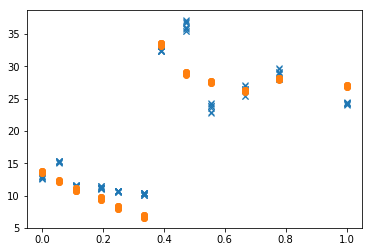

In [7]:
matrix_prueba_bias=np.insert(matrix_prueba,0,1,axis=1)
#np.shape(matrix_salida_prueba_bias) #[116,9]
prediccion_prueba = np.dot(matrix_prueba_bias,vector_pesos_final)
error_prueba = prediccion_prueba - matrix_salida_prueba
error_total_prueba=0
for i in range(0,len(error_prueba)):
    error_cuadrado_prueba = error_prueba[i]**2
    error_total_prueba = error_total_prueba+error_cuadrado_prueba
    #print("el error cuadrado de la prueba es: ", error_cuadrado_prueba)
error_total_prueba=error_total_prueba/len(error_prueba)
print("el error Total de la prueba es: ", error_total_prueba)

print(np.shape(matrix_prueba[:,0]))
print(np.shape(matrix_salida_prueba))
plt.plot(matrix_prueba[:,0], matrix_salida_prueba, 'x', matrix_prueba[:,0], prediccion_prueba, 'o')
plt.show()